<a href="https://colab.research.google.com/github/sangam-0/brain_stroke_data_analysis/blob/main/brain_stroke_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [150]:
import pandas as pd #for data manupulaton
import numpy as np #for calculation
import matplotlib.pyplot as plt #for graph
import seaborn as sns #for graph visualization
from scipy.stats import ttest_ind

In [5]:
df=pd.read_csv("/content/drive/MyDrive/brain_stroke.csv") #file is located in the content...drive...my drive...named as brain_stroke.csv


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


Her I used the **df.head()** which autommatically print 5 data from the top
if You need to print 10,15 data then you can enter df.head(10) or df.head(15) as you want. I will show it in next line of code

In [8]:
df.head(15)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
5,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
6,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
7,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
8,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
9,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


In [9]:
df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0
4980,Female,80.0,1,0,Yes,Private,Urban,83.75,29.1,never smoked,0


Her i did same as that of head but it shows the data of the bottom of the data set....you can also use **df.tail(12) or df.tail(17)** as how many data you want to see from the bottom


In [10]:
print(df[["stroke","age","gender"]])

      stroke   age  gender
0          1  67.0    Male
1          1  80.0    Male
2          1  49.0  Female
3          1  79.0  Female
4          1  81.0    Male
...      ...   ...     ...
4976       0  41.0    Male
4977       0  40.0    Male
4978       0  45.0  Female
4979       0  40.0    Male
4980       0  80.0  Female

[4981 rows x 3 columns]


This line of code print(df[["stroke","age"]]) prints 5,5 data from the top and bottom of the data set only fro stroke and age....for your unerstanding the df means data frame and you may find confusing why we are using  two [[..]] after  df ...if you use only one [ ] then it gives the series of data while using [[ ]] ti gives data frame..if you ant to print top 10 data in this format then usse **print(df.head(10)[["stroke","age"]])** which is shown below

In [11]:
print(df.head(10)[["stroke","age"]])

   stroke   age
0       1  67.0
1       1  80.0
2       1  49.0
3       1  79.0
4       1  81.0
5       1  74.0
6       1  69.0
7       1  78.0
8       1  81.0
9       1  61.0


similar for the tail...instead of df.head use df.tail or you can use **print(df[["stroke","age"]].tail(10))**

In [12]:
print(df[["stroke","age"]].corr())

          stroke       age
stroke  1.000000  0.246478
age     0.246478  1.000000


The code **print(df[["stroke","age"]].corr())** give the correlation betwen stroke and age correlation can be from:


*   -1=which means they are negatvely related
*   0=they are not related
*   1=they are positively related
 here we can see thre realtion between age and stroke is 0.246478 which says that if age increases there are probable chances of increasing in the stroke but it soes not say if age increases stroke also incrases.






In [13]:
print(df[["stroke","age"]].head(500).corr())

          stroke       age
stroke  1.000000  0.566917
age     0.566917  1.000000


In [14]:
print(df[["stroke","age"]].tail(500).corr())


          stroke       age
stroke  1.000000  0.296326
age     0.296326  1.000000


Above you can see if you wants to see the correlation of top 500 data you can use print**(df[["stroke","age"]].head(500).corr())** and for bottom 500 data you can use **print(df[["stroke","age"]].tail(500).corr())**

In [15]:
df.shape

(4981, 11)

**df.shape** gives the how mavy rows and column of data are there.Here 4981*11 means 4981 of rows and 11 of column.

In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


df.info() girves the information of data set like number of rows and column including if there  is any null data set in the data...it also fives the information of data types like float,integer,obect etc and memory connsumed by the data

from above we can find:
no missing data

In [17]:
df.isnull().values.sum()

np.int64(0)

otal number of null values in the entire DataFrame.
df.isnull() check weater there is any missing data or not
.values convert the data missinf data into NumPy aray [True,false]
.sum add all the true value and give the result of missng data


In [18]:
df.isnull()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
4976,False,False,False,False,False,False,False,False,False,False,False
4977,False,False,False,False,False,False,False,False,False,False,False
4978,False,False,False,False,False,False,False,False,False,False,False
4979,False,False,False,False,False,False,False,False,False,False,False


here you ca see there is no any missing data of top 5 and bottom 5 ---so it shows false

In [19]:
df.isnull().values

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

give the NumPy array of the data

In [20]:
df=df.replace(" ",np.nan)

There is no any missing vale so there is nothing to replace.


In [21]:
df.fillna(df.mean(), inplace=True)

TypeError: Could not convert ['MaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleFemale'
 'YesYesYesYesYesYesNoYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesNoNoYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesNoNoYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoNoYesYesNoYesYesYesYesYesYesYesYesYesNoNoYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesNoYesYesYesYesYesYesNoNoYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesNoYesNoYesYesYesYesYesYesYesYesYesNoNoYesYesYesYesYesYesYesYesYesNoYesYesYesYesNoNoYesNoYesNoYesNoYesNoNoNoYesNoYesYesYesYesYesYesNoYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesNoNoNoNoYesNoYesYesNoNoNoYesYesYesYesNoYesNoYesYesYesYesYesYesNoYesYesNoNoYesYesNoYesYesYesYesNoYesYesYesNoYesYesYesNoYesNoYesNoYesYesYesYesNoNoNoYesNoYesYesNoNoYesYesNoYesYesYesYesYesNoNoNoYesYesYesYesNoNoNoYesYesYesYesYesYesYesNoYesNoYesNoYesNoYesNoNoYesNoYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesNoNoYesNoYesNoNoYesYesYesYesNoNoYesYesNoNoYesYesNoNoNoYesYesYesNoYesYesYesNoYesYesNoNoNoYesNoYesYesNoYesYesNoYesYesYesNoYesYesYesYesNoNoNoNoYesYesYesYesYesYesYesYesYesYesYesYesYesNoNoYesYesYesYesNoYesYesYesYesNoYesYesYesYesYesNoYesYesNoNoYesYesNoYesYesYesYesNoNoYesNoYesNoYesYesYesNoNoNoYesNoYesNoYesNoYesNoYesNoNoNoNoYesYesYesYesNoYesNoYesNoYesYesNoYesYesNoYesNoYesYesYesYesYesYesYesYesYesNoNoYesNoYesYesYesNoYesNoYesNoYesYesYesNoNoYesYesYesYesYesYesYesYesYesYesYesNoYesNoYesYesYesYesYesNoYesYesYesNoYesNoYesYesYesYesNoNoYesYesYesYesYesYesYesYesNoNoYesNoNoYesYesYesYesNoYesYesYesNoYesYesYesYesNoNoNoNoNoNoNoYesYesYesYesYesNoNoYesYesNoYesYesYesYesYesYesYesNoYesYesYesYesNoYesNoYesYesNoNoNoYesYesYesNoNoYesYesNoYesNoNoNoYesYesNoYesYesYesYesYesYesNoYesNoYesYesYesYesYesYesNoYesNoNoYesYesNoNoYesNoYesNoYesYesYesNoYesYesYesNoYesYesYesYesNoYesYesYesNoNoYesYesNoYesYesYesYesYesYesYesNoNoNoYesYesNoNoNoNoYesYesYesYesYesYesNoYesYesYesYesYesNoNoYesYesNoNoYesNoYesYesYesYesYesYesYesYesYesNoYesYesNoYesYesNoNoYesYesNoYesNoNoNoYesYesYesYesYesNoYesNoYesYesYesNoYesNoYesNoYesYesYesNoYesYesYesYesYesYesYesYesNoNoYesYesYesNoYesYesYesYesYesYesYesNoNoYesNoYesYesYesYesYesYesYesYesYesYesNoNoYesYesYesYesNoYesYesYesYesYesNoNoNoYesYesNoNoYesYesYesYesNoYesYesYesNoNoYesYesYesYesYesYesYesYesYesYesNoNoNoNoNoYesNoNoYesNoNoNoNoYesNoNoYesNoYesYesNoNoNoYesYesNoYesNoNoYesNoYesYesYesNoYesNoYesNoYesYesYesYesNoNoYesNoNoYesYesYesYesNoNoYesYesNoYesYesNoYesYesNoYesYesYesYesNoYesNoYesYesYesYesYesYesYesYesYesNoNoYesYesYesNoYesNoYesYesNoYesYesNoYesNoYesNoYesNoYesYesNoYesNoYesYesYesNoYesNoYesYesNoYesYesNoYesYesYesYesNoYesNoNoYesYesYesYesYesYesYesNoNoNoNoNoYesYesNoNoNoYesYesYesYesYesNoYesYesYesNoYesNoYesNoYesYesYesYesYesYesYesYesYesNoNoNoNoYesYesYesYesYesYesNoYesNoYesYesNoYesYesYesYesYesNoNoNoYesYesYesYesYesNoYesYesNoNoYesYesYesNoYesYesYesYesYesYesYesNoYesYesYesNoNoYesNoYesNoNoYesYesYesNoNoYesNoYesYesYesYesNoYesNoNoNoYesNoYesYesYesYesNoNoNoYesNoYesYesYesYesYesNoYesYesYesNoNoNoNoNoNoNoYesYesYesYesNoYesYesNoNoYesYesYesYesNoNoYesNoNoNoYesNoYesNoNoYesNoNoNoYesNoYesNoYesYesNoYesYesYesNoYesNoYesNoNoNoYesYesYesYesNoNoYesNoYesYesYesYesYesNoYesYesYesYesNoYesYesYesNoNoYesNoYesYesYesNoYesYesNoYesNoYesYesYesNoNoNoYesYesNoYesYesNoYesYesNoYesYesYesYesYesYesNoYesNoYesYesYesYesYesYesYesYesNoNoYesYesYesNoYesYesYesNoNoYesYesYesYesNoYesNoYesYesYesNoNoYesYesYesNoNoNoYesYesNoYesYesYesYesYesNoYesYesNoNoYesNoYesNoYesNoYesYesYesYesYesYesYesNoNoNoYesNoYesYesYesYesYesYesYesYesYesYesYesYesNoNoYesNoNoNoYesNoNoYesNoYesYesYesYesYesYesYesYesYesNoYesNoNoYesYesYesNoNoYesYesYesYesNoYesYesYesYesNoNoNoNoNoNoNoYesYesYesYesYesNoYesYesYesYesYesNoNoYesNoYesNoYesYesYesNoNoNoYesYesYesNoNoYesNoYesYesYesYesYesYesNoYesNoNoYesYesYesYesNoNoYesYesYesNoYesNoYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesNoYesNoYesNoYesYesYesNoNoNoYesNoNoYesYesYesNoYesNoYesYesNoYesNoNoYesNoYesYesYesNoYesYesNoYesYesYesNoYesNoNoYesYesYesYesNoYesYesNoNoYesYesYesYesNoYesYesNoYesNoNoNoYesYesYesYesNoYesYesNoNoYesYesYesYesYesNoYesNoNoNoYesYesYesYesYesYesYesYesNoNoNoNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesNoYesNoYesYesYesYesYesYesNoYesYesNoNoYesNoYesYesYesYesYesYesNoYesYesYesYesNoYesYesNoYesNoNoYesNoNoYesYesYesNoNoNoYesYesYesNoNoYesYesNoYesNoYesNoYesNoYesYesNoYesYesYesYesNoYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesNoNoYesNoYesNoNoYesYesYesYesNoNoYesYesNoYesYesYesNoYesYesYesNoYesYesNoNoYesNoYesYesNoYesYesNoNoNoYesNoYesNoNoNoNoYesNoNoYesYesYesYesYesYesNoNoNoYesNoYesNoYesYesYesNoNoYesNoNoYesYesYesYesNoYesYesNoNoNoYesYesNoYesNoYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesNoYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesNoNoYesNoYesYesYesYesYesYesNoNoNoNoNoNoYesNoYesNoYesYesNoYesYesYesYesYesNoNoNoYesYesYesYesYesYesNoNoNoYesYesYesYesYesYesNoYesYesYesNoNoNoNoYesYesYesNoNoYesNoYesYesYesYesYesNoNoNoNoNoYesYesNoYesNoYesYesYesYesNoYesYesNoYesNoNoYesYesNoNoNoYesYesNoYesNoYesYesNoYesYesNoYesYesYesYesNoYesYesYesYesYesYesNoYesNoNoYesYesNoNoYesNoYesYesNoNoYesNoNoNoYesYesYesYesYesNoYesYesNoYesNoYesYesYesYesNoNoNoYesNoYesYesYesYesNoYesYesYesYesYesNoYesYesYesYesYesNoYesYesNoYesYesYesYesYesNoNoYesNoYesYesNoNoNoNoNoYesYesYesNoNoNoNoYesYesYesYesYesNoYesYesYesNoYesYesYesNoNoYesYesNoNoYesYesNoNoNoYesNoYesYesNoYesYesYesYesYesYesNoYesNoNoYesNoYesYesNoYesYesYesYesYesNoNoNoYesYesYesNoYesNoYesYesNoYesYesYesYesYesNoYesNoYesYesYesNoYesNoYesYesYesYesNoNoYesYesNoYesNoYesYesNoYesYesYesNoNoNoNoYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesNoNoYesYesYesNoNoNoYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesNoNoNoYesYesNoYesNoNoNoYesYesYesNoNoYesYesYesNoNoYesYesNoYesYesYesNoNoYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesNoNoYesNoYesYesYesYesYesYesYesYesNoYesYesYesNoNoNoYesNoYesNoNoYesNoYesYesYesYesYesYesYesNoYesYesNoYesYesNoYesNoNoNoYesYesNoYesNoYesYesNoYesNoNoNoYesYesYesNoNoYesYesYesNoYesYesYesYesYesNoNoYesYesNoYesNoNoYesYesNoYesYesYesYesNoYesYesYesYesNoNoNoNoNoNoYesNoYesYesNoYesYesNoYesYesYesNoYesNoNoNoYesYesYesYesYesNoNoYesYesYesYesYesYesYesYesYesYesNoYesNoNoNoNoNoYesYesNoNoYesYesNoNoYesYesYesYesNoYesYesYesNoNoYesNoYesNoYesYesNoNoNoYesYesYesYesNoNoYesNoYesYesYesYesYesNoNoYesNoYesYesNoNoNoNoYesYesNoNoYesYesNoYesNoYesYesYesYesYesYesNoYesYesYesYesNoYesYesNoYesYesYesNoYesNoNoNoYesYesYesNoYesYesYesYesNoNoYesNoNoNoYesYesNoNoYesNoYesYesNoNoYesNoYesYesYesYesYesNoYesNoYesYesYesYesNoYesYesYesNoYesNoYesYesYesYesYesNoNoNoNoYesYesNoYesYesYesYesNoYesNoYesNoYesYesNoYesNoYesYesYesYesYesYesYesYesYesNoYesNoYesYesYesYesYesNoYesYesYesYesYesNoNoYesYesYesYesYesYesYesNoYesNoYesYesYesNoYesYesYesYesYesYesYesYesYesNoYesYesYesYesNoYesYesNoNoYesYesYesYesYesNoNoYesNoNoYesNoYesNoYesNoYesNoNoYesYesYesYesYesYesNoYesNoNoYesYesYesYesNoYesYesYesNoNoYesNoYesYesYesNoYesYesYesNoYesNoYesYesNoNoYesYesYesYesNoYesNoNoYesNoYesYesYesNoNoYesNoNoNoYesYesNoYesYesNoYesYesYesYesNoNoNoYesNoYesYesYesYesNoYesNoNoYesYesYesNoYesNoYesNoYesYesYesYesYesYesYesYesYesNoNoYesNoYesYesNoYesYesYesYesNoNoYesNoYesNoYesNoYesYesYesYesNoYesNoYesNoYesYesNoYesYesNoNoYesYesYesYesNoNoYesYesYesYesYesYesNoYesYesYesNoYesNoYesYesYesYesNoYesNoNoYesNoYesYesYesYesNoYesNoNoNoNoYesNoYesYesNoNoYesYesYesYesYesYesYesNoYesYesNoNoYesYesYesYesYesYesYesYesNoYesNoYesNoYesYesNoYesYesYesNoYesYesNoYesYesYesYesYesYesYesNoYesNoNoYesYesYesYesNoNoNoYesYesNoYesYesNoNoNoNoYesYesYesYesYesNoYesYesYesYesYesNoNoYesYesNoNoYesYesNoYesNoYesNoYesNoYesNoYesYesYesYesYesNoYesYesYesYesNoNoNoNoYesYesYesYesYesYesYesYesYesYesNoYesYesNoYesNoYesYesYesYesYesYesYesYesNoYesNoYesNoNoYesYesYesNoYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesNoYesYesNoYesYesNoNoYesNoYesNoYesNoYesYesNoYesNoNoYesYesNoYesYesNoNoYesYesNoNoYesNoNoYesYesYesYesYesYesYesYesNoYesNoYesYesYesNoYesYesNoNoYesYesYesYesNoYesNoNoNoNoYesNoYesYesYesYesYesYesNoNoYesNoYesYesNoYesNoYesNoNoNoYesYesYesNoYesNoYesNoYesNoNoNoYesYesNoYesYesYesYesYesYesNoNoYesYesYesYesYesYesYesYesYesNoYesYesNoYesNoYesYesYesYesYesYesNoYesYesNoYesNoYesYesYesNoYesYesNoYesNoYesNoYesYesYesNoNoNoYesYesYesYesNoYesNoYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesNoYesYesYesNoYesYesYesYesNoNoYesNoYesYesNoYesYesYesYesNoNoYesYesNoNoYesYesYesYesNoYesNoYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesNoNoNoNoNoNoYesNoYesYesYesYesNoYesYesNoNoYesYesYesNoNoYesYesNoNoYesYesYesYesNoYesNoYesNoYesYesNoYesNoNoNoYesNoNoYesYesYesNoYesNoYesYesYesNoYesNoYesYesNoNoNoYesYesNoYesYesYesYesYesNoNoNoNoNoNoYesYesYesYesYesNoYesNoYesYesNoYesYesYesNoYesYesNoYesYesYesYesYesNoNoNoYesYesYesYesNoYesNoYesYesNoNoYesYesNoNoNoYesYesNoYesYesYesYesYesNoNoNoNoYesYesNoYesNoYesYesNoYesNoYesYesYesYesYesYesNoNoYesYesNoNoYesYesYesYesYesNoNoYesYesYesYesYesYesYesYesYesNoYesYesNoNoYesYesNoYesYesYesYesYesYesNoYesYesYesYesNoYesYesYesNoYesNoYesYesNoYesNoYesYesNoYesYesYesYesNoYesYesYesYesNoYesYesYesNoYesYesNoYesYesNoYesYesYesYesNoYesNoYesYesYesYesYesNoNoYesYesNoYesNoNoYesYesYesNoYesNoNoYesNoYesNoNoYesYesYesYesYesYesYesYesNoYesYesYesYesNoNoYesYesYesYesYesYesYesYesYesNoNoNoYesYesNoYesNoYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoNoNoYesYesNoNoNoYesNoYesYesYesNoYesNoYesYesNoNoNoYesNoYesYesYesYesNoYesYesYesNoYesYesYesYesYesYesYesNoNoYesNoNoYesYesNoNoNoYesNoYesNoYesYesYesNoNoYesYesYesYesYesYesNoYesNoNoYesYesYesNoYesNoYesYesYesYesNoNoYesYesYesYesYesNoNoNoNoYesYesNoYesYesYesNoYesYesYesNoYesYesNoNoNoNoNoNoYesNoYesNoYesYesYesYesYesNoYesYesNoYesYesYesYesYesYesNoYesYesYesYesNoNoNoYesNoNoYesNoYesYesNoYesYesYesNoYesNoYesNoYesYesNoNoYesYesYesYesYesYesYesNoYesNoNoNoYesYesNoYesYesYesNoNoNoYesNoYesYesYesNoYesYesNoYesNoYesNoYesYesYesYesNoNoNoYesYesNoYesYesYesYesNoNoNoYesYesYesNoYesYesYesYesNoYesNoNoYesYesNoNoNoYesNoNoYesYesYesNoYesNoYesYesNoYesNoNoYesNoYesYesNoNoNoYesYesYesYesNoYesYesNoYesNoYesNoNoYesNoNoYesYesNoYesYesNoYesYesYesNoNoNoYesYesYesYesNoYesNoNoYesYesYesNoYesYesYesYesYesYesNoYesYesYesYesYesYesNoYesYesYesNoYesYesNoYesYesYesNoNoYesNoYesYesYesYesNoNoYesYesYesNoNoYesYesYesNoNoYesYesNoNoYesNoNoYesYesYesYesNoYesNoYesNoNoNoYesYesYesYesYesNoYesYesYesYesYesYesNoYesYesYesNoYesYesYesYesYesYesYesYesYesYesNoNoNoYesYesNoNoYesNoYesYesYesYesYesYesNoYesNoNoNoYesYesYesNoYesYesYesYesNoYesYesYesYesNoYesYesYesNoNoNoNoNoYesYesYesYesYesNoYesYesNoNoYesNoYesNoYesYesYesYesNoNoNoNoYesYesYesYesYesNoYesYesNoNoYesYesNoYesNoYesYesNoYesYesYesNoYesYesYesYesYesYesYesNoNoYesYesNoYesNoYesYesYesYesYesYesYesYesNoNoYesYesYesYesYesYesYesYesYesYesYesNoYesYesNoYesNoYesYesNoYesYesYesNoYesYesYesYesYesYesNoNoYesYesNoYesYesYesYesNoNoNoYesYesYesYesYesYesYesYesNoYesNoNoYesYesYesYesYesYesYesYesNoYesYesYesNoYesYesNoYesNoNoYesNoNoYesYesYesYesYesNoYesYesNoYesYesNoNoYesNoYesNoNoYesNoYesYesYesYesYesYesNoYesNoYesNoNoNoNoYesYesYesYesYesYesYesNoNoNoNoNoNoYesYesNoNoYesNoNoNoYesYesYesNoNoYesYesYesNoYesYesNoYesYesNoNoYesNoNoNoYesYesNoYesYesYesYesYesYesYesYesYesYesNoNoYesYesNoNoYesYesYesNoNoYesYesNoYesYesYesYesYesYesYesYesYesNoYesYesNoYesYesNoNoNoYesYesYesNoNoYesYesNoNoYesYesYesNoYesYesYesNoNoYesYesYesNoYesYesYesYesNoYesNoYesYesYesNoNoYesNoYesNoNoYesYesYesYesYesNoYesNoNoYesYesYesYesNoNoYesNoNoNoYesNoNoYesYesYesYesNoNoNoYesYesYesYesNoYesYesYesYesNoYesYesYesYesNoYesYesNoYesNoYesYesNoYesNoNoNoNoNoYesYesNoYesYesYesNoNoYesNoYesYesNoNoYesYesYesYesYesYesYesYesYesYesYesYesYesNoNoYesYesNoYesYesYesNoYesNoNoNoYesNoNoNoYesNoYesYesYesYesYesYesYesYesYesYesNoYesNoNoYesYesNoYesNoYesNoNoYesYesYesYesYesNoNoNoYesYesYesNoNoNoNoYesYesYesYesYesYesNoNoYesNoYesYesYesYesYesNoYesYesYesYesYesYesNoNoYesYesNoYesNoYesYesYesYesNoNoYesYesNoNoYesYesYesYesNoNoNoNoYesYesYesYesYesYesYesNoNoNoNoYesNoYesYesYesYesYesYesNoYesNoYesYesNoNoYesNoNoYesYesYesNoNoNoYesNoYesYesYesNoYesNoNoNoYesNoYesYesYesNoNoNoYesYesYesNoYesYesYesNoYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesNoYesYesYesNoYesYesYesYesNoNoNoYesYesYesYesNoYesNoYesYesYesNoYesYesNoYesYesNoNoNoYesYesYesYesYesYesYesYesYesYesNoYesNoYesYesYesYesYesYesYesYesYesYesYesNoNoNoNoYesYesNoNoYesYesNoYesNoNoYesYesNoYesYesYesYesYesNoYesYesNoNoNoYesYesYesNoYesYesYesNoYesYesYesYesNoNoYesNoYesYesNoNoNoYesYesNoYesYesYesYesNoYesYesNoYesNoYesNoYesYesNoYesNoYesYesYesYesYesNoNoNoYesNoNoNoYesYesNoNoNoYesNoYesNoNoYesYesNoYesNoYesNoNoYesYesYesYesYesNoNoNoNoYesYesYesYesYesYesYesYesNoNoYesYesYesNoNoNoYesYesYesYesNoNoNoNoNoYesNoYesYesYesNoYesNoYesYesNoNoYesNoYesYesYesNoYesYesNoNoNoYesYesNoYesNoNoNoYesYesYesYesYesNoNoYesNoYesYesYesYesNoNoYesYesYesYesYesNoNoYesYesYesNoYesNoNoYesNoNoYesYesYesYesNoNoYesNoYesNoYesNoYesYesYesYesNoYesYesYesNoNoNoYesNoYesNoNoYesYesYesNoYesYesNoNoNoYesYesYesNoNoYesNoYesYesNoYesYesYesNoYesYesNoNoYesYesNoYesNoYesYesYesYesYesNoNoNoNoNoNoNoYesYesYesYesYesNoNoYesYesYesYesYesYesNoYesNoNoYesYesNoNoNoYesYesYesYesYesYesYesNoYesYesYesYesYesNoYesNoNoYesYesNoYesNoYesYesNoNoNoNoYesYesNoYesYesYesNoNoYesYesYesYesYesNoYesNoYesYesNoYesYesNoYesYesYesYesYesYesYesNoNoYesNoNoYesYesNoYesYesYesNoNoNoYesYesYesNoYesYesYesYesYesNoNoYesYesNoNoYesYesNoYesYesYesNoNoYesYesYesYesYesYesYesNoYesYesYesNoNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesNoYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesNoYesYesNoYesNoNoNoNoYesNoYesNoYesYesYesNoYesYesYesYesYesYesYesNoYesYesNoYesYesYesYesNoYesNoYesYesYesYesYesYesYesYesYesYesNoYesNoYesNoNoYesYesYesYesNoYesNoNoYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesNoYesYesYesYesNoYesYesYesYesNoYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesNoNoYesNoYesNoYesNoYesNoNoNoYesNoNoYesNoYesYesYesYesYesNoNoNoYesNoNoYesYesYesYesYesYesYesYesYesNoYesNoNoYesYesYesYes'
 'PrivatePrivatePrivateSelf-employedPrivatePrivatePrivatePrivatePrivateGovt_jobPrivatePrivateSelf-employedPrivatePrivatePrivateGovt_jobSelf-employedSelf-employedPrivatePrivateSelf-employedPrivateSelf-employedPrivatePrivateSelf-employedSelf-employedGovt_jobPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateGovt_jobPrivatePrivateSelf-employedPrivatePrivateSelf-employedPrivatePrivateSelf-employedGovt_jobPrivatePrivateSelf-employedPrivatePrivatePrivatePrivatePrivateSelf-employedPrivateGovt_jobPrivatePrivateSelf-employedPrivatePrivateSelf-employedPrivatePrivateSelf-employedPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-employedSelf-employedPrivatePrivateSelf-employedPrivateGovt_jobGovt_jobGovt_jobGovt_jobPrivateSelf-employedGovt_jobPrivateSelf-employedPrivateGovt_jobPrivatePrivateGovt_jobGovt_jobSelf-employedPrivateSelf-employedPrivatePrivatePrivatePrivatePrivateGovt_jobPrivateGovt_jobPrivatePrivatePrivateSelf-employedGovt_jobPrivatePrivateSelf-employedPrivateGovt_jobPrivatePrivateSelf-employedPrivatePrivatePrivateGovt_jobPrivatePrivateSelf-employedSelf-employedSelf-employedPrivatePrivatePrivateSelf-employedSelf-employedPrivateSelf-employedSelf-employedGovt_jobGovt_jobSelf-employedPrivateSelf-employedSelf-employedPrivateSelf-employedPrivatePrivatePrivatePrivatePrivatePrivateSelf-employedGovt_jobPrivatePrivatePrivateSelf-employedPrivatePrivatePrivatePrivatePrivateSelf-employedPrivateSelf-employedSelf-employedGovt_jobPrivatePrivateSelf-employedSelf-employedGovt_jobPrivateGovt_jobPrivatePrivateSelf-employedPrivateSelf-employedPrivateGovt_jobPrivatePrivateGovt_jobGovt_jobPrivatePrivatePrivateSelf-employedPrivateSelf-employedPrivateSelf-employedSelf-employedSelf-employedPrivatePrivateSelf-employedPrivatePrivatePrivatePrivatePrivatePrivatePrivatechildrenSelf-employedPrivatechildrenPrivatePrivatePrivatePrivateSelf-employedPrivateGovt_jobPrivatePrivatePrivatePrivatePrivatePrivatePrivateGovt_jobSelf-employedPrivatePrivatePrivatePrivatePrivateGovt_jobPrivatePrivateSelf-employedSelf-employedPrivatePrivatechildrenPrivateGovt_jobPrivatePrivatePrivateSelf-employedPrivatechildrenchildrenchildrenPrivatePrivateGovt_jobPrivateGovt_jobSelf-employedPrivateSelf-employedSelf-employedPrivatePrivatePrivatePrivatechildrenGovt_jobPrivateSelf-employedSelf-employedPrivatePrivatePrivatePrivatePrivateSelf-employedSelf-employedPrivatePrivatePrivatechildrenPrivatePrivateGovt_jobPrivatePrivatechildrenPrivatePrivatePrivatePrivateSelf-employedSelf-employedchildrenPrivatePrivateGovt_jobPrivatePrivatePrivateGovt_jobSelf-employedPrivatePrivateGovt_jobPrivateGovt_jobSelf-employedPrivatePrivatePrivatePrivatePrivatePrivateGovt_jobPrivateSelf-employedPrivatechildrenPrivatePrivateSelf-employedSelf-employedPrivatechildrenPrivatePrivatePrivatePrivateGovt_jobGovt_jobchildrenPrivatechildrenPrivatechildrenPrivateGovt_jobchildrenchildrenPrivateSelf-employedPrivateGovt_jobPrivatePrivatePrivatePrivateSelf-employedPrivatePrivatePrivateSelf-employedPrivatePrivatechildrenchildrenPrivateGovt_jobSelf-employedGovt_jobPrivatePrivatePrivatePrivateSelf-employedSelf-employedGovt_jobSelf-employedchildrenPrivatechildrenPrivatePrivatePrivateGovt_jobchildrenPrivatePrivatePrivatePrivatePrivatePrivatePrivateGovt_jobSelf-employedGovt_jobPrivateSelf-employedchildrenPrivatePrivatePrivatePrivatePrivateGovt_jobSelf-employedchildrenGovt_jobSelf-employedPrivateGovt_jobSelf-employedchildrenPrivateSelf-employedPrivatePrivatePrivatePrivatePrivatechildrenchildrenchildrenSelf-employedPrivatePrivateSelf-employedPrivatePrivatePrivateSelf-employedPrivateGovt_jobPrivatePrivatePrivateGovt_jobchildrenSelf-employedSelf-employedchildrenSelf-employedPrivatePrivatePrivateSelf-employedPrivatePrivatePrivateSelf-employedPrivatePrivatechildrenchildrenchildrenPrivatePrivatePrivatePrivateSelf-employedGovt_jobPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateGovt_jobPrivateSelf-employedSelf-employedPrivatechildrenPrivateSelf-employedPrivateGovt_jobchildrenPrivateGovt_jobPrivatePrivateSelf-employedPrivatePrivatePrivatePrivatechildrenPrivateSelf-employedPrivatePrivateGovt_jobSelf-employedSelf-employedPrivatechildrenPrivatePrivatePrivatechildrenPrivatePrivateSelf-employedchildrenPrivatePrivatePrivatechildrenGovt_jobchildrenPrivatechildrenSelf-employedchildrenPrivatePrivatePrivateSelf-employedSelf-employedPrivateSelf-employedPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-employedSelf-employedPrivatePrivatechildrenPrivatePrivateSelf-employedPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-employedchildrenchildrenPrivateSelf-employedPrivateGovt_jobPrivatechildrenPrivatechildrenPrivatechildrenPrivateGovt_jobPrivateSelf-employedPrivatePrivateGovt_jobGovt_jobPrivatePrivatePrivatePrivatePrivatePrivateSelf-employedPrivatePrivateGovt_jobGovt_jobSelf-employedSelf-employedPrivateGovt_jobGovt_jobPrivatePrivatePrivateSelf-employedPrivatePrivatechildrenPrivateSelf-employedSelf-employedSelf-employedSelf-employedPrivatePrivateGovt_jobSelf-employedSelf-employedPrivatePrivatePrivatePrivatechildrenSelf-employedSelf-employedPrivateSelf-employedPrivatePrivateGovt_jobSelf-employedchildrenGovt_jobSelf-employedGovt_jobchildrenGovt_jobPrivatePrivatePrivatePrivatePrivatePrivatechildrenchildrenPrivatePrivatePrivatePrivatePrivateSelf-employedSelf-employedPrivatechildrenPrivatePrivatechildrenPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateGovt_jobPrivatePrivatePrivateSelf-employedSelf-employedPrivatePrivatePrivatePrivatechildrenPrivatePrivateSelf-employedPrivatechildrenPrivatePrivatePrivateSelf-employedPrivatePrivatechildrenPrivatePrivatechildrenSelf-employedPrivatePrivatePrivateGovt_jobPrivatePrivatePrivatePrivatePrivatePrivatePrivateGovt_jobSelf-employedGovt_jobchildrenPrivatePrivatechildrenPrivatePrivatePrivatePrivateGovt_jobPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateGovt_jobPrivatePrivateGovt_jobSelf-employedPrivatePrivatePrivatePrivatechildrenPrivateSelf-employedchildrenPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateGovt_jobPrivatePrivatePrivatechildrenPrivatePrivateSelf-employedPrivatePrivatePrivateGovt_jobGovt_jobPrivatePrivatePrivatePrivateGovt_jobchildrenGovt_jobGovt_jobchildrenGovt_jobPrivatePrivateGovt_jobGovt_jobGovt_jobGovt_jobGovt_jobPrivateGovt_jobGovt_jobGovt_jobchildrenPrivatePrivatechildrenPrivateGovt_jobPrivateGovt_jobPrivatePrivatechildrenGovt_jobPrivateSelf-employedchildrenPrivateGovt_jobPrivateGovt_jobSelf-employedchildrenPrivatePrivatePrivateSelf-employedPrivatechildrenPrivatePrivatePrivatePrivatePrivatePrivateSelf-employedPrivatePrivatePrivatePrivateGovt_jobPrivatePrivatePrivatePrivatechildrenPrivateGovt_jobGovt_jobPrivatePrivatePrivateSelf-employedPrivatePrivateSelf-employedSelf-employedPrivatePrivatechildrenSelf-employedPrivatePrivatePrivateSelf-employedPrivatePrivatePrivateSelf-employedPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatechildrenPrivatePrivatePrivateSelf-employedPrivatechildrenGovt_jobchildrenSelf-employedPrivatechildrenPrivatePrivateSelf-employedSelf-employedPrivateGovt_jobSelf-employedSelf-employedPrivatePrivatePrivatePrivateGovt_jobSelf-employedPrivateSelf-employedSelf-employedPrivatePrivateSelf-employedPrivatePrivatechildrenPrivatechildrenGovt_jobPrivateSelf-employedchildrenPrivatePrivatechildrenPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-employedPrivatePrivatePrivatechildrenPrivateGovt_jobchildrenPrivatePrivatechildrenPrivatechildrenGovt_jobPrivatePrivatechildrenSelf-employedPrivatePrivatePrivatePrivateSelf-employedPrivateGovt_jobchildrenchildrenPrivatePrivatechildrenPrivatePrivatePrivateGovt_jobPrivatechildrenPrivatePrivatechildrenPrivatePrivatechildrenSelf-employedGovt_jobPrivateSelf-employedSelf-employedSelf-employedSelf-employedPrivateGovt_jobPrivateGovt_jobPrivatePrivatePrivatePrivatePrivateSelf-employedPrivatePrivatechildrenPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateGovt_jobSelf-employedPrivateGovt_jobPrivatePrivatechildrenPrivatePrivatePrivateSelf-employedPrivateSelf-employedSelf-employedPrivatechildrenPrivatePrivatePrivatePrivatePrivatePrivateSelf-employedGovt_jobSelf-employedPrivatePrivatechildrenSelf-employedPrivateGovt_jobPrivatechildrenPrivatePrivatePrivateGovt_jobPrivatePrivateGovt_jobSelf-employedPrivateSelf-employedPrivatePrivatePrivatePrivatePrivatePrivateSelf-employedchildrenPrivatePrivatePrivatePrivatePrivatePrivateSelf-employedchildrenPrivateGovt_jobGovt_jobPrivateGovt_jobPrivatePrivatePrivatePrivateSelf-employedPrivateGovt_jobSelf-employedSelf-employedPrivatePrivateSelf-employedPrivatechildrenchildrenPrivatePrivatePrivateGovt_jobPrivatePrivatePrivatechildrenPrivatechildrenPrivateGovt_jobchildrenPrivatePrivatePrivatePrivatePrivatechildrenPrivatechildrenPrivatePrivatePrivateGovt_jobPrivatePrivatePrivateGovt_jobPrivatechildrenPrivatePrivatePrivatechildrenGovt_jobPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-employedPrivatePrivateGovt_jobPrivatePrivatechildrenGovt_jobGovt_jobPrivatePrivatePrivatePrivatePrivatechildrenPrivatechildrenGovt_jobGovt_jobPrivateSelf-employedSelf-employedPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-employedPrivatePrivatePrivatechildrenPrivatePrivatePrivatePrivatePrivatePrivateSelf-employedPrivateSelf-employedPrivatechildrenGovt_jobPrivatePrivatechildrenchildrenPrivatePrivateSelf-employedSelf-employedPrivateSelf-employedSelf-employedchildrenPrivateGovt_jobGovt_jobGovt_jobGovt_jobPrivatePrivateGovt_jobPrivatechildrenchildrenPrivatechildrenPrivatePrivatePrivatePrivatechildrenchildrenchildrenPrivateGovt_jobSelf-employedPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateGovt_jobPrivatePrivatechildrenPrivatePrivatePrivateSelf-employedPrivateGovt_jobchildrenPrivateSelf-employedchildrenPrivatePrivatePrivateGovt_jobSelf-employedchildrenPrivateSelf-employedPrivateGovt_jobchildrenPrivatePrivatePrivateSelf-employedchildrenSelf-employedchildrenSelf-employedSelf-employedGovt_jobPrivateGovt_jobGovt_jobPrivatePrivatechildrenPrivatePrivateSelf-employedPrivatechildrenPrivateSelf-employedPrivatePrivateSelf-employedSelf-employedPrivatePrivatePrivatePrivatePrivateSelf-employedSelf-employedPrivatePrivateSelf-employedPrivatePrivatePrivatePrivatePrivatePrivateSelf-employedPrivatePrivatePrivatePrivateSelf-employedPrivatePrivateGovt_jobSelf-employedPrivateSelf-employedGovt_jobPrivatechildrenchildrenPrivatePrivateSelf-employedPrivatechildrenSelf-employedchildrenPrivatePrivatePrivatechildrenchildrenPrivatePrivateGovt_jobPrivateGovt_jobSelf-employedPrivatePrivatechildrenPrivatePrivatePrivatePrivatePrivatechildrenPrivateSelf-employedchildrenchildrenSelf-employedchildrenSelf-employedPrivatePrivatechildrenPrivateGovt_jobGovt_jobPrivatePrivatePrivatePrivatePrivatechildrenchildrenPrivatechildrenPrivatePrivatePrivatePrivatePrivateSelf-employedPrivatePrivatePrivatePrivatePrivatePrivatechildrenchildrenPrivatechildrenPrivatechildrenPrivatePrivatechildrenGovt_jobchildrenPrivatePrivatePrivateGovt_jobPrivatePrivatePrivatePrivatePrivatechildrenSelf-employedPrivatechildrenGovt_jobPrivatePrivatePrivatechildrenPrivatePrivateGovt_jobPrivatechildrenSelf-employedSelf-employedGovt_jobPrivatePrivatePrivatechildrenPrivatechildrenPrivatePrivateGovt_jobGovt_jobPrivatePrivatePrivateGovt_jobPrivateSelf-employedSelf-employedGovt_jobGovt_jobchildrenchildrenSelf-employedchildrenPrivatechildrenPrivateGovt_jobPrivatePrivatechildrenSelf-employedPrivateGovt_jobSelf-employedPrivatechildrenPrivatePrivateSelf-employedPrivateSelf-employedGovt_jobPrivatePrivateSelf-employedPrivatechildrenPrivateGovt_jobGovt_jobSelf-employedGovt_jobPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateGovt_jobGovt_jobPrivatePrivateSelf-employedPrivatePrivatePrivatechildrenPrivateSelf-employedPrivatePrivatePrivateSelf-employedPrivatePrivateSelf-employedchildrenPrivateSelf-employedPrivateSelf-employedGovt_jobPrivatechildrenSelf-employedSelf-employedchildrenPrivatePrivatePrivatePrivatechildrenSelf-employedPrivatePrivatePrivateGovt_jobSelf-employedchildrenPrivatePrivatePrivatePrivateSelf-employedPrivatePrivatePrivatePrivatePrivateGovt_jobPrivateGovt_jobchildrenPrivateGovt_jobchildrenPrivatePrivatePrivatePrivatechildrenPrivatePrivatechildrenPrivateGovt_jobPrivatePrivateSelf-employedPrivatePrivatePrivatePrivatePrivateSelf-employedGovt_jobchildrenGovt_jobSelf-employedPrivatePrivatechildrenGovt_jobGovt_jobPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-employedPrivatechildrenchildrenPrivateGovt_jobPrivatePrivateGovt_jobSelf-employedPrivatePrivatePrivatechildrenPrivatePrivateSelf-employedPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateGovt_jobPrivatePrivatePrivatechildrenPrivatechildrenPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-employedPrivatePrivateSelf-employedPrivatechildrenPrivatechildrenSelf-employedPrivateSelf-employedPrivatePrivatePrivatePrivateGovt_jobPrivateGovt_jobPrivateGovt_jobGovt_jobPrivatechildrenPrivatePrivatePrivateGovt_jobPrivatechildrenPrivatePrivatePrivatePrivatePrivatechildrenPrivatePrivatePrivateSelf-employedSelf-employedSelf-employedGovt_jobchildrenPrivatePrivateGovt_jobchildrenSelf-employedPrivateGovt_jobPrivatePrivateSelf-employedPrivatePrivatePrivateSelf-employedPrivatePrivatePrivatePrivatePrivatePrivatePrivateGovt_jobGovt_jobPrivateSelf-employedPrivatePrivateGovt_jobSelf-employedPrivatechildrenPrivateSelf-employedSelf-employedPrivatePrivateGovt_jobchildrenPrivatechildrenPrivateSelf-employedPrivatePrivatePrivatePrivatechildrenPrivatePrivatechildrenPrivateSelf-employedPrivatechildrenPrivatePrivateSelf-employedPrivateGovt_jobPrivatechildrenPrivatePrivatechildrenPrivatePrivatePrivateSelf-employedPrivatePrivatePrivatePrivatePrivatePrivatePrivatechildrenPrivatechildrenPrivateSelf-employedPrivatePrivatePrivateGovt_jobPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatechildrenPrivatePrivatePrivatePrivatePrivatePrivatechildrenPrivatechildrenPrivatePrivateSelf-employedSelf-employedGovt_jobchildrenPrivatePrivatePrivatePrivatechildrenSelf-employedPrivatechildrenSelf-employedPrivatePrivateGovt_jobSelf-employedPrivateGovt_jobPrivateSelf-employedGovt_jobPrivatePrivatePrivatechildrenPrivatePrivatePrivateGovt_jobPrivateSelf-employedGovt_jobSelf-employedPrivatePrivatePrivateSelf-employedchildrenSelf-employedPrivateGovt_jobSelf-employedPrivatePrivateSelf-employedPrivatePrivateSelf-employedPrivatePrivateGovt_jobGovt_jobPrivateGovt_jobPrivateGovt_jobPrivatePrivatechildrenPrivatePrivatePrivatePrivateGovt_jobPrivatePrivatePrivatechildrenSelf-employedPrivatePrivatePrivateGovt_jobchildrenGovt_jobchildrenSelf-employedPrivateSelf-employedPrivatePrivatePrivatechildrenchildrenchildrenPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-employedGovt_jobSelf-employedPrivatechildrenPrivateSelf-employedPrivatePrivatePrivatechildrenPrivatechildrenPrivateGovt_jobSelf-employedSelf-employedGovt_jobPrivatechildrenchildrenchildrenPrivateSelf-employedPrivatePrivateSelf-employedchildrenPrivatePrivatePrivatePrivatePrivateSelf-employedPrivatePrivatePrivatechildrenPrivatePrivateSelf-employedPrivatechildrenGovt_jobSelf-employedPrivatePrivatePrivatePrivatePrivatePrivatechildrenPrivatePrivateGovt_jobPrivatePrivateSelf-employedPrivatechildrenPrivatePrivateSelf-employedGovt_jobPrivatePrivatePrivatePrivatechildrenPrivatePrivateGovt_jobchildrenchildrenPrivatechildrenPrivatePrivatePrivatePrivatePrivatePrivatePrivateGovt_jobPrivateSelf-employedPrivatePrivatePrivatePrivatePrivatePrivateSelf-employedPrivatechildrenPrivatePrivatePrivatePrivateGovt_jobchildrenPrivatePrivatechildrenPrivateSelf-employedPrivateGovt_jobchildrenPrivateSelf-employedGovt_jobPrivatePrivatechildrenGovt_jobPrivatePrivatePrivateSelf-employedPrivateGovt_jobPrivatePrivatePrivateGovt_jobPrivatePrivateGovt_jobchildrenchildrenPrivatechildrenPrivatePrivatechildrenPrivatePrivatePrivatePrivatePrivatePrivateSelf-employedPrivatePrivatePrivatechildrenSelf-employedSelf-employedGovt_jobPrivatePrivatePrivateSelf-employedPrivatePrivatePrivateSelf-employedPrivatePrivatePrivatePrivatePrivatePrivateSelf-employedPrivatePrivatePrivatechildrenSelf-employedGovt_jobPrivatePrivatePrivateSelf-employedPrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-employedPrivatePrivateSelf-employedPrivatePrivatePrivateSelf-employedSelf-employedPrivatePrivateSelf-employedPrivatePrivatechildrenGovt_jobchildrenPrivatePrivatePrivatechildrenGovt_jobchildrenSelf-employedSelf-employedchildrenSelf-employedGovt_jobPrivateGovt_jobGovt_jobchildrenSelf-employedchildrenPrivatePrivatePrivatechildrenPrivatePrivatePrivatePrivateSelf-employedPrivatechildrenPrivatePrivatePrivatePrivateSelf-employedPrivatePrivatePrivatechildrenPrivateGovt_jobSelf-employedchildrenPrivatechildrenPrivatePrivatePrivateSelf-employedPrivateSelf-employedPrivateGovt_jobSelf-employedSelf-employedGovt_jobGovt_jobGovt_jobGovt_jobSelf-employedPrivateSelf-employedPrivatePrivateSelf-employedPrivatechildrenGovt_jobPrivatePrivatePrivatechildrenPrivatePrivatePrivateGovt_jobPrivatePrivateSelf-employedchildrenPrivateSelf-employedPrivatePrivatePrivateSelf-employedPrivatePrivatechildrenchildrenchildrenSelf-employedPrivatechildrenPrivatechildrenPrivatechildrenPrivatePrivatePrivateGovt_jobPrivateSelf-employedGovt_jobPrivatechildrenPrivatePrivatePrivateGovt_jobPrivateSelf-employedSelf-employedPrivatechildrenPrivatePrivatePrivateSelf-employedPrivateGovt_jobSelf-employedPrivatePrivatePrivatePrivateSelf-employedPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatechildrenSelf-employedPrivateGovt_jobPrivateGovt_jobPrivatePrivatePrivatechildrenPrivateSelf-employedGovt_jobchildrenchildrenPrivateSelf-employedchildrenGovt_jobchildrenchildrenSelf-employedPrivatePrivateSelf-employedPrivateGovt_jobPrivatePrivatePrivatePrivateSelf-employedPrivatePrivatePrivateSelf-employedchildrenPrivatePrivatechildrenGovt_jobPrivateSelf-employedPrivatePrivatePrivatePrivateSelf-employedSelf-employedPrivatechildrenchildrenPrivatePrivatePrivatePrivatechildrenPrivatePrivateSelf-employedPrivatechildrenGovt_jobSelf-employedPrivateSelf-employedSelf-employedchildrenPrivateSelf-employedPrivatePrivateSelf-employedchildrenPrivatePrivateSelf-employedSelf-employedPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateGovt_jobPrivatePrivatechildrenchildrenPrivatePrivatePrivatePrivatePrivatePrivatePrivatechildrenGovt_jobSelf-employedGovt_jobPrivatePrivatePrivatePrivatePrivatePrivateGovt_jobGovt_jobGovt_jobPrivatePrivatePrivatePrivatePrivateGovt_jobPrivateGovt_jobSelf-employedPrivatePrivatePrivateSelf-employedchildrenPrivatechildrenchildrenGovt_jobGovt_jobSelf-employedGovt_jobPrivatechildrenSelf-employedGovt_jobPrivatechildrenchildrenPrivatePrivateSelf-employedSelf-employedchildrenPrivatePrivateSelf-employedPrivatePrivatePrivatechildrenSelf-employedGovt_jobPrivatePrivatePrivatePrivatechildrenPrivatePrivatePrivatePrivateGovt_jobPrivateGovt_jobPrivateGovt_jobPrivateSelf-employedPrivateSelf-employedchildrenchildrenPrivatechildrenPrivatePrivatechildrenchildrenchildrenchildrenPrivateGovt_jobPrivatePrivateSelf-employedSelf-employedchildrenPrivatechildrenSelf-employedGovt_jobGovt_jobPrivatePrivatePrivatechildrenSelf-employedSelf-employedPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-employedPrivatePrivatePrivatePrivatePrivatechildrenPrivatePrivatechildrenchildrenPrivatePrivatePrivatePrivateSelf-employedchildrenSelf-employedSelf-employedchildrenchildrenPrivateGovt_jobGovt_jobPrivatePrivatePrivatePrivatePrivateSelf-employedchildrenPrivatePrivatePrivatePrivatechildrenPrivatePrivatePrivatePrivatePrivatechildrenPrivatePrivateSelf-employedPrivatePrivatePrivatePrivatePrivateSelf-employedPrivateSelf-employedchildrenPrivatePrivatePrivatePrivateGovt_jobPrivatechildrenSelf-employedchildrenGovt_jobGovt_jobchildrenPrivatechildrenPrivatePrivatePrivatePrivateSelf-employedGovt_jobSelf-employedSelf-employedPrivatechildrenSelf-employedPrivatePrivateGovt_jobPrivatePrivateSelf-employedPrivatePrivatePrivateGovt_jobPrivatePrivatechildrenchildrenPrivatePrivatePrivateSelf-employedPrivateGovt_jobGovt_jobPrivatePrivatechildrenPrivatePrivateSelf-employedPrivateSelf-employedPrivateSelf-employedPrivatePrivateGovt_jobGovt_jobPrivatePrivatePrivateGovt_jobPrivateGovt_jobGovt_jobPrivateGovt_jobPrivatechildrenGovt_jobGovt_jobGovt_jobGovt_jobGovt_jobGovt_jobchildrenchildrenPrivatePrivatechildrenSelf-employedGovt_jobPrivatechildrenPrivatePrivateGovt_jobGovt_jobGovt_jobSelf-employedPrivateGovt_jobPrivatePrivatePrivatePrivatePrivatechildrenSelf-employedPrivatePrivateSelf-employedPrivatechildrenGovt_jobPrivatePrivatePrivatechildrenPrivateGovt_jobPrivatePrivatePrivatePrivatePrivateGovt_jobPrivatePrivateSelf-employedPrivatePrivatePrivatechildrenGovt_jobSelf-employedGovt_jobPrivatePrivatePrivateGovt_jobPrivatechildrenPrivateGovt_jobSelf-employedPrivateSelf-employedchildrenPrivateSelf-employedPrivatechildrenSelf-employedPrivateGovt_jobchildrenSelf-employedGovt_jobPrivateSelf-employedPrivatePrivatePrivatePrivatePrivatePrivateSelf-employedGovt_jobPrivatePrivateSelf-employedGovt_jobPrivateSelf-employedchildrenPrivatePrivatePrivateGovt_jobPrivatePrivatePrivatePrivateSelf-employedSelf-employedPrivateSelf-employedPrivateSelf-employedSelf-employedGovt_jobPrivatePrivatechildrenPrivatePrivatechildrenSelf-employedGovt_jobPrivatePrivatePrivateGovt_jobPrivatePrivatechildrenGovt_jobSelf-employedPrivatePrivatePrivatePrivatePrivatePrivateGovt_jobSelf-employedchildrenPrivatechildrenGovt_jobPrivatePrivateGovt_jobchildrenPrivatePrivatePrivatechildrenPrivatePrivatePrivatePrivatechildrenPrivateSelf-employedPrivatePrivatePrivatePrivateSelf-employedchildrenPrivatePrivateSelf-employedPrivatePrivatePrivatePrivatePrivatePrivateGovt_jobPrivatePrivatePrivatePrivateGovt_jobchildrenPrivatePrivatePrivatePrivatePrivatePrivateSelf-employedPrivatechildrenPrivatePrivatechildrenGovt_jobGovt_jobchildrenGovt_jobGovt_jobPrivatePrivatePrivateSelf-employedPrivateSelf-employedchildrenSelf-employedPrivatePrivatechildrenSelf-employedPrivatePrivatePrivateSelf-employedPrivateSelf-employedPrivatePrivateSelf-employedPrivateGovt_jobchildrenPrivatePrivatechildrenPrivatePrivatePrivatechildrenPrivatePrivateGovt_jobSelf-employedPrivatePrivatePrivatePrivatePrivateSelf-employedPrivatePrivatePrivatePrivateGovt_jobGovt_jobPrivateSelf-employedPrivatePrivatechildrenSelf-employedPrivateGovt_jobSelf-employedSelf-employedchildrenchildrenchildrenPrivateSelf-employedPrivatePrivateSelf-employedSelf-employedPrivatePrivateGovt_jobPrivateGovt_jobSelf-employedPrivatePrivatePrivateSelf-employedchildrenPrivatePrivatePrivatePrivatePrivateGovt_jobPrivatePrivatePrivatechildrenPrivatePrivatePrivatePrivateSelf-employedPrivatePrivatePrivateSelf-employedSelf-employedGovt_jobPrivatePrivatePrivatechildrenPrivatePrivatePrivateSelf-employedGovt_jobPrivateSelf-employedPrivatePrivateGovt_jobPrivatechildrenPrivateGovt_jobPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-employedchildrenPrivateSelf-employedPrivatePrivatechildrenGovt_jobPrivatePrivatechildrenSelf-employedPrivateGovt_jobSelf-employedPrivatePrivatePrivateSelf-employedPrivatePrivatePrivateSelf-employedPrivateGovt_jobGovt_jobPrivatePrivateGovt_jobPrivatePrivatechildrenPrivatePrivatePrivateSelf-employedPrivatePrivatePrivatePrivatePrivatePrivatechildrenPrivatechildrenPrivateSelf-employedPrivateGovt_jobPrivatechildrenPrivatePrivateGovt_jobGovt_jobGovt_jobSelf-employedchildrenPrivatePrivatechildrenPrivatePrivateGovt_jobPrivatePrivatePrivatePrivatePrivateSelf-employedPrivateSelf-employedPrivateSelf-employedPrivatechildrenPrivateSelf-employedPrivateGovt_jobPrivatePrivatechildrenchildrenSelf-employedPrivateGovt_jobPrivatechildrenPrivatechildrenPrivatechildrenchildrenPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatechildrenSelf-employedGovt_jobchildrenGovt_jobPrivateGovt_jobSelf-employedchildrenGovt_jobPrivatePrivatePrivateSelf-employedPrivatePrivateGovt_jobSelf-employedSelf-employedGovt_jobchildrenSelf-employedPrivatechildrenPrivatePrivatePrivatechildrenPrivateGovt_jobSelf-employedPrivateGovt_jobPrivateSelf-employedchildrenSelf-employedPrivateSelf-employedPrivateSelf-employedGovt_jobPrivatePrivatePrivatePrivateSelf-employedGovt_jobPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-employedPrivatePrivatePrivatechildrenGovt_jobPrivatePrivateGovt_jobGovt_jobPrivateGovt_jobPrivateGovt_jobGovt_jobPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-employedGovt_jobchildrenPrivateSelf-employedPrivatePrivateSelf-employedPrivatePrivatechildrenPrivatePrivateGovt_jobGovt_jobSelf-employedPrivateGovt_jobSelf-employedPrivatePrivatePrivateSelf-employedSelf-employedchildrenPrivatePrivatePrivatePrivateGovt_jobPrivatechildrenSelf-employedGovt_jobPrivatePrivatePrivatechildrenSelf-employedPrivatePrivatePrivatePrivatePrivatePrivateSelf-employedPrivatechildrenPrivateGovt_jobGovt_jobPrivatePrivatePrivateGovt_jobPrivateSelf-employedchildrenPrivateSelf-employedPrivateSelf-employedPrivatePrivatechildrenGovt_jobSelf-employedPrivateGovt_jobPrivateSelf-employedGovt_jobSelf-employedPrivatePrivatePrivatePrivatechildrenchildrenPrivatePrivateGovt_jobPrivateSelf-employedGovt_jobPrivatePrivateSelf-employedPrivatePrivatePrivatechildrenSelf-employedSelf-employedPrivatePrivateGovt_jobchildrenPrivateGovt_jobchildrenPrivateGovt_jobPrivatePrivatePrivatechildrenPrivatechildrenPrivatechildrenSelf-employedPrivatePrivateSelf-employedPrivatechildrenchildrenPrivatePrivateSelf-employedSelf-employedPrivatePrivatechildrenPrivatePrivatePrivateSelf-employedPrivatechildrenGovt_jobchildrenPrivateSelf-employedchildrenPrivateSelf-employedPrivateGovt_jobPrivateGovt_jobPrivatePrivateGovt_jobPrivatePrivatePrivateGovt_jobchildrenSelf-employedPrivateSelf-employedPrivatePrivatePrivatePrivatePrivatePrivateSelf-employedPrivateGovt_jobchildrenPrivatePrivateGovt_jobPrivatePrivateSelf-employedSelf-employedPrivateSelf-employedPrivateGovt_jobPrivatechildrenPrivateSelf-employedSelf-employedPrivatePrivatePrivatechildrenGovt_jobPrivatePrivatePrivatechildrenPrivateGovt_jobPrivateGovt_jobchildrenPrivatePrivatePrivatePrivateGovt_jobPrivatePrivatePrivatePrivatePrivatePrivatePrivatechildrenPrivateSelf-employedPrivateGovt_jobchildrenGovt_jobSelf-employedchildrenPrivatePrivatePrivatePrivatePrivateSelf-employedSelf-employedPrivateSelf-employedchildrenSelf-employedPrivatePrivatechildrenSelf-employedPrivatePrivateSelf-employedPrivatePrivatechildrenGovt_jobPrivateSelf-employedPrivateSelf-employedPrivatePrivateGovt_jobPrivatePrivatePrivateGovt_jobPrivateGovt_jobSelf-employedPrivatechildrenPrivateGovt_jobPrivateSelf-employedSelf-employedPrivatechildrenPrivateSelf-employedPrivatePrivatechildrenPrivatePrivatePrivatePrivateGovt_jobchildrenPrivateSelf-employedPrivateSelf-employedchildrenPrivateSelf-employedPrivatePrivatePrivatePrivateSelf-employedPrivatePrivateGovt_jobPrivateSelf-employedPrivateSelf-employedGovt_jobSelf-employedPrivateSelf-employedSelf-employedchildrenPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-employedPrivatePrivateSelf-employedPrivateGovt_jobSelf-employedchildrenPrivateSelf-employedPrivatePrivatePrivatePrivatePrivatePrivateGovt_jobGovt_jobPrivatechildrenPrivateSelf-employedchildrenPrivatePrivatechildrenPrivateGovt_jobPrivatePrivatePrivatePrivateSelf-employedPrivatechildrenPrivateSelf-employedPrivateSelf-employedchildrenGovt_jobPrivatePrivatePrivatePrivateGovt_jobPrivateSelf-employedPrivateGovt_jobPrivatechildrenPrivatePrivatePrivatePrivatePrivateGovt_jobPrivatePrivateGovt_jobSelf-employedchildrenSelf-employedPrivatePrivatePrivatePrivatePrivateSelf-employedSelf-employedPrivateGovt_jobPrivateGovt_jobPrivateSelf-employedSelf-employedPrivateGovt_jobSelf-employedPrivatePrivatePrivatePrivatechildrenPrivatePrivateSelf-employedSelf-employedPrivatePrivatePrivatechildrenPrivatePrivatePrivatePrivatechildrenSelf-employedchildrenPrivatePrivateGovt_jobPrivateSelf-employedPrivateGovt_jobPrivatePrivatePrivateSelf-employedPrivateGovt_jobPrivateGovt_jobPrivatechildrenPrivatePrivatechildrenPrivateSelf-employedSelf-employedchildrenPrivatePrivatePrivatechildrenSelf-employedchildrenGovt_jobGovt_jobPrivatechildrenchildrenSelf-employedPrivatePrivateSelf-employedGovt_jobPrivatePrivateGovt_jobchildrenPrivateGovt_jobSelf-employedPrivatechildrenPrivatechildrenPrivateSelf-employedSelf-employedSelf-employedchildrenchildrenSelf-employedSelf-employedSelf-employedSelf-employedSelf-employedchildrenPrivatePrivatechildrenPrivatePrivatePrivatePrivateSelf-employedGovt_jobPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatechildrenchildrenchildrenPrivatechildrenPrivatechildrenPrivatechildrenPrivatePrivateSelf-employedPrivatePrivatechildrenPrivatePrivatechildrenPrivatePrivatePrivateGovt_jobSelf-employedPrivatechildrenPrivatePrivateGovt_jobGovt_jobPrivatePrivatechildrenPrivateSelf-employedSelf-employedPrivatePrivatePrivateSelf-employedGovt_jobPrivatePrivatePrivatechildrenPrivatePrivatePrivatechildrenPrivatePrivatePrivatePrivateGovt_jobPrivateGovt_jobGovt_jobPrivateSelf-employedGovt_jobchildrenPrivatePrivatePrivatePrivateGovt_jobPrivatePrivateSelf-employedSelf-employedPrivatechildrenchildrenPrivatePrivatechildrenPrivateGovt_jobPrivatePrivatePrivatePrivatechildrenPrivatechildrenPrivatePrivatePrivatePrivateGovt_jobGovt_jobPrivatechildrenchildrenPrivateGovt_jobGovt_jobGovt_jobPrivateGovt_jobGovt_jobPrivatePrivatechildrenPrivatePrivatePrivatePrivateSelf-employedGovt_jobPrivateGovt_jobchildrenPrivateSelf-employedPrivatePrivatePrivatePrivatechildrenPrivateSelf-employedSelf-employedPrivatePrivatePrivatePrivatechildrenGovt_jobchildrenPrivatePrivatechildrenSelf-employedchildrenPrivateSelf-employedGovt_jobGovt_jobSelf-employedPrivatePrivatechildrenGovt_jobPrivatePrivatePrivatechildrenGovt_jobPrivatechildrenPrivatechildrenPrivatePrivatePrivatePrivatechildrenPrivatePrivateGovt_jobPrivateSelf-employedGovt_jobchildrenGovt_jobPrivatePrivatePrivatechildrenPrivateSelf-employedSelf-employedGovt_jobPrivatechildrenPrivatePrivatechildrenPrivateSelf-employedPrivatePrivatePrivatePrivateGovt_jobPrivateGovt_jobPrivatechildrenGovt_jobPrivateGovt_jobPrivatePrivatePrivatePrivateSelf-employedPrivatePrivatechildrenPrivatePrivatePrivatePrivatePrivatePrivatechildrenPrivateGovt_jobPrivateGovt_jobPrivateSelf-employedPrivatechildrenchildrenPrivatePrivatePrivatePrivatechildrenSelf-employedSelf-employedPrivatePrivatePrivateSelf-employedGovt_jobPrivatePrivateSelf-employedPrivatePrivatePrivatePrivateSelf-employedPrivatePrivatePrivatePrivatePrivateGovt_jobchildrenPrivateSelf-employedPrivateSelf-employedPrivatePrivatePrivatePrivateGovt_jobPrivatePrivateSelf-employedSelf-employedchildrenGovt_jobSelf-employedPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatechildrenPrivatePrivateGovt_jobGovt_jobchildrenchildrenPrivateGovt_jobSelf-employedPrivatePrivatePrivateGovt_jobGovt_jobGovt_jobPrivatechildrenchildrenchildrenSelf-employedPrivateSelf-employedchildrenGovt_jobGovt_jobPrivateGovt_jobchildrenPrivatePrivateSelf-employedPrivatePrivateSelf-employedPrivatePrivatechildrenchildrenchildrenPrivatechildrenSelf-employedGovt_jobPrivatePrivatePrivatePrivateGovt_jobSelf-employedchildrenPrivatePrivatechildrenPrivatePrivatePrivateSelf-employedGovt_jobPrivatePrivatePrivatechildrenSelf-employedPrivateSelf-employedPrivateSelf-employedGovt_jobchildrenPrivateGovt_jobSelf-employedchildrenPrivatePrivatechildrenSelf-employedchildrenPrivatePrivatechildrenSelf-employedGovt_jobGovt_jobGovt_jobGovt_jobSelf-employedSelf-employedSelf-employedPrivateSelf-employedPrivatePrivatePrivatePrivateGovt_jobSelf-employedPrivateSelf-employedGovt_jobSelf-employedPrivatePrivateSelf-employedPrivatePrivatePrivatePrivatePrivateSelf-employedGovt_jobGovt_jobPrivatePrivateSelf-employedPrivatePrivatePrivatePrivateGovt_jobchildrenSelf-employedPrivatechildrenPrivatechildrenPrivateSelf-employedPrivatePrivateSelf-employedPrivatePrivatePrivatePrivatePrivateSelf-employedPrivatePrivateGovt_jobGovt_jobSelf-employedPrivatechildrenSelf-employedSelf-employedPrivatePrivatechildrenPrivatePrivatePrivateSelf-employedPrivatePrivatePrivatePrivatePrivatePrivatechildrenPrivatechildrenchildrenSelf-employedPrivatePrivateGovt_jobGovt_jobSelf-employedPrivatePrivatePrivateSelf-employedPrivatePrivatePrivatePrivatePrivatechildrenPrivatePrivatePrivatePrivatePrivatechildrenPrivateSelf-employedPrivateSelf-employedPrivatechildrenPrivatePrivatechildrenPrivateGovt_jobchildrenSelf-employedPrivatePrivateSelf-employedchildrenPrivateSelf-employedchildrenGovt_jobPrivatePrivatePrivatePrivateSelf-employedchildrenSelf-employedPrivateGovt_jobchildrenchildrenPrivatePrivatePrivateSelf-employedPrivateSelf-employedPrivateSelf-employedGovt_jobPrivatechildrenPrivatechildrenPrivateGovt_jobSelf-employedPrivatePrivatechildrenSelf-employedchildrenchildrenSelf-employedSelf-employedPrivatePrivatePrivatechildrenPrivateSelf-employedPrivatePrivatePrivateSelf-employedPrivatePrivatePrivatePrivateGovt_jobSelf-employedchildrenSelf-employedchildrenSelf-employedGovt_jobPrivatePrivatePrivatePrivatePrivateGovt_jobGovt_jobPrivatePrivateGovt_jobSelf-employedchildrenchildrenGovt_jobPrivateGovt_jobPrivateSelf-employedPrivatePrivatePrivatechildrenSelf-employedGovt_jobGovt_jobPrivatePrivatePrivateGovt_jobPrivatePrivatePrivateSelf-employedPrivatePrivatePrivatePrivatePrivateSelf-employedSelf-employedchildrenchildrenSelf-employedGovt_jobSelf-employedPrivatechildrenPrivateSelf-employedPrivatechildrenPrivatePrivatePrivatePrivatePrivateGovt_jobPrivateGovt_jobPrivatechildrenPrivatePrivatePrivatePrivatePrivateSelf-employedPrivateSelf-employedGovt_jobPrivatePrivateSelf-employedPrivateGovt_jobPrivatePrivatePrivatePrivateGovt_jobPrivatechildrenPrivateSelf-employedGovt_jobPrivateGovt_jobchildrenGovt_jobPrivatechildrenPrivateGovt_jobSelf-employedGovt_jobchildrenchildrenPrivateSelf-employedPrivatechildrenPrivatePrivatePrivateGovt_jobSelf-employedPrivatePrivatePrivatechildrenPrivatePrivateSelf-employedPrivatePrivatechildrenGovt_jobGovt_jobSelf-employedPrivatePrivatePrivatePrivatePrivatePrivatechildrenSelf-employedPrivatePrivatePrivatePrivatePrivateSelf-employedPrivateSelf-employedPrivatePrivatechildrenchildrenPrivateGovt_jobPrivatePrivatePrivateGovt_jobPrivatechildrenPrivateGovt_jobchildrenPrivateSelf-employedSelf-employedchildrenPrivatePrivatePrivateSelf-employedSelf-employedSelf-employedPrivatePrivatePrivateSelf-employedPrivatePrivatePrivatePrivatePrivateGovt_jobSelf-employedchildrenGovt_jobGovt_jobPrivatechildrenPrivateGovt_jobchildrenchildrenPrivatePrivateGovt_jobPrivatePrivatechildrenSelf-employedPrivateGovt_jobPrivateSelf-employedPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateGovt_jobSelf-employedPrivateSelf-employedchildrenGovt_jobPrivatechildrenSelf-employedGovt_jobSelf-employedPrivateSelf-employedchildrenchildrenPrivateGovt_jobPrivateSelf-employedPrivatechildrenPrivatechildrenPrivatePrivatePrivateSelf-employedGovt_jobPrivatePrivatePrivateGovt_jobchildrenPrivatePrivatePrivatePrivatePrivatechildrenSelf-employedPrivateGovt_jobPrivatePrivatePrivatePrivatechildrenPrivateGovt_jobchildrenSelf-employedchildrenPrivatePrivateGovt_jobPrivatechildrenchildrenPrivatePrivatePrivatechildrenPrivatePrivatePrivateSelf-employedPrivatePrivatePrivateSelf-employedPrivateGovt_jobGovt_jobSelf-employedPrivateSelf-employedPrivatechildrenchildrenPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-employedGovt_jobGovt_jobGovt_jobchildrenGovt_jobGovt_jobPrivatechildrenPrivatechildrenPrivatePrivateSelf-employedPrivatechildrenPrivatePrivateGovt_jobPrivatePrivateGovt_jobPrivatechildrenPrivatePrivateGovt_jobchildrenPrivatePrivateGovt_jobPrivatePrivateGovt_jobPrivatePrivateGovt_jobPrivateGovt_jobPrivatePrivatePrivatePrivatePrivateGovt_jobPrivateGovt_jobPrivatePrivateSelf-employedPrivatePrivateGovt_jobPrivatePrivatePrivateGovt_jobSelf-employedPrivatePrivatePrivatechildrenGovt_jobPrivatePrivatePrivatechildrenSelf-employedPrivatePrivatechildrenPrivatePrivateGovt_jobPrivatechildrenPrivatechildrenGovt_jobPrivatePrivatePrivatePrivatePrivatePrivateSelf-employedPrivatePrivateSelf-employedGovt_jobPrivatePrivateSelf-employedGovt_jobchildrenchildrenPrivateSelf-employedSelf-employedPrivateSelf-employedSelf-employedPrivateSelf-employedPrivateSelf-employedSelf-employedSelf-employedPrivatechildrenSelf-employedPrivatePrivateGovt_jobPrivatePrivateSelf-employedPrivatePrivatePrivateSelf-employedGovt_jobPrivatePrivateGovt_jobPrivateSelf-employedPrivatePrivateSelf-employedPrivatechildrenPrivatePrivatePrivatePrivateGovt_jobPrivatePrivateSelf-employedSelf-employedSelf-employedPrivatePrivateGovt_jobSelf-employedPrivatechildrenPrivatePrivatePrivateSelf-employedPrivatePrivateGovt_jobGovt_jobPrivatePrivatePrivatePrivateGovt_jobPrivatePrivateGovt_jobchildrenGovt_jobPrivatePrivatePrivateSelf-employedPrivatePrivatechildrenPrivateSelf-employedPrivatePrivatechildrenSelf-employedPrivatechildrenGovt_jobGovt_jobGovt_jobPrivateSelf-employedPrivateSelf-employedPrivatechildrenGovt_jobPrivatePrivateSelf-employedPrivatePrivatePrivatechildrenPrivatePrivateSelf-employedchildrenPrivatePrivatechildrenPrivatechildrenSelf-employedGovt_jobGovt_jobPrivatechildrenGovt_jobPrivatechildrenPrivatePrivateSelf-employedPrivateSelf-employedPrivatePrivatePrivateSelf-employedPrivatePrivatePrivatePrivateGovt_jobSelf-employedPrivateSelf-employedSelf-employedSelf-employedPrivatePrivatePrivatechildrenPrivatePrivateGovt_jobPrivatePrivatechildrenPrivatePrivatePrivateSelf-employedGovt_jobPrivatechildrenPrivatechildrenchildrenPrivatechildrenPrivatePrivatePrivatechildrenGovt_jobchildrenPrivateGovt_jobchildrenPrivatePrivatePrivatePrivatePrivatePrivatechildrenPrivatePrivatePrivatechildrenchildrenPrivateSelf-employedGovt_jobPrivatechildrenchildrenchildrenPrivatePrivatePrivatePrivatePrivatechildrenchildrenSelf-employedSelf-employedPrivatePrivateGovt_jobPrivatePrivatePrivatePrivateGovt_jobPrivateGovt_jobSelf-employedPrivateGovt_jobPrivatePrivateSelf-employedchildrenPrivatechildrenPrivatePrivatePrivatechildrenPrivatePrivateSelf-employedPrivatechildrenPrivatePrivatePrivateGovt_jobGovt_jobGovt_jobPrivateGovt_jobPrivatePrivateGovt_jobPrivateSelf-employedSelf-employedPrivatechildrenchildrenchildrenGovt_jobPrivatePrivatePrivatePrivateSelf-employedPrivatePrivatePrivateSelf-employedPrivatePrivatechildrenchildrenSelf-employedPrivatePrivatePrivatePrivatePrivateSelf-employedPrivatePrivatePrivatePrivateSelf-employedPrivatechildrenPrivatePrivatePrivatechildrenPrivatePrivatechildrenGovt_jobPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatechildrenPrivatePrivatePrivatePrivatePrivateGovt_jobPrivatePrivateGovt_jobchildrenchildrenPrivatePrivateGovt_jobSelf-employedPrivatePrivatechildrenPrivatePrivatePrivatePrivateGovt_jobPrivatePrivatePrivatePrivateGovt_jobPrivateSelf-employedPrivatePrivatePrivatePrivateGovt_jobSelf-employedGovt_jobSelf-employedPrivatechildrenPrivatePrivatePrivatePrivatePrivateGovt_jobPrivatechildrenPrivatePrivatePrivatechildrenPrivatePrivatePrivateSelf-employedSelf-employedGovt_jobPrivatePrivatePrivatePrivateGovt_jobPrivatePrivateGovt_jobPrivatechildrenPrivatechildrenGovt_jobPrivatePrivatePrivateGovt_jobPrivateGovt_jobPrivatePrivateSelf-employedPrivateSelf-employedPrivatePrivatePrivateSelf-employedPrivatechildrenPrivatePrivatePrivateGovt_jobPrivatePrivatePrivatechildrenchildrenSelf-employedGovt_jobPrivatePrivatePrivatePrivatePrivateSelf-employedSelf-employedchildrenGovt_jobPrivateGovt_jobchildrenchildrenGovt_jobSelf-employedchildrenSelf-employedPrivatePrivatePrivatechildrenSelf-employedSelf-employedPrivateGovt_jobSelf-employedPrivatePrivateGovt_jobPrivatePrivatePrivateSelf-employedPrivatePrivateGovt_jobPrivatePrivateGovt_jobPrivateSelf-employedPrivatePrivateSelf-employedPrivateSelf-employedGovt_jobPrivateSelf-employedPrivatePrivatePrivatechildrenPrivateSelf-employedSelf-employedSelf-employedGovt_jobPrivatePrivatePrivatePrivateSelf-employedSelf-employedSelf-employedPrivateSelf-employedGovt_jobGovt_jobPrivatePrivatePrivatePrivateGovt_jobGovt_jobchildrenPrivatePrivatePrivateSelf-employedGovt_jobPrivatePrivatePrivateSelf-employedchildrenSelf-employedchildrenPrivatePrivateSelf-employedchildrenPrivatePrivatePrivateGovt_jobPrivateSelf-employedPrivatePrivatePrivateSelf-employedchildrenPrivateGovt_jobPrivateSelf-employedPrivatePrivatePrivateSelf-employedPrivatePrivatePrivatePrivateGovt_jobPrivatePrivateSelf-employedSelf-employedPrivateSelf-employedGovt_jobSelf-employedchildrenPrivatePrivatePrivatePrivatePrivatechildrenPrivatePrivatePrivateSelf-employedPrivatePrivatePrivateGovt_jobSelf-employedGovt_jobGovt_jobSelf-employedSelf-employedSelf-employedPrivatePrivatePrivatePrivatePrivatePrivatechildrenPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-employedPrivateGovt_jobPrivateSelf-employedPrivateSelf-employedPrivateSelf-employedPrivateGovt_jobPrivatePrivateSelf-employedPrivatePrivateSelf-employedSelf-employedPrivateSelf-employedPrivatePrivatePrivatePrivateSelf-employedSelf-employedchildrenPrivatePrivatePrivatechildrenchildrenchildrenPrivateGovt_jobGovt_jobPrivatechildrenSelf-employedSelf-employedPrivatePrivatePrivatePrivatePrivatePrivateGovt_jobchildrenGovt_jobGovt_jobGovt_jobPrivatePrivatePrivateSelf-employedSelf-employedPrivatePrivatechildrenGovt_jobPrivatePrivatePrivateGovt_jobPrivatePrivate'
 'UrbanRuralUrbanRuralUrbanRuralUrbanUrbanRuralRuralUrbanUrbanRuralUrbanUrbanUrbanRuralUrbanUrbanRuralUrbanRuralRuralUrbanUrbanRuralUrbanUrbanUrbanRuralRuralRuralRuralUrbanRuralUrbanUrbanUrbanRuralUrbanUrbanRuralRuralUrbanRuralRuralUrbanUrbanUrbanRuralRuralRuralUrbanUrbanUrbanUrbanRuralRuralRuralRuralRuralRuralUrbanUrbanUrbanRuralRuralUrbanRuralRuralRuralUrbanUrbanUrbanUrbanUrbanUrbanRuralRuralRuralRuralUrbanUrbanUrbanRuralRuralRuralUrbanRuralRuralRuralUrbanRuralUrbanUrbanRuralRuralUrbanUrbanUrbanRuralUrbanRuralRuralUrbanUrbanUrbanRuralUrbanRuralRuralUrbanUrbanUrbanRuralRuralRuralRuralUrbanUrbanUrbanUrbanUrbanRuralRuralUrbanUrbanUrbanRuralRuralRuralUrbanUrbanRuralUrbanUrbanUrbanRuralUrbanRuralUrbanRuralRuralUrbanRuralUrbanUrbanUrbanRuralUrbanRuralUrbanUrbanRuralUrbanUrbanRuralRuralRuralUrbanRuralRuralUrbanUrbanRuralRuralRuralUrbanRuralUrbanRuralRuralUrbanRuralUrbanUrbanUrbanUrbanUrbanUrbanRuralUrbanRuralRuralUrbanRuralUrbanRuralUrbanUrbanRuralUrbanUrbanUrbanUrbanRuralUrbanRuralUrbanUrbanRuralRuralRuralUrbanRuralRuralRuralRuralRuralUrbanUrbanRuralUrbanRuralRuralUrbanUrbanRuralRuralRuralRuralUrbanRuralUrbanUrbanRuralRuralUrbanUrbanUrbanRuralRuralRuralRuralUrbanUrbanUrbanUrbanUrbanUrbanRuralUrbanUrbanUrbanUrbanUrbanRuralRuralUrbanRuralUrbanRuralRuralRuralRuralUrbanUrbanRuralRuralRuralUrbanUrbanUrbanUrbanRuralRuralUrbanRuralRuralUrbanRuralUrbanRuralRuralUrbanRuralRuralUrbanRuralUrbanRuralRuralRuralRuralRuralUrbanUrbanUrbanRuralRuralUrbanUrbanRuralRuralUrbanRuralUrbanUrbanUrbanRuralUrbanRuralUrbanUrbanUrbanRuralRuralUrbanRuralUrbanRuralUrbanRuralRuralUrbanUrbanRuralRuralRuralRuralRuralRuralUrbanUrbanRuralRuralRuralRuralUrbanRuralRuralRuralUrbanRuralRuralRuralUrbanUrbanUrbanRuralRuralUrbanRuralRuralUrbanUrbanUrbanRuralRuralRuralRuralRuralUrbanRuralUrbanRuralUrbanRuralRuralRuralRuralRuralRuralRuralUrbanUrbanRuralUrbanUrbanRuralUrbanUrbanRuralUrbanUrbanUrbanRuralRuralRuralUrbanRuralRuralUrbanUrbanUrbanRuralRuralUrbanUrbanUrbanRuralRuralRuralRuralUrbanRuralUrbanUrbanRuralUrbanUrbanUrbanRuralUrbanRuralUrbanRuralRuralRuralRuralRuralRuralRuralRuralUrbanUrbanRuralRuralRuralRuralUrbanRuralRuralUrbanUrbanRuralUrbanRuralRuralUrbanRuralRuralRuralUrbanRuralRuralUrbanRuralUrbanRuralRuralRuralUrbanUrbanUrbanUrbanUrbanUrbanRuralUrbanRuralRuralRuralRuralRuralUrbanUrbanRuralUrbanUrbanRuralUrbanRuralUrbanUrbanUrbanUrbanRuralUrbanUrbanRuralRuralUrbanRuralRuralUrbanUrbanUrbanUrbanUrbanRuralUrbanUrbanUrbanUrbanRuralUrbanRuralRuralUrbanUrbanUrbanUrbanRuralRuralRuralUrbanUrbanRuralRuralUrbanUrbanUrbanUrbanRuralRuralUrbanRuralUrbanUrbanUrbanUrbanUrbanUrbanUrbanRuralUrbanUrbanUrbanRuralUrbanRuralRuralRuralRuralRuralRuralUrbanUrbanUrbanUrbanUrbanUrbanUrbanUrbanUrbanRuralRuralUrbanRuralRuralRuralRuralUrbanUrbanUrbanRuralRuralRuralUrbanRuralRuralRuralUrbanUrbanRuralUrbanUrbanRuralRuralUrbanRuralUrbanUrbanRuralUrbanRuralUrbanRuralUrbanRuralUrbanRuralRuralUrbanUrbanUrbanUrbanRuralRuralUrbanUrbanUrbanUrbanUrbanRuralRuralUrbanUrbanUrbanUrbanUrbanRuralRuralRuralUrbanRuralUrbanRuralRuralRuralRuralRuralRuralRuralRuralUrbanRuralUrbanRuralRuralRuralRuralUrbanRuralUrbanUrbanUrbanUrbanRuralRuralUrbanUrbanUrbanUrbanRuralRuralRuralUrbanRuralUrbanRuralUrbanRuralUrbanRuralUrbanRuralRuralUrbanUrbanRuralRuralUrbanRuralRuralUrbanRuralUrbanUrbanUrbanRuralRuralRuralUrbanUrbanRuralUrbanRuralRuralUrbanUrbanUrbanRuralUrbanUrbanUrbanUrbanUrbanRuralRuralRuralUrbanRuralUrbanRuralUrbanRuralRuralUrbanUrbanUrbanRuralRuralRuralRuralRuralUrbanUrbanRuralUrbanUrbanRuralRuralUrbanRuralRuralRuralRuralRuralUrbanRuralUrbanRuralUrbanRuralRuralUrbanUrbanUrbanUrbanUrbanRuralRuralUrbanRuralRuralRuralUrbanUrbanUrbanRuralRuralUrbanUrbanUrbanRuralUrbanRuralRuralRuralUrbanRuralRuralUrbanUrbanRuralRuralRuralUrbanUrbanUrbanRuralRuralRuralUrbanUrbanRuralRuralUrbanRuralRuralUrbanRuralUrbanRuralRuralRuralUrbanRuralRuralUrbanUrbanUrbanRuralRuralUrbanRuralRuralUrbanRuralUrbanRuralUrbanRuralUrbanRuralUrbanRuralRuralUrbanRuralRuralUrbanRuralUrbanUrbanUrbanUrbanRuralUrbanUrbanUrbanRuralRuralRuralRuralRuralUrbanRuralUrbanUrbanRuralRuralRuralUrbanUrbanRuralRuralUrbanUrbanRuralRuralUrbanUrbanRuralRuralUrbanUrbanRuralUrbanUrbanUrbanRuralRuralRuralUrbanRuralRuralUrbanRuralUrbanRuralUrbanUrbanRuralUrbanRuralUrbanUrbanRuralRuralUrbanUrbanRuralUrbanUrbanRuralUrbanRuralUrbanUrbanUrbanRuralRuralUrbanUrbanUrbanUrbanUrbanRuralRuralUrbanUrbanRuralUrbanRuralUrbanRuralRuralUrbanUrbanUrbanUrbanUrbanUrbanRuralRuralRuralUrbanRuralRuralRuralUrbanUrbanUrbanRuralUrbanRuralRuralUrbanRuralRuralRuralRuralRuralUrbanUrbanUrbanRuralRuralRuralUrbanRuralUrbanRuralRuralRuralUrbanRuralRuralUrbanRuralRuralUrbanRuralRuralUrbanRuralRuralRuralUrbanUrbanRuralUrbanUrbanUrbanUrbanUrbanRuralRuralUrbanUrbanUrbanRuralUrbanUrbanUrbanRuralRuralUrbanRuralRuralUrbanUrbanUrbanUrbanUrbanUrbanRuralUrbanRuralRuralRuralUrbanUrbanUrbanRuralUrbanRuralUrbanUrbanUrbanRuralRuralUrbanUrbanRuralUrbanUrbanUrbanRuralRuralRuralRuralUrbanUrbanRuralRuralRuralRuralRuralRuralRuralUrbanUrbanUrbanRuralUrbanRuralUrbanUrbanRuralRuralRuralUrbanRuralRuralRuralRuralUrbanUrbanUrbanRuralRuralRuralRuralUrbanRuralUrbanUrbanUrbanUrbanRuralUrbanUrbanUrbanUrbanRuralRuralRuralRuralRuralUrbanUrbanRuralUrbanUrbanUrbanRuralUrbanUrbanRuralUrbanRuralUrbanRuralUrbanRuralRuralRuralRuralUrbanUrbanUrbanUrbanRuralRuralRuralRuralRuralRuralUrbanUrbanRuralUrbanUrbanRuralUrbanRuralRuralUrbanRuralUrbanUrbanRuralRuralUrbanUrbanRuralUrbanUrbanRuralUrbanUrbanUrbanRuralRuralRuralRuralRuralRuralUrbanRuralUrbanRuralRuralRuralUrbanRuralUrbanUrbanUrbanUrbanRuralRuralUrbanUrbanRuralRuralRuralUrbanRuralUrbanRuralUrbanUrbanRuralUrbanUrbanRuralUrbanUrbanRuralRuralUrbanRuralRuralRuralUrbanUrbanRuralRuralUrbanRuralUrbanRuralRuralUrbanUrbanUrbanUrbanRuralRuralUrbanRuralRuralRuralRuralRuralRuralRuralRuralRuralRuralRuralUrbanUrbanUrbanUrbanUrbanRuralRuralRuralRuralUrbanRuralRuralRuralUrbanRuralUrbanRuralRuralUrbanUrbanRuralUrbanUrbanUrbanRuralUrbanUrbanUrbanRuralRuralUrbanUrbanUrbanRuralUrbanRuralUrbanRuralRuralUrbanRuralRuralRuralRuralUrbanRuralUrbanRuralRuralRuralUrbanRuralRuralRuralUrbanRuralRuralUrbanRuralUrbanUrbanRuralRuralRuralRuralUrbanRuralUrbanRuralRuralRuralUrbanUrbanUrbanUrbanUrbanUrbanRuralUrbanRuralRuralRuralRuralRuralRuralRuralUrbanRuralRuralRuralRuralUrbanUrbanUrbanRuralUrbanUrbanRuralRuralUrbanRuralRuralUrbanUrbanUrbanRuralUrbanRuralRuralRuralRuralUrbanRuralUrbanRuralUrbanUrbanRuralRuralUrbanUrbanRuralRuralUrbanRuralUrbanUrbanUrbanUrbanRuralUrbanRuralRuralRuralRuralUrbanUrbanRuralUrbanUrbanUrbanUrbanRuralRuralRuralRuralUrbanRuralUrbanUrbanUrbanRuralRuralUrbanRuralUrbanUrbanRuralRuralUrbanUrbanRuralUrbanRuralUrbanUrbanUrbanUrbanUrbanRuralUrbanRuralRuralRuralUrbanRuralUrbanUrbanUrbanUrbanRuralUrbanRuralUrbanUrbanRuralRuralUrbanRuralRuralUrbanRuralRuralRuralRuralRuralRuralUrbanRuralUrbanUrbanRuralRuralUrbanRuralUrbanUrbanRuralUrbanRuralUrbanUrbanUrbanUrbanRuralUrbanRuralRuralRuralUrbanRuralUrbanRuralRuralUrbanUrbanUrbanUrbanRuralRuralRuralRuralUrbanRuralRuralUrbanRuralRuralRuralRuralRuralUrbanRuralRuralRuralRuralUrbanUrbanRuralRuralRuralRuralRuralUrbanUrbanRuralRuralRuralUrbanUrbanUrbanRuralUrbanUrbanRuralUrbanUrbanRuralUrbanRuralUrbanRuralUrbanRuralRuralUrbanUrbanRuralRuralUrbanRuralRuralUrbanUrbanUrbanUrbanRuralUrbanUrbanRuralUrbanRuralRuralUrbanUrbanRuralRuralRuralRuralUrbanUrbanUrbanRuralUrbanUrbanRuralRuralRuralUrbanRuralRuralRuralRuralRuralUrbanUrbanUrbanUrbanUrbanRuralUrbanRuralRuralUrbanRuralUrbanUrbanRuralUrbanRuralRuralUrbanUrbanRuralRuralUrbanUrbanRuralUrbanUrbanUrbanUrbanUrbanUrbanUrbanUrbanUrbanRuralUrbanUrbanRuralUrbanUrbanUrbanUrbanRuralUrbanRuralUrbanRuralRuralUrbanUrbanUrbanUrbanUrbanRuralRuralRuralUrbanUrbanRuralUrbanRuralUrbanRuralUrbanRuralUrbanRuralUrbanUrbanUrbanRuralUrbanUrbanRuralUrbanRuralRuralUrbanRuralUrbanUrbanUrbanUrbanUrbanUrbanRuralUrbanUrbanRuralUrbanUrbanUrbanUrbanUrbanRuralRuralUrbanUrbanUrbanUrbanRuralUrbanRuralUrbanRuralUrbanRuralRuralRuralUrbanRuralUrbanUrbanRuralRuralRuralUrbanUrbanUrbanUrbanRuralUrbanRuralRuralUrbanUrbanRuralRuralUrbanRuralRuralRuralUrbanRuralRuralRuralRuralUrbanUrbanRuralUrbanUrbanUrbanRuralUrbanRuralUrbanRuralUrbanUrbanUrbanUrbanUrbanRuralRuralUrbanUrbanUrbanRuralUrbanUrbanUrbanRuralUrbanUrbanRuralUrbanUrbanRuralRuralUrbanRuralRuralRuralRuralRuralUrbanRuralRuralUrbanRuralUrbanRuralUrbanRuralRuralUrbanRuralRuralRuralUrbanRuralRuralUrbanUrbanUrbanRuralUrbanRuralUrbanUrbanRuralUrbanUrbanUrbanRuralRuralUrbanUrbanRuralUrbanUrbanRuralUrbanRuralUrbanRuralRuralRuralUrbanRuralRuralUrbanUrbanUrbanRuralRuralRuralUrbanUrbanUrbanRuralUrbanRuralRuralRuralUrbanRuralRuralRuralRuralRuralRuralRuralRuralRuralUrbanRuralRuralUrbanRuralRuralUrbanUrbanUrbanUrbanRuralUrbanRuralRuralUrbanRuralUrbanUrbanRuralRuralUrbanUrbanRuralRuralRuralUrbanUrbanUrbanUrbanUrbanUrbanUrbanRuralRuralRuralRuralUrbanUrbanUrbanUrbanRuralRuralUrbanRuralRuralUrbanRuralUrbanUrbanRuralRuralRuralUrbanRuralUrbanUrbanRuralRuralUrbanUrbanUrbanRuralUrbanRuralRuralUrbanRuralUrbanRuralRuralRuralUrbanRuralRuralUrbanRuralUrbanRuralRuralUrbanRuralRuralUrbanUrbanUrbanRuralUrbanRuralRuralUrbanUrbanUrbanUrbanUrbanRuralRuralUrbanRuralUrbanRuralUrbanRuralUrbanRuralUrbanRuralRuralRuralRuralUrbanUrbanRuralRuralUrbanRuralUrbanRuralUrbanUrbanUrbanUrbanUrbanUrbanUrbanRuralRuralUrbanUrbanRuralUrbanUrbanRuralUrbanRuralRuralUrbanRuralUrbanRuralUrbanRuralRuralUrbanRuralRuralUrbanUrbanRuralRuralRuralRuralRuralUrbanUrbanUrbanUrbanUrbanUrbanRuralRuralRuralRuralUrbanRuralRuralRuralRuralUrbanUrbanUrbanUrbanRuralUrbanRuralUrbanRuralUrbanUrbanRuralUrbanRuralUrbanRuralUrbanRuralRuralUrbanRuralRuralUrbanRuralRuralRuralUrbanRuralUrbanRuralRuralUrbanUrbanRuralRuralUrbanUrbanRuralUrbanUrbanRuralUrbanRuralUrbanUrbanRuralRuralRuralUrbanRuralUrbanRuralRuralUrbanUrbanRuralRuralUrbanUrbanUrbanRuralRuralRuralUrbanRuralUrbanUrbanUrbanRuralRuralRuralUrbanRuralUrbanUrbanUrbanUrbanUrbanUrbanRuralUrbanUrbanUrbanUrbanRuralUrbanUrbanRuralRuralRuralRuralRuralRuralUrbanUrbanUrbanUrbanRuralRuralUrbanUrbanRuralRuralRuralRuralRuralUrbanRuralRuralRuralUrbanUrbanRuralRuralUrbanRuralRuralRuralUrbanUrbanUrbanUrbanUrbanUrbanUrbanUrbanUrbanUrbanRuralRuralUrbanUrbanRuralRuralRuralUrbanRuralUrbanRuralRuralRuralRuralRuralRuralRuralUrbanUrbanRuralUrbanUrbanUrbanRuralUrbanRuralUrbanUrbanUrbanUrbanUrbanUrbanUrbanRuralUrbanRuralUrbanUrbanUrbanRuralRuralUrbanRuralUrbanRuralUrbanUrbanUrbanUrbanRuralRuralUrbanRuralRuralRuralUrbanRuralRuralUrbanRuralUrbanRuralRuralUrbanRuralRuralRuralRuralRuralUrbanRuralUrbanRuralUrbanUrbanRuralRuralRuralRuralUrbanUrbanUrbanRuralRuralUrbanUrbanUrbanUrbanUrbanUrbanUrbanUrbanUrbanUrbanRuralRuralRuralRuralRuralRuralRuralRuralUrbanRuralUrbanRuralRuralUrbanRuralUrbanRuralRuralRuralRuralUrbanRuralRuralRuralUrbanUrbanUrbanUrbanUrbanUrbanUrbanUrbanRuralRuralUrbanRuralUrbanUrbanRuralRuralUrbanUrbanRuralUrbanUrbanUrbanUrbanRuralUrbanUrbanUrbanUrbanUrbanRuralUrbanRuralUrbanUrbanUrbanUrbanRuralUrbanRuralRuralRuralUrbanRuralRuralRuralUrbanUrbanUrbanRuralRuralRuralRuralUrbanRuralRuralUrbanRuralRuralUrbanUrbanUrbanRuralRuralUrbanRuralRuralUrbanUrbanRuralRuralRuralRuralRuralRuralUrbanRuralRuralUrbanRuralRuralRuralRuralRuralRuralRuralRuralRuralRuralRuralRuralUrbanUrbanUrbanRuralRuralUrbanUrbanUrbanRuralUrbanUrbanRuralRuralUrbanRuralRuralRuralUrbanRuralRuralUrbanUrbanRuralUrbanUrbanRuralUrbanRuralUrbanUrbanRuralUrbanRuralUrbanUrbanRuralUrbanUrbanUrbanRuralUrbanUrbanRuralUrbanUrbanUrbanUrbanUrbanRuralUrbanUrbanRuralUrbanRuralRuralUrbanRuralUrbanUrbanUrbanUrbanUrbanRuralUrbanUrbanUrbanRuralUrbanUrbanRuralUrbanRuralUrbanRuralRuralUrbanUrbanUrbanUrbanUrbanUrbanRuralUrbanRuralUrbanRuralUrbanUrbanUrbanUrbanRuralUrbanRuralUrbanRuralRuralRuralRuralRuralUrbanUrbanRuralRuralRuralUrbanRuralRuralRuralUrbanRuralUrbanRuralUrbanUrbanUrbanUrbanRuralUrbanRuralUrbanRuralUrbanUrbanRuralUrbanUrbanRuralUrbanRuralRuralRuralUrbanRuralUrbanUrbanUrbanRuralRuralRuralUrbanRuralRuralRuralRuralRuralUrbanUrbanRuralUrbanRuralUrbanUrbanUrbanUrbanUrbanUrbanRuralRuralRuralUrbanRuralUrbanUrbanRuralRuralUrbanUrbanRuralUrbanRuralRuralRuralUrbanRuralUrbanRuralUrbanUrbanUrbanRuralUrbanRuralUrbanUrbanRuralUrbanRuralRuralRuralUrbanRuralUrbanRuralRuralRuralRuralUrbanUrbanUrbanUrbanRuralUrbanUrbanRuralUrbanRuralUrbanRuralRuralUrbanUrbanRuralRuralUrbanRuralUrbanUrbanRuralRuralRuralRuralRuralRuralUrbanUrbanRuralRuralRuralUrbanUrbanUrbanRuralUrbanUrbanRuralUrbanUrbanRuralRuralUrbanRuralRuralRuralRuralUrbanRuralUrbanRuralUrbanRuralUrbanUrbanUrbanUrbanUrbanUrbanRuralUrbanRuralUrbanUrbanUrbanUrbanUrbanRuralUrbanUrbanRuralUrbanRuralRuralUrbanRuralUrbanUrbanUrbanUrbanUrbanUrbanUrbanRuralRuralRuralRuralUrbanRuralRuralUrbanRuralRuralRuralUrbanUrbanRuralUrbanUrbanUrbanRuralRuralUrbanRuralUrbanUrbanRuralUrbanUrbanUrbanUrbanUrbanUrbanUrbanRuralRuralRuralUrbanUrbanRuralRuralRuralUrbanRuralRuralUrbanUrbanUrbanRuralRuralUrbanRuralUrbanUrbanUrbanRuralRuralUrbanRuralRuralRuralRuralRuralUrbanUrbanUrbanRuralUrbanRuralUrbanUrbanUrbanUrbanUrbanRuralRuralUrbanUrbanRuralRuralUrbanUrbanUrbanRuralUrbanUrbanRuralUrbanRuralUrbanUrbanUrbanUrbanRuralUrbanRuralUrbanRuralRuralUrbanRuralRuralRuralRuralUrbanRuralRuralRuralRuralRuralRuralUrbanUrbanUrbanUrbanRuralRuralRuralUrbanRuralRuralUrbanUrbanRuralRuralUrbanRuralRuralRuralUrbanRuralRuralUrbanRuralRuralUrbanRuralUrbanRuralUrbanRuralUrbanUrbanUrbanUrbanUrbanUrbanRuralRuralRuralRuralUrbanRuralRuralRuralRuralUrbanRuralUrbanRuralUrbanUrbanRuralRuralRuralUrbanRuralRuralUrbanUrbanRuralRuralUrbanUrbanUrbanRuralRuralRuralRuralRuralUrbanUrbanUrbanRuralUrbanRuralUrbanRuralUrbanUrbanRuralRuralUrbanUrbanUrbanRuralUrbanUrbanUrbanRuralUrbanUrbanUrbanUrbanRuralRuralRuralUrbanUrbanRuralRuralUrbanUrbanRuralUrbanRuralRuralUrbanUrbanRuralUrbanRuralRuralUrbanUrbanUrbanUrbanUrbanUrbanUrbanUrbanRuralUrbanUrbanRuralUrbanRuralRuralUrbanUrbanUrbanUrbanRuralUrbanRuralRuralUrbanRuralUrbanRuralUrbanUrbanRuralUrbanRuralUrbanUrbanRuralUrbanRuralRuralRuralRuralUrbanRuralUrbanRuralRuralUrbanRuralUrbanRuralRuralUrbanUrbanRuralRuralUrbanRuralUrbanRuralRuralRuralRuralUrbanRuralRuralUrbanRuralRuralRuralUrbanRuralUrbanUrbanUrbanUrbanRuralUrbanUrbanRuralRuralRuralRuralUrbanUrbanRuralRuralRuralRuralUrbanRuralUrbanRuralUrbanRuralRuralUrbanUrbanRuralUrbanUrbanRuralRuralUrbanUrbanRuralUrbanUrbanUrbanUrbanUrbanUrbanUrbanUrbanRuralUrbanUrbanRuralRuralRuralRuralUrbanRuralUrbanUrbanRuralRuralRuralRuralUrbanUrbanRuralUrbanRuralRuralUrbanUrbanUrbanUrbanUrbanUrbanUrbanUrbanRuralUrbanUrbanUrbanUrbanRuralUrbanUrbanRuralRuralRuralRuralUrbanRuralRuralRuralUrbanUrbanRuralRuralRuralUrbanRuralUrbanUrbanUrbanUrbanRuralRuralUrbanUrbanRuralRuralUrbanRuralRuralUrbanUrbanUrbanUrbanUrbanUrbanUrbanRuralUrbanRuralRuralRuralRuralRuralUrbanUrbanUrbanRuralRuralUrbanRuralUrbanRuralUrbanRuralRuralUrbanRuralRuralUrbanUrbanRuralRuralRuralRuralRuralUrbanUrbanUrbanRuralUrbanUrbanUrbanRuralUrbanRuralUrbanRuralRuralRuralRuralRuralRuralRuralRuralUrbanUrbanUrbanRuralRuralUrbanUrbanRuralRuralUrbanUrbanUrbanRuralRuralRuralUrbanRuralUrbanRuralUrbanUrbanRuralRuralRuralRuralUrbanUrbanUrbanUrbanRuralUrbanRuralUrbanUrbanUrbanUrbanRuralRuralUrbanUrbanRuralUrbanUrbanRuralUrbanRuralUrbanUrbanRuralUrbanUrbanUrbanUrbanRuralUrbanUrbanUrbanUrbanRuralRuralRuralUrbanRuralRuralRuralRuralRuralRuralRuralRuralUrbanUrbanRuralRuralRuralRuralUrbanUrbanUrbanRuralUrbanUrbanUrbanUrbanRuralRuralRuralRuralUrbanUrbanRuralUrbanRuralRuralRuralRuralUrbanUrbanUrbanRuralUrbanUrbanRuralRuralUrbanUrbanRuralUrbanRuralRuralRuralRuralRuralUrbanRuralUrbanRuralRuralRuralRuralUrbanUrbanRuralRuralUrbanUrbanRuralUrbanUrbanUrbanUrbanRuralUrbanUrbanRuralRuralUrbanUrbanRuralRuralUrbanUrbanRuralUrbanRuralRuralUrbanUrbanRuralUrbanUrbanUrbanRuralRuralRuralUrbanUrbanRuralUrbanRuralUrbanRuralUrbanRuralRuralUrbanUrbanUrbanUrbanRuralRuralRuralUrbanRuralRuralRuralRuralUrbanUrbanRuralRuralRuralUrbanRuralUrbanUrbanUrbanUrbanRuralRuralUrbanRuralUrbanRuralUrbanRuralUrbanUrbanUrbanUrbanUrbanRuralUrbanRuralRuralUrbanRuralUrbanUrbanRuralUrbanUrbanRuralUrbanRuralRuralUrbanUrbanRuralUrbanUrbanRuralRuralUrbanRuralUrbanRuralRuralRuralUrbanUrbanUrbanUrbanRuralRuralRuralUrbanRuralRuralRuralRuralRuralUrbanRuralRuralRuralUrbanUrbanRuralRuralRuralRuralRuralUrbanUrbanUrbanUrbanUrbanUrbanUrbanRuralUrbanRuralRuralRuralUrbanUrbanRuralUrbanUrbanUrbanUrbanUrbanUrbanUrbanUrbanRuralUrbanRuralRuralRuralUrbanRuralUrbanUrbanUrbanRuralRuralRuralUrbanUrbanUrbanUrbanRuralRuralRuralRuralUrbanUrbanUrbanUrbanRuralUrbanRuralRuralRuralUrbanUrbanUrbanUrbanRuralRuralRuralRuralRuralRuralUrbanRuralUrbanRuralUrbanUrbanRuralRuralRuralUrbanUrbanUrbanRuralRuralUrbanRuralUrbanRuralUrbanUrbanUrbanUrbanUrbanUrbanRuralUrbanRuralRuralUrbanRuralRuralUrbanRuralRuralRuralUrbanUrbanRuralUrbanUrbanUrbanRuralUrbanUrbanRuralRuralUrbanRuralUrbanRuralUrbanRuralUrbanRuralRuralRuralUrbanUrbanRuralUrbanRuralRuralUrbanUrbanUrbanRuralUrbanUrbanRuralUrbanRuralUrbanUrbanRuralRuralUrbanRuralRuralRuralUrbanUrbanRuralUrbanUrbanUrbanRuralRuralUrbanUrbanRuralRuralRuralUrbanRuralUrbanRuralRuralRuralUrbanRuralUrbanRuralUrbanUrbanRuralUrbanRuralUrbanRuralRuralUrbanUrbanUrbanRuralRuralRuralUrbanRuralUrbanRuralUrbanUrbanRuralRuralUrbanRuralRuralUrbanUrbanUrbanUrbanUrbanUrbanUrbanUrbanUrbanUrbanRuralRuralUrbanRuralUrbanRuralRuralRuralUrbanUrbanUrbanRuralRuralRuralRuralUrbanRuralRuralRuralUrbanRuralUrbanRuralRuralUrbanRuralRuralRuralRuralRuralUrbanUrbanRuralRuralUrbanUrbanUrbanRuralRuralUrbanUrbanRuralUrbanUrbanUrbanRuralRuralRuralUrbanRuralUrbanUrbanRuralRuralUrbanRuralRuralUrbanUrbanUrbanRuralUrbanUrbanUrbanUrbanRuralUrbanRuralRuralRuralRuralUrbanRuralRuralUrbanRuralRuralUrbanRuralUrbanRuralRuralRuralUrbanRuralRuralUrbanRuralUrbanUrbanUrbanUrbanRuralRuralUrbanUrbanRuralRuralUrbanUrbanUrbanRuralUrbanUrbanRuralUrbanRuralUrbanRuralUrbanUrbanUrbanUrbanRuralRuralRuralRuralUrbanUrbanUrbanRuralUrbanUrbanUrbanUrbanRuralRuralRuralRuralRuralUrbanUrbanUrbanRuralUrbanUrbanUrbanRuralRuralUrbanRuralUrbanRuralUrbanUrbanRuralUrbanUrbanRuralRuralUrbanUrbanRuralUrbanRuralRuralUrbanRuralRuralUrbanUrbanUrbanUrbanUrbanUrbanRuralRuralUrbanRuralUrbanUrbanRuralRuralRuralRuralRuralUrbanRuralUrbanUrbanUrbanRuralUrbanUrbanRuralUrbanUrbanRuralUrbanUrbanUrbanUrbanRuralRuralUrbanRuralUrbanUrbanRuralUrbanRuralRuralRuralUrbanUrbanUrbanRuralRuralUrbanRuralRuralUrbanUrbanRuralUrbanUrbanUrbanRuralRuralUrbanRuralUrbanUrbanRuralUrbanUrbanRuralUrbanRuralUrbanUrbanRuralUrbanRuralUrbanRuralRuralUrbanUrbanUrbanUrbanUrbanRuralUrbanUrbanRuralRuralUrbanUrbanRuralRuralUrbanUrbanUrbanRuralRuralRuralRuralUrbanRuralRuralRuralRuralUrbanRuralRuralRuralRuralUrbanRuralRuralUrbanUrbanRuralUrbanRuralRuralUrbanRuralUrbanRuralRuralRuralUrbanUrbanRuralRuralUrbanUrbanRuralUrbanUrbanUrbanUrbanRuralRuralUrbanUrbanRuralUrbanUrbanRuralRuralRuralUrbanRuralRuralUrbanRuralRuralRuralUrbanRuralUrbanRuralUrbanRuralUrbanRuralUrbanRuralUrbanUrbanRuralRuralRuralUrbanRuralUrbanRuralRuralRuralUrbanRuralUrbanRuralRuralUrbanUrbanRuralUrbanRuralUrbanUrbanRuralRuralRuralUrbanRuralUrbanUrbanRuralRuralUrbanRuralRuralUrbanRuralRuralUrbanRuralRuralRuralUrbanUrbanUrbanRuralUrbanRuralRuralRuralUrbanUrbanUrbanUrbanRuralRuralUrbanUrbanRuralRuralRuralUrbanRuralUrbanUrbanRuralUrbanUrbanUrbanRuralUrbanUrbanUrbanUrbanRuralRuralRuralRuralUrbanUrbanRuralUrbanRuralRuralUrbanUrbanUrbanUrbanRuralUrbanRuralUrbanUrbanRuralUrbanRuralUrbanUrbanRuralUrbanRuralUrbanRuralRuralUrbanUrbanUrbanUrbanUrbanUrbanUrbanRuralRuralUrbanUrbanRuralUrbanRuralRuralUrbanRuralUrbanRuralUrbanUrbanUrbanRuralUrbanRuralRuralRuralUrbanUrbanRuralUrbanUrbanUrbanUrbanRuralUrbanRuralUrbanRuralRuralRuralRuralRuralUrbanUrbanUrbanUrbanRuralUrbanRuralUrbanRuralUrbanRuralRuralUrbanRuralUrbanRuralRuralRuralUrbanUrbanRuralUrbanUrbanUrbanUrbanUrbanRuralRuralUrbanUrbanUrbanUrbanUrbanRuralRuralRuralUrbanRuralUrbanUrbanUrbanRuralRuralUrbanUrbanRuralRuralRuralUrbanRuralRuralRuralRuralRuralUrbanRuralRuralUrbanUrbanUrbanUrbanRuralRuralRuralUrbanRuralUrbanUrbanUrbanRuralRuralUrbanRuralRuralRuralUrbanUrbanRuralRuralRuralRuralUrbanUrbanRuralUrbanUrbanRuralUrbanRuralRuralUrbanRuralRuralRuralUrbanUrbanUrbanUrbanRuralUrbanRuralUrbanUrbanRuralUrbanRuralUrbanUrbanUrbanRuralUrbanRuralUrbanRuralRuralUrbanUrbanRuralUrbanUrbanRuralRuralUrbanUrbanRuralUrbanUrbanUrbanUrbanRuralRuralRuralRuralRuralRuralUrbanUrbanRuralRuralRuralRuralRuralUrbanRuralUrbanRuralUrbanUrbanUrbanUrbanUrbanUrbanRuralRuralRuralUrbanUrbanUrbanUrbanUrbanUrbanUrbanRuralUrbanUrbanRuralRuralRuralRuralRuralRuralUrbanUrbanUrbanUrbanUrbanRuralUrbanRuralUrbanRuralRuralRuralUrbanUrbanUrbanRuralUrbanUrbanUrbanRuralRuralUrbanRuralUrbanRuralRuralUrbanUrbanUrbanRuralRuralUrbanUrbanUrbanUrbanUrbanRuralUrbanUrbanRuralUrbanRuralRuralRuralRuralUrbanUrbanRuralRuralUrbanUrbanUrbanRuralRuralUrbanRuralRuralUrbanUrbanUrbanRuralUrbanRuralRuralRuralRuralRuralUrbanRuralRuralRuralRuralUrbanUrbanUrbanRuralRuralRuralRuralUrbanUrbanUrbanUrbanUrbanRuralUrbanRuralUrbanRuralUrbanRuralRuralUrbanRuralRuralUrbanUrbanRuralRuralRuralUrbanUrbanRuralUrbanRuralRuralUrbanUrbanUrbanRuralRuralUrbanRuralUrbanUrbanRuralUrbanUrbanUrbanRuralRuralRuralRuralRuralRuralRuralRuralRuralRuralRuralRuralUrbanRuralRuralUrbanRuralUrbanRuralUrbanUrbanUrbanUrbanRuralRuralUrbanRuralUrbanRuralRuralUrbanUrbanUrbanUrbanRuralUrbanUrbanUrbanUrbanUrbanRuralRuralUrbanUrbanRuralRuralUrbanUrbanUrbanRuralRuralUrbanUrbanUrbanRuralUrbanUrbanUrbanUrbanRuralRuralUrbanRuralUrbanRuralUrbanRuralRuralUrbanUrbanUrbanUrbanUrbanRuralUrbanUrbanRuralRuralRuralRuralRuralUrbanUrbanUrbanRuralUrbanRuralUrbanRuralUrbanUrbanRuralRuralRuralRuralUrbanRuralRuralUrbanUrbanRuralUrbanRuralRuralUrbanUrbanUrbanUrbanUrbanUrbanRuralRuralUrbanRuralUrbanUrbanUrbanRuralUrbanUrbanRuralUrbanRuralRuralUrbanRuralUrbanRuralUrbanUrbanUrbanUrbanUrbanUrbanUrbanUrbanUrbanUrbanUrbanRuralUrbanRuralRuralRuralRuralRuralUrbanUrbanUrbanUrbanUrbanRuralRuralUrbanUrbanUrbanUrbanRuralRuralUrbanUrbanUrbanUrbanUrbanUrbanUrbanUrbanUrbanUrbanRuralRuralUrbanUrbanRuralRuralRuralUrbanRuralUrbanUrbanRuralUrbanRuralRuralUrbanRuralUrbanRuralUrbanRuralUrbanUrbanUrbanUrbanUrbanUrbanUrbanRuralRuralUrbanUrbanRuralRuralRuralRuralRuralUrbanRuralRuralUrbanRuralRuralRuralUrbanRuralUrbanRuralUrbanUrbanRuralUrbanUrbanRuralUrbanRuralUrbanRuralUrbanRuralRuralUrbanRuralUrbanRuralUrbanUrbanRuralUrbanUrbanRuralUrbanUrbanUrbanRuralUrbanRuralRuralUrbanRuralUrbanUrbanUrbanUrbanUrbanRuralRuralRuralRuralRuralRuralRuralRuralUrbanRuralUrbanUrbanRuralUrbanRuralRuralUrbanRuralRuralRuralRuralUrbanUrbanRuralRuralRuralRuralRuralRuralUrbanRuralRuralRuralUrbanRuralRuralUrbanRuralUrbanRuralRuralRuralUrbanRuralRuralUrbanUrbanRuralRuralRuralRuralRuralRuralUrbanUrbanRuralUrbanUrbanUrbanRuralUrbanRuralRuralRuralUrbanRuralRuralRuralRuralRuralUrbanUrbanRuralRuralRuralUrbanRuralRuralUrbanUrbanUrbanRuralRuralRuralUrbanUrbanUrbanRuralUrbanUrbanRuralUrbanUrbanRuralUrbanUrbanUrbanRuralUrbanUrbanRuralRuralRuralRuralUrbanUrbanUrbanRuralRuralRuralRuralUrbanUrbanUrbanRuralRuralRuralRuralRuralUrbanUrbanRuralUrbanRuralUrbanUrbanUrbanRuralUrbanUrbanUrbanRuralRuralRuralUrbanRuralUrbanRuralUrbanUrbanRuralUrbanRuralRuralUrbanUrbanRuralUrbanRuralUrbanRuralRuralUrbanRuralUrbanRuralRuralUrbanUrbanUrbanUrbanUrbanUrbanUrbanRuralRuralRuralUrbanUrbanUrbanRuralUrbanUrbanRuralRuralRuralRuralRuralUrbanUrbanRuralRuralRuralRuralRuralUrbanUrbanUrbanRuralUrbanUrbanUrbanUrbanUrbanRuralRuralUrbanRuralUrbanRuralUrbanUrbanRuralRuralUrbanUrbanRuralUrbanUrbanRuralRuralUrbanUrbanUrbanUrbanRuralRuralRuralUrbanUrbanRuralUrbanUrbanUrbanUrbanRuralUrbanUrbanUrbanUrbanRuralUrbanUrbanRuralUrbanUrbanUrbanUrbanUrbanRuralRuralRuralUrbanUrbanRuralUrbanUrbanUrbanUrbanRuralUrbanUrbanUrbanUrbanRuralRuralUrbanRuralRuralUrbanRuralUrbanRuralRuralRuralRuralUrbanUrbanUrbanRuralRuralRuralRuralUrbanUrbanUrbanRuralRuralUrbanRuralUrbanUrbanUrbanRuralUrbanRuralUrbanRuralRuralUrbanUrbanUrbanRuralRuralRuralUrbanUrbanRuralUrbanUrbanRuralRuralRuralUrbanUrbanUrbanRuralRuralUrbanUrbanRuralRuralRuralRuralRuralUrbanUrbanRuralUrbanRuralUrbanUrbanUrbanUrbanUrbanUrbanRuralRuralUrbanUrbanRuralUrbanRuralUrbanUrbanUrbanUrbanUrbanUrbanRuralRuralUrbanUrbanUrbanRuralRuralUrbanUrbanUrbanRuralRuralUrbanRuralUrbanUrbanRuralUrbanRuralRuralRuralUrbanUrbanRuralRuralUrbanUrbanRuralUrbanRuralUrbanRuralUrbanRuralRuralUrbanRuralRuralUrbanUrbanRuralRuralUrbanUrbanUrbanUrbanUrbanUrbanUrbanRuralUrbanUrbanUrbanUrbanUrbanUrbanUrbanUrbanRuralUrbanRuralUrbanUrbanUrbanRuralRuralRuralRuralUrbanUrbanUrbanRuralUrbanUrbanRuralRuralUrbanUrbanRuralUrbanRuralRuralRuralUrbanUrbanRuralUrbanUrbanRuralRuralUrbanUrbanUrbanUrbanRuralRuralUrbanRuralUrbanRuralRuralRuralUrbanRuralUrbanRuralUrbanRuralRuralRuralRuralRuralRuralUrbanUrbanUrbanUrbanRuralRuralUrbanUrbanUrbanUrbanUrbanRuralUrbanUrbanRuralRuralUrbanRuralRuralUrbanUrbanUrbanRuralRuralUrbanUrbanUrbanUrbanUrbanRuralUrbanRuralUrbanRuralUrbanRuralRuralRuralRuralUrbanUrbanUrbanUrbanRuralUrbanUrbanRuralRuralRuralRuralRuralRuralRuralUrbanUrbanRuralRuralRuralUrbanUrbanUrbanUrbanRuralRuralUrbanUrbanRuralUrbanUrbanRuralUrbanUrbanUrbanRuralRuralUrbanUrbanRuralUrbanUrbanRuralRuralRuralRuralRuralUrbanUrbanUrbanRuralUrbanRuralRuralRuralUrbanRuralUrbanUrbanRuralUrbanUrbanUrbanRuralUrbanRuralRuralRuralRuralUrbanRuralRuralUrbanRuralRuralUrbanRuralRuralRuralUrbanUrbanRuralUrbanRuralRuralUrban'
 'formerly smokednever smokedsmokesnever smokedformerly smokednever smokednever smokedUnknownnever smokedsmokessmokesnever smokednever smokedsmokessmokesnever smokedsmokesnever smokednever smokedUnknownformerly smokednever smokedformerly smokedsmokessmokesUnknownnever smokedformerly smokednever smokedformerly smokedformerly smokedformerly smokedUnknownnever smokedformerly smokednever smokedsmokessmokesnever smokedformerly smokednever smokedsmokesnever smokednever smokedformerly smokednever smokednever smokednever smokedformerly smokednever smokedsmokesformerly smokednever smokednever smokedUnknownformerly smokednever smokedformerly smokedformerly smokednever smokednever smokedformerly smokednever smokedformerly smokedUnknownUnknownnever smokednever smokedsmokessmokesformerly smokedformerly smokedUnknownnever smokednever smokednever smokedUnknownnever smokednever smokedformerly smokedsmokesformerly smokednever smokedUnknownnever smokedformerly smokedUnknownUnknownformerly smokedsmokesnever smokednever smokedformerly smokedsmokesUnknownnever smokedsmokessmokesformerly smokednever smokedformerly smokedUnknownsmokesnever smokednever smokedUnknownformerly smokednever smokednever smokednever smokednever smokednever smokedformerly smokedUnknownformerly smokedUnknownnever smokedsmokesnever smokednever smokednever smokedformerly smokednever smokednever smokednever smokedformerly smokednever smokedsmokesnever smokednever smokedsmokessmokesformerly smokednever smokednever smokedformerly smokedformerly smokedUnknownformerly smokednever smokedsmokesformerly smokednever smokednever smokedformerly smokedUnknownnever smokedformerly smokedsmokessmokesformerly smokedformerly smokedformerly smokedformerly smokedformerly smokedformerly smokedsmokessmokessmokesformerly smokedformerly smokedUnknownnever smokedformerly smokednever smokednever smokedsmokesformerly smokednever smokednever smokedUnknownUnknownnever smokedformerly smokednever smokednever smokednever smokedsmokesnever smokedsmokesnever smokedsmokesnever smokedformerly smokedsmokessmokesUnknownnever smokedsmokesnever smokednever smokedsmokesnever smokedformerly smokedUnknownUnknownUnknownformerly smokednever smokedsmokesformerly smokedformerly smokednever smokedformerly smokedUnknownUnknownformerly smokedUnknownUnknownnever smokedUnknownformerly smokedformerly smokednever smokedsmokesUnknownformerly smokednever smokedformerly smokednever smokednever smokedsmokesnever smokedsmokessmokesUnknownsmokesformerly smokednever smokednever smokedsmokesnever smokednever smokednever smokedUnknownUnknownsmokesUnknownUnknownUnknownformerly smokednever smokedUnknownUnknownsmokesUnknownUnknownUnknownformerly smokedUnknownsmokesnever smokedsmokesnever smokedUnknownUnknownformerly smokednever smokedsmokessmokessmokesUnknownUnknownsmokesformerly smokedUnknownUnknownUnknownsmokesnever smokedformerly smokedformerly smokednever smokedformerly smokednever smokedUnknownUnknownUnknownUnknownformerly smokedformerly smokednever smokedUnknownsmokessmokesnever smokedformerly smokedsmokesUnknownUnknownUnknownnever smokednever smokednever smokednever smokedformerly smokedformerly smokednever smokednever smokednever smokedformerly smokednever smokedsmokesformerly smokednever smokednever smokednever smokedsmokesnever smokedsmokesnever smokedsmokesnever smokedformerly smokedUnknownUnknownformerly smokednever smokednever smokednever smokedUnknownnever smokednever smokednever smokedformerly smokedsmokesnever smokedUnknownUnknownUnknownformerly smokedUnknownnever smokednever smokedUnknownUnknownnever smokednever smokednever smokedformerly smokedformerly smokednever smokedsmokesnever smokednever smokednever smokednever smokednever smokednever smokedsmokesformerly smokedUnknownnever smokedUnknownsmokesUnknownnever smokedUnknownnever smokednever smokedUnknownUnknownnever smokedsmokesUnknownnever smokedsmokesUnknownnever smokednever smokednever smokedUnknownUnknownUnknownformerly smokednever smokednever smokedsmokessmokesformerly smokedformerly smokednever smokednever smokednever smokedformerly smokedUnknownformerly smokednever smokednever smokednever smokedUnknownUnknownUnknownUnknownUnknownnever smokedUnknownnever smokedsmokesnever smokednever smokedUnknownnever smokednever smokedformerly smokedsmokesUnknownUnknownUnknownUnknownnever smokednever smokedsmokesnever smokednever smokedUnknownnever smokednever smokedsmokesnever smokedsmokesnever smokedUnknownformerly smokedUnknownUnknownUnknownUnknownsmokesnever smokednever smokedUnknownformerly smokedUnknownUnknownformerly smokedUnknownformerly smokednever smokedUnknownnever smokedUnknownsmokesformerly smokedformerly smokednever smokedUnknownsmokessmokesformerly smokedUnknownUnknownnever smokedformerly smokedsmokessmokessmokessmokessmokesnever smokedformerly smokedUnknownUnknownnever smokednever smokednever smokednever smokedUnknownnever smokednever smokedformerly smokedUnknownformerly smokednever smokedUnknownnever smokedUnknownUnknownnever smokedUnknownnever smokednever smokedformerly smokedformerly smokedUnknownUnknownUnknownsmokesnever smokednever smokedUnknownformerly smokedUnknownnever smokedUnknownnever smokednever smokedUnknownUnknownnever smokedUnknownnever smokedUnknownnever smokedUnknownnever smokedUnknownformerly smokedUnknownnever smokednever smokedformerly smokedformerly smokedsmokesUnknownnever smokedsmokessmokesformerly smokednever smokedformerly smokedUnknownUnknownformerly smokedUnknownformerly smokedUnknownnever smokedformerly smokedsmokesUnknownsmokesnever smokednever smokedsmokesformerly smokedUnknownnever smokednever smokednever smokednever smokednever smokedsmokesUnknownnever smokedUnknownsmokesUnknownUnknownnever smokedUnknownsmokesnever smokedUnknownnever smokedsmokesformerly smokedsmokesnever smokednever smokednever smokedUnknownsmokesnever smokedsmokesnever smokednever smokedsmokesnever smokednever smokednever smokedUnknownUnknownnever smokedformerly smokedformerly smokedUnknownnever smokednever smokedformerly smokednever smokednever smokedUnknownformerly smokedformerly smokedsmokesnever smokednever smokedformerly smokedformerly smokedformerly smokedformerly smokednever smokedUnknownnever smokedsmokesUnknownnever smokednever smokednever smokednever smokednever smokedUnknownUnknownnever smokednever smokednever smokednever smokedformerly smokedsmokesUnknownnever smokednever smokednever smokedUnknownUnknownUnknownformerly smokedformerly smokednever smokednever smokednever smokedUnknownnever smokednever smokedformerly smokednever smokedUnknownUnknownsmokesnever smokednever smokednever smokednever smokedsmokesUnknownsmokessmokesformerly smokedformerly smokedformerly smokedUnknownformerly smokednever smokedformerly smokedUnknownsmokesUnknownnever smokedformerly smokedformerly smokedUnknownUnknownsmokessmokessmokessmokesnever smokednever smokedUnknownnever smokedformerly smokedUnknownsmokesnever smokednever smokedsmokesUnknownsmokesnever smokednever smokedsmokesnever smokednever smokedsmokesnever smokednever smokednever smokedUnknownformerly smokedUnknownUnknownUnknownUnknownUnknownnever smokednever smokedformerly smokedUnknownsmokesnever smokedsmokesnever smokednever smokedUnknownsmokessmokesnever smokednever smokedUnknownnever smokedformerly smokedUnknownnever smokedformerly smokednever smokednever smokedUnknownformerly smokednever smokedUnknownnever smokedUnknownformerly smokednever smokednever smokednever smokednever smokedUnknownnever smokednever smokedsmokesformerly smokednever smokednever smokedsmokesUnknownsmokesnever smokedformerly smokedformerly smokedUnknownnever smokednever smokedUnknownnever smokednever smokedUnknownnever smokednever smokedUnknownsmokesnever smokedUnknownformerly smokednever smokedUnknownformerly smokedformerly smokednever smokednever smokedsmokesnever smokednever smokedUnknownnever smokedUnknownnever smokedUnknownUnknownsmokesformerly smokedformerly smokednever smokednever smokednever smokedUnknownnever smokedformerly smokednever smokedUnknownnever smokednever smokednever smokedUnknownformerly smokedUnknownsmokesnever smokednever smokednever smokedsmokesUnknownnever smokedsmokessmokesnever smokedsmokesformerly smokednever smokednever smokedUnknownnever smokedformerly smokednever smokednever smokednever smokedformerly smokednever smokedUnknownnever smokednever smokedformerly smokedsmokesnever smokedformerly smokedformerly smokednever smokednever smokedformerly smokedsmokesnever smokednever smokedUnknownformerly smokedUnknownsmokesnever smokedUnknownnever smokednever smokedsmokesUnknownformerly smokednever smokedformerly smokednever smokedsmokesUnknownUnknownsmokesformerly smokedUnknownsmokesformerly smokedformerly smokedformerly smokedUnknownUnknownsmokesUnknownsmokesnever smokedUnknownUnknownUnknownformerly smokednever smokednever smokednever smokednever smokednever smokednever smokedUnknownnever smokednever smokednever smokednever smokednever smokedUnknownnever smokednever smokedsmokessmokesnever smokedUnknownUnknownsmokesUnknownnever smokedsmokesnever smokedUnknownsmokesnever smokedUnknownUnknownnever smokednever smokednever smokednever smokedsmokesnever smokedformerly smokednever smokednever smokedUnknownUnknownsmokesformerly smokedUnknownnever smokedsmokesUnknownnever smokedUnknownsmokesnever smokednever smokedUnknownformerly smokedUnknownUnknownformerly smokedUnknownformerly smokedUnknownnever smokedUnknownUnknownnever smokedUnknownUnknownnever smokednever smokednever smokedformerly smokedsmokesUnknownUnknownUnknownUnknownnever smokedformerly smokedUnknownUnknownUnknownsmokesformerly smokednever smokedUnknownnever smokedUnknownnever smokednever smokednever smokednever smokedUnknownformerly smokedsmokesnever smokednever smokedsmokesnever smokedUnknownsmokessmokesformerly smokednever smokednever smokednever smokedUnknownUnknownsmokesnever smokedformerly smokednever smokedUnknownUnknownUnknownformerly smokednever smokedsmokesnever smokedformerly smokednever smokedformerly smokednever smokedUnknownnever smokednever smokedformerly smokednever smokedUnknownsmokesUnknownformerly smokednever smokednever smokedUnknownUnknownnever smokedUnknownnever smokednever smokedUnknownnever smokednever smokednever smokedsmokesnever smokedUnknownnever smokedformerly smokednever smokednever smokedUnknownnever smokedformerly smokedUnknownnever smokedUnknownformerly smokedUnknownsmokesnever smokedUnknownformerly smokedUnknownUnknownnever smokedUnknownUnknownUnknownnever smokednever smokedUnknownnever smokedformerly smokednever smokedUnknownsmokesnever smokedsmokesformerly smokedsmokesUnknownnever smokednever smokedformerly smokedUnknownUnknownnever smokedUnknownnever smokedformerly smokednever smokedformerly smokednever smokedUnknownsmokesUnknownUnknownUnknownUnknownformerly smokednever smokednever smokedUnknownsmokesUnknownnever smokedUnknownUnknownnever smokedformerly smokednever smokednever smokedsmokesnever smokednever smokednever smokedUnknownsmokesformerly smokednever smokedUnknownsmokesformerly smokedUnknownnever smokedformerly smokednever smokedUnknownUnknownnever smokednever smokedsmokesnever smokedsmokesnever smokedUnknownnever smokedformerly smokednever smokedformerly smokedsmokesformerly smokedformerly smokedUnknownnever smokedUnknownnever smokednever smokednever smokedUnknownnever smokednever smokednever smokedsmokesnever smokednever smokedUnknownformerly smokedsmokesUnknownsmokesformerly smokedformerly smokednever smokedsmokesUnknownformerly smokednever smokedUnknownUnknownnever smokednever smokedUnknownsmokesformerly smokedUnknownUnknownformerly smokednever smokednever smokedUnknownUnknownsmokesUnknownformerly smokednever smokednever smokedformerly smokednever smokedUnknownnever smokedsmokesnever smokedformerly smokednever smokedUnknownsmokesformerly smokednever smokedUnknownUnknownnever smokedUnknownsmokesUnknownUnknownnever smokedUnknownUnknownUnknownnever smokednever smokednever smokedUnknownnever smokedsmokessmokesformerly smokedsmokesnever smokedUnknownnever smokednever smokedformerly smokedUnknownnever smokedUnknownnever smokedUnknownnever smokednever smokedUnknownnever smokedformerly smokedUnknownUnknownformerly smokednever smokedformerly smokedUnknownUnknownUnknownnever smokedsmokesnever smokedUnknownnever smokednever smokednever smokednever smokedUnknownUnknownUnknownnever smokedUnknownnever smokednever smokedformerly smokedformerly smokednever smokednever smokedUnknownsmokesnever smokednever smokednever smokedUnknownnever smokednever smokedsmokesformerly smokednever smokednever smokedformerly smokedUnknownUnknownnever smokednever smokedformerly smokednever smokedformerly smokedformerly smokednever smokednever smokedUnknownnever smokednever smokednever smokednever smokedformerly smokedsmokessmokesnever smokednever smokednever smokedsmokesformerly smokednever smokednever smokedsmokesUnknownnever smokednever smokedUnknownUnknownUnknownUnknownformerly smokedformerly smokednever smokedUnknownUnknownformerly smokednever smokednever smokedUnknownUnknownUnknownformerly smokedUnknownnever smokednever smokedsmokessmokesnever smokedUnknownnever smokedsmokesnever smokedformerly smokedformerly smokedUnknownnever smokedsmokesformerly smokedUnknownUnknownUnknownnever smokedsmokesnever smokednever smokedformerly smokednever smokednever smokedsmokesUnknownUnknownnever smokedUnknownUnknownUnknownsmokesUnknownformerly smokednever smokedsmokesnever smokedUnknownUnknownsmokesnever smokednever smokedsmokessmokesUnknownUnknownnever smokednever smokedUnknownUnknownUnknownnever smokedUnknownUnknownnever smokedUnknownformerly smokedformerly smokedformerly smokedformerly smokednever smokednever smokednever smokedsmokesformerly smokedUnknownsmokesnever smokedUnknownnever smokednever smokednever smokednever smokedUnknownnever smokednever smokednever smokedsmokesUnknownnever smokednever smokedformerly smokedformerly smokednever smokednever smokednever smokedUnknownUnknownUnknownUnknownnever smokedformerly smokednever smokedsmokesnever smokednever smokednever smokednever smokedformerly smokedformerly smokednever smokedUnknownUnknownformerly smokedUnknownnever smokedUnknownUnknownUnknownnever smokednever smokedUnknownformerly smokednever smokedUnknownformerly smokedUnknownUnknownsmokesnever smokedUnknownformerly smokedUnknownUnknownformerly smokedUnknownsmokessmokessmokessmokesnever smokednever smokednever smokednever smokedsmokesnever smokedformerly smokedsmokesformerly smokednever smokedsmokesUnknownsmokesUnknownUnknownsmokesnever smokednever smokednever smokednever smokedUnknownsmokesnever smokedUnknownsmokesnever smokednever smokedformerly smokedsmokesUnknownUnknownnever smokedUnknownnever smokedsmokessmokesnever smokedUnknownnever smokednever smokedUnknownnever smokedformerly smokednever smokednever smokedUnknownUnknownsmokessmokesUnknownsmokesformerly smokedUnknownnever smokedformerly smokednever smokedformerly smokednever smokedformerly smokednever smokednever smokednever smokednever smokednever smokedformerly smokedsmokesUnknownUnknownnever smokedUnknownnever smokednever smokednever smokednever smokedUnknownnever smokedUnknownUnknownsmokesUnknownformerly smokednever smokedUnknownsmokesUnknownsmokesUnknownUnknownnever smokedformerly smokedUnknownsmokesUnknownformerly smokedUnknownUnknownnever smokedUnknownUnknownnever smokednever smokedformerly smokedsmokessmokesformerly smokedUnknownformerly smokednever smokedUnknownUnknownsmokesformerly smokednever smokedformerly smokedsmokesformerly smokedformerly smokednever smokednever smokedUnknownnever smokednever smokedsmokesUnknownsmokessmokessmokesformerly smokednever smokedUnknownnever smokedformerly smokednever smokednever smokednever smokednever smokedUnknownsmokesUnknownUnknownformerly smokednever smokedformerly smokednever smokedsmokesformerly smokednever smokedformerly smokedUnknownformerly smokedformerly smokedUnknownsmokesformerly smokedsmokesnever smokednever smokednever smokedsmokesnever smokedUnknownnever smokedformerly smokedUnknownsmokessmokesformerly smokedUnknownUnknownnever smokednever smokednever smokedformerly smokedUnknownUnknownUnknownsmokesnever smokednever smokedUnknownUnknownUnknownUnknownnever smokedUnknownUnknownnever smokedformerly smokednever smokedsmokesUnknownformerly smokedUnknownnever smokedsmokesformerly smokedsmokesformerly smokedformerly smokedsmokesnever smokedformerly smokedUnknownnever smokednever smokednever smokednever smokednever smokednever smokedsmokessmokesnever smokedsmokesformerly smokedformerly smokedsmokesnever smokedUnknownUnknownUnknownformerly smokednever smokedformerly smokedUnknownnever smokedUnknownUnknownsmokesUnknownsmokesnever smokedsmokesnever smokedUnknownUnknownformerly smokednever smokedsmokesUnknownnever smokednever smokednever smokedUnknownUnknownformerly smokedformerly smokednever smokedUnknownnever smokedUnknownformerly smokedformerly smokedUnknownformerly smokedUnknownnever smokednever smokedUnknownsmokesnever smokedformerly smokednever smokednever smokedUnknownnever smokedsmokesUnknownnever smokedUnknownUnknownUnknownnever smokedUnknownsmokesformerly smokedsmokesformerly smokednever smokedUnknownUnknownnever smokedUnknownnever smokednever smokednever smokedformerly smokedUnknownnever smokedUnknownsmokesformerly smokedsmokesnever smokedsmokesUnknownnever smokednever smokedUnknownformerly smokedUnknownUnknownUnknownnever smokedUnknownUnknownnever smokednever smokedUnknownsmokesnever smokedsmokessmokesnever smokednever smokedUnknownformerly smokednever smokedsmokesUnknownsmokesnever smokedUnknownUnknownUnknownsmokessmokessmokesnever smokedUnknownformerly smokednever smokedUnknownformerly smokednever smokednever smokedUnknownsmokesformerly smokedsmokessmokesnever smokedformerly smokednever smokedformerly smokednever smokedformerly smokednever smokednever smokednever smokedsmokesUnknownnever smokedUnknownnever smokednever smokedsmokesUnknownnever smokedformerly smokednever smokedUnknownUnknownformerly smokednever smokednever smokednever smokedsmokesUnknownsmokesUnknownformerly smokedsmokesUnknownnever smokedformerly smokednever smokedUnknownUnknownUnknownnever smokedUnknownnever smokedUnknownnever smokedsmokesnever smokednever smokednever smokedUnknownnever smokednever smokedUnknownformerly smokednever smokednever smokedsmokesnever smokedUnknownnever smokednever smokedUnknownformerly smokednever smokedformerly smokednever smokednever smokedUnknownUnknownUnknownUnknownnever smokedformerly smokednever smokedsmokesUnknownUnknownformerly smokedsmokesformerly smokedformerly smokedUnknownnever smokedUnknownUnknownUnknownnever smokednever smokedformerly smokednever smokedUnknownnever smokednever smokedUnknownUnknownnever smokedUnknownUnknownUnknownUnknownformerly smokedsmokesnever smokednever smokedUnknownsmokesformerly smokedUnknownnever smokedformerly smokednever smokedUnknownnever smokednever smokedsmokesUnknownUnknownnever smokedUnknownformerly smokedUnknownsmokessmokesUnknownformerly smokedsmokesnever smokedsmokesUnknownUnknownUnknownUnknownformerly smokedUnknownUnknownnever smokedUnknownUnknownnever smokedsmokesnever smokedsmokesUnknownnever smokedUnknownsmokesUnknownsmokesUnknownUnknownUnknownUnknownUnknownsmokesnever smokednever smokedUnknownnever smokedsmokesnever smokednever smokednever smokedUnknownnever smokednever smokedformerly smokednever smokedUnknownnever smokedformerly smokednever smokednever smokedUnknownnever smokedsmokessmokesformerly smokednever smokedUnknownsmokesUnknownnever smokedformerly smokedUnknownnever smokedsmokessmokesnever smokedformerly smokednever smokedsmokesnever smokednever smokednever smokedUnknownnever smokednever smokedUnknownnever smokedsmokesUnknownformerly smokedUnknownnever smokedUnknownformerly smokednever smokedformerly smokedformerly smokedsmokesformerly smokedformerly smokedformerly smokedformerly smokedUnknownnever smokedUnknownnever smokedsmokesformerly smokedsmokesnever smokedsmokesUnknownUnknownnever smokednever smokedsmokesformerly smokednever smokednever smokedformerly smokedUnknownUnknownsmokesUnknownformerly smokedformerly smokedformerly smokednever smokednever smokedUnknownsmokesnever smokednever smokednever smokedUnknownnever smokedUnknownsmokesUnknownUnknownUnknownformerly smokednever smokedUnknownformerly smokednever smokedsmokesnever smokedUnknownUnknownsmokesnever smokedUnknownformerly smokedformerly smokedUnknownUnknownnever smokedformerly smokedsmokesformerly smokedformerly smokedUnknownformerly smokednever smokednever smokedsmokessmokesUnknownsmokesformerly smokedUnknownnever smokednever smokedsmokesUnknownnever smokedUnknownnever smokedformerly smokednever smokedsmokesnever smokedsmokesnever smokednever smokednever smokednever smokedsmokessmokesUnknownformerly smokednever smokedformerly smokedformerly smokedUnknownnever smokedformerly smokednever smokedUnknownUnknownnever smokednever smokednever smokedUnknownUnknownformerly smokedformerly smokedformerly smokednever smokednever smokedsmokesUnknownUnknownsmokesnever smokednever smokednever smokednever smokedUnknownnever smokedUnknownUnknownUnknownsmokesnever smokednever smokednever smokedUnknownnever smokedUnknownnever smokednever smokednever smokednever smokednever smokedformerly smokedsmokesnever smokedUnknownUnknownUnknownformerly smokednever smokedformerly smokedformerly smokedUnknownnever smokedUnknownUnknownnever smokednever smokedsmokesnever smokednever smokednever smokedUnknownformerly smokedformerly smokedUnknownformerly smokednever smokednever smokednever smokedUnknownnever smokedsmokesnever smokednever smokedUnknownnever smokedsmokessmokesnever smokedformerly smokedsmokesnever smokedUnknownUnknownsmokesformerly smokedsmokesUnknownUnknownUnknownsmokesUnknownformerly smokedUnknownUnknownnever smokednever smokedsmokesUnknownsmokessmokesformerly smokednever smokedsmokessmokessmokesUnknownnever smokedformerly smokednever smokedUnknownformerly smokedsmokesUnknownsmokesformerly smokednever smokednever smokedsmokesUnknownnever smokedUnknownnever smokedformerly smokedUnknownUnknownnever smokednever smokedformerly smokedformerly smokedUnknownnever smokedsmokessmokesUnknownUnknownsmokesformerly smokedUnknownsmokessmokesUnknownUnknownUnknownformerly smokedUnknownformerly smokedUnknownsmokessmokesnever smokedUnknownnever smokedformerly smokedUnknownUnknownUnknownnever smokednever smokednever smokedUnknownsmokesnever smokedformerly smokednever smokedUnknownUnknownUnknownUnknownnever smokedUnknownUnknownformerly smokedsmokesUnknownnever smokednever smokedsmokesUnknownUnknownnever smokedsmokesnever smokedUnknownnever smokednever smokedUnknownnever smokednever smokednever smokedsmokessmokessmokessmokesnever smokedUnknownsmokesformerly smokedsmokesnever smokedUnknownnever smokedUnknownUnknownnever smokednever smokedUnknownformerly smokedsmokesUnknownsmokesnever smokednever smokedUnknownUnknownsmokessmokesnever smokedUnknownUnknownnever smokednever smokednever smokednever smokedUnknownnever smokedformerly smokednever smokednever smokedformerly smokedsmokesnever smokedsmokesUnknownnever smokednever smokedUnknownnever smokednever smokednever smokedformerly smokedsmokesUnknownformerly smokedUnknownUnknownnever smokedUnknownUnknownformerly smokedUnknownnever smokednever smokedUnknownUnknownUnknownUnknownnever smokedUnknownnever smokedformerly smokednever smokedsmokesUnknownsmokesUnknownnever smokedUnknownformerly smokedUnknownnever smokednever smokedUnknownUnknownnever smokednever smokednever smokedsmokesnever smokedformerly smokedsmokesUnknownnever smokedformerly smokedformerly smokedsmokessmokesUnknownnever smokedsmokesformerly smokedformerly smokedformerly smokedsmokessmokesUnknownUnknownsmokesformerly smokedformerly smokednever smokedUnknownUnknownformerly smokednever smokedUnknownsmokesformerly smokednever smokednever smokednever smokednever smokedUnknownsmokesnever smokednever smokedsmokesformerly smokedformerly smokednever smokedformerly smokednever smokedUnknownUnknownnever smokedsmokesnever smokednever smokednever smokedUnknownnever smokednever smokedformerly smokedUnknownnever smokedUnknownnever smokednever smokedformerly smokednever smokedUnknownnever smokednever smokednever smokedsmokesUnknownnever smokednever smokednever smokedUnknownUnknownnever smokedUnknownnever smokedUnknownUnknownnever smokedUnknownUnknownnever smokedUnknownnever smokednever smokednever smokedformerly smokedformerly smokedformerly smokedformerly smokedformerly smokedUnknownUnknownformerly smokednever smokednever smokedsmokesUnknownnever smokednever smokedformerly smokedUnknownsmokesnever smokedUnknownUnknownUnknownsmokesformerly smokedUnknownformerly smokedUnknownsmokesnever smokedsmokesformerly smokedUnknownnever smokedformerly smokednever smokedUnknownformerly smokednever smokedformerly smokedsmokesUnknownsmokesnever smokednever smokedUnknownsmokesnever smokedsmokessmokessmokesUnknownUnknownnever smokedUnknownnever smokedsmokesUnknownformerly smokednever smokedsmokesUnknownUnknownUnknownnever smokedUnknownnever smokedsmokesformerly smokedUnknownformerly smokednever smokedformerly smokedUnknownformerly smokedformerly smokednever smokedformerly smokednever smokedUnknownformerly smokednever smokednever smokedUnknownformerly smokedUnknownUnknownUnknownsmokesUnknownUnknownsmokesnever smokedsmokesUnknownnever smokedUnknownnever smokedUnknownUnknownformerly smokedformerly smokednever smokednever smokednever smokedsmokessmokesformerly smokednever smokedUnknownsmokesnever smokedformerly smokedformerly smokednever smokedUnknownnever smokedUnknownUnknownnever smokedformerly smokedformerly smokedformerly smokedsmokesnever smokedformerly smokedformerly smokedsmokesnever smokedsmokesnever smokednever smokedUnknownsmokesformerly smokednever smokednever smokedsmokesnever smokedformerly smokednever smokedUnknownUnknownnever smokednever smokedsmokesnever smokedformerly smokedformerly smokednever smokedUnknownUnknownnever smokedUnknownUnknownnever smokednever smokedformerly smokedUnknownUnknownnever smokednever smokedformerly smokedformerly smokednever smokedformerly smokedformerly smokedformerly smokedUnknownformerly smokedUnknownformerly smokednever smokedUnknownsmokesnever smokednever smokedUnknownUnknownformerly smokedsmokessmokesUnknownUnknownnever smokedsmokesnever smokednever smokedformerly smokedUnknownUnknownnever smokednever smokedUnknownnever smokedUnknownUnknownUnknownsmokesnever smokedUnknownUnknownnever smokedsmokesUnknownnever smokedformerly smokednever smokedsmokesUnknownnever smokedUnknownsmokesUnknownnever smokedsmokesUnknownUnknownsmokesformerly smokedsmokessmokessmokesUnknownnever smokedUnknownnever smokednever smokednever smokednever smokedsmokesUnknownsmokesUnknownnever smokedformerly smokedformerly smokednever smokednever smokedUnknownUnknownnever smokedUnknownUnknownUnknownUnknownnever smokedsmokesUnknownnever smokedformerly smokednever smokednever smokednever smokedformerly smokedsmokesnever smokednever smokedUnknownsmokesUnknownUnknownformerly smokedUnknownnever smokednever smokedUnknownsmokesformerly smokedformerly smokedformerly smokednever smokedUnknownUnknownUnknownUnknownformerly smokedUnknownnever smokednever smokednever smokedUnknownnever smokednever smokedformerly smokednever smokedUnknownnever smokedsmokesformerly smokednever smokednever smokednever smokedsmokesnever smokednever smokednever smokedformerly smokednever smokedsmokessmokesnever smokedUnknownsmokesnever smokednever smokedUnknownnever smokednever smokedUnknownUnknownformerly smokednever smokedUnknownnever smokedformerly smokednever smokedUnknownnever smokedformerly smokedformerly smokedformerly smokedUnknownUnknownnever smokednever smokednever smokedUnknownnever smokedformerly smokedsmokessmokessmokesUnknownsmokesUnknownnever smokedUnknownnever smokednever smokedUnknownsmokesformerly smokedsmokessmokesUnknownnever smokedUnknownnever smokedsmokesUnknownformerly smokedUnknownsmokesformerly smokednever smokedsmokesUnknownsmokesformerly smokedsmokesUnknownnever smokedformerly smokednever smokednever smokedformerly smokedUnknownnever smokednever smokedformerly smokednever smokednever smokedformerly smokednever smokedformerly smokedsmokesformerly smokedUnknownformerly smokedformerly smokednever smokednever smokedUnknownformerly smokedUnknownnever smokedUnknownsmokesformerly smokedsmokesUnknownformerly smokedUnknownsmokesformerly smokedUnknownformerly smokedUnknownformerly smokedsmokesnever smokedsmokesUnknownUnknownnever smokedformerly smokedUnknownUnknownformerly smokedUnknownUnknownsmokesUnknownnever smokedUnknownnever smokedformerly smokednever smokedUnknownUnknownformerly smokedsmokesformerly smokednever smokedformerly smokednever smokednever smokednever smokednever smokedUnknownnever smokednever smokednever smokedUnknownformerly smokednever smokedUnknownnever smokedUnknownnever smokedformerly smokednever smokednever smokednever smokednever smokedsmokesnever smokedsmokesnever smokednever smokedformerly smokedUnknownnever smokedformerly smokedUnknownnever smokednever smokednever smokednever smokedUnknownsmokesnever smokedUnknownUnknownUnknownsmokesUnknownUnknownUnknownUnknownformerly smokedsmokessmokesnever smokedformerly smokedUnknownsmokesUnknownUnknownnever smokedsmokesUnknownsmokesnever smokedUnknownnever smokedUnknownnever smokedUnknownnever smokedUnknownsmokesnever smokednever smokednever smokedformerly smokedformerly smokednever smokedUnknownnever smokedUnknownUnknownnever smokednever smokedsmokesUnknownUnknownformerly smokedUnknownsmokesUnknownnever smokedUnknownnever smokednever smokednever smokedUnknownformerly smokedsmokesnever smokedformerly smokedUnknownformerly smokedformerly smokednever smokednever smokedformerly smokedformerly smokednever smokedsmokesUnknownformerly smokedformerly smokedsmokesUnknownUnknownUnknownnever smokedUnknownUnknownUnknownsmokesUnknownsmokesnever smokedsmokesnever smokedUnknownformerly smokedsmokesformerly smokedsmokesnever smokednever smokednever smokednever smokednever smokedformerly smokedUnknownformerly smokednever smokednever smokedUnknownformerly smokedUnknownformerly smokednever smokedsmokesformerly smokedformerly smokednever smokedformerly smokedsmokesnever smokedformerly smokedUnknownUnknownnever smokednever smokedformerly smokedUnknownformerly smokednever smokedUnknownUnknownformerly smokedformerly smokednever smokednever smokedsmokesformerly smokedUnknownformerly smokednever smokedformerly smokednever smokednever smokedUnknownformerly smokedUnknownUnknownformerly smokedformerly smokedformerly smokedsmokesUnknownnever smokedUnknownUnknownsmokessmokesformerly smokedUnknownformerly smokednever smokednever smokedUnknownUnknownsmokesformerly smokedformerly smokednever smokedsmokesnever smokedUnknownnever smokedsmokesformerly smokedformerly smokedsmokesformerly smokednever smokedUnknownnever smokednever smokedUnknownUnknownUnknownUnknownnever smokednever smokedsmokesnever smokedformerly smokedformerly smokednever smokednever smokednever smokednever smokedUnknownsmokesUnknownnever smokednever smokednever smokednever smokednever smokedUnknownUnknownUnknownUnknownUnknownsmokesformerly smokednever smokedUnknownUnknownsmokesUnknownnever smokedUnknownformerly smokednever smokednever smokednever smokedformerly smokedUnknownUnknownformerly smokedformerly smokednever smokedsmokesUnknownnever smokedUnknownUnknownnever smokedUnknownnever smokedsmokesUnknownUnknownUnknownUnknownsmokesUnknownUnknownformerly smokednever smokednever smokedUnknownsmokesnever smokedUnknownformerly smokedUnknownnever smokednever smokedformerly smokedUnknownUnknownnever smokedformerly smokedUnknownUnknownsmokesformerly smokedUnknownnever smokedUnknownUnknownformerly smokedUnknownnever smokedformerly smokedUnknownUnknownnever smokednever smokednever smokedformerly smokednever smokedsmokesnever smokedsmokesUnknownsmokesnever smokedformerly smokednever smokednever smokednever smokedUnknownnever smokednever smokednever smokedsmokesUnknownnever smokedsmokesnever smokedUnknownUnknownnever smokedUnknownformerly smokedsmokesnever smokednever smokedsmokesnever smokednever smokednever smokednever smokedUnknownUnknownformerly smokednever smokedUnknownformerly smokedUnknownnever smokedUnknownUnknownformerly smokednever smokedUnknownnever smokednever smokedUnknownUnknownnever smokedUnknownUnknownsmokesnever smokednever smokedUnknownsmokessmokesnever smokedformerly smokednever smokednever smokedUnknownnever smokednever smokedformerly smokednever smokednever smokednever smokedUnknownnever smokednever smokednever smokedUnknownnever smokednever smokednever smokedformerly smokednever smokedUnknownnever smokednever smokedsmokesformerly smokedUnknownformerly smokedUnknownnever smokedformerly smokedsmokessmokesUnknownnever smokedformerly smokedformerly smokedformerly smokedUnknownUnknownnever smokednever smokedUnknownsmokesUnknownnever smokedformerly smokedUnknownUnknownnever smokedsmokesformerly smokedsmokessmokesnever smokednever smokedformerly smokedUnknownUnknownformerly smokednever smokednever smokedformerly smokednever smokednever smokedsmokesUnknownsmokesUnknownformerly smokedsmokesUnknownUnknownformerly smokedUnknownnever smokedformerly smokednever smokednever smokedsmokesUnknownUnknownnever smokednever smokedUnknownnever smokedUnknownnever smokednever smokedUnknownnever smokednever smokedsmokesUnknownsmokesnever smokedUnknownnever smokednever smokedUnknownnever smokednever smokedsmokesnever smokednever smokedUnknownformerly smokednever smokedUnknownnever smokedformerly smokednever smokednever smokedUnknownsmokesUnknownUnknownnever smokednever smokednever smokedsmokesnever smokednever smokednever smokednever smokedUnknownformerly smokedUnknownformerly smokednever smokednever smokednever smokednever smokedUnknownUnknownformerly smokedUnknownnever smokednever smokedformerly smokednever smokedformerly smokednever smokednever smokedformerly smokednever smokedsmokesnever smokednever smokednever smokedformerly smokedformerly smokedUnknownnever smokedsmokessmokesformerly smokednever smokedUnknownUnknownUnknownnever smokedformerly smokedsmokessmokesUnknownnever smokedUnknownnever smokednever smokedUnknownUnknownUnknownformerly smokedUnknownsmokesnever smokednever smokednever smokedUnknownUnknownformerly smokednever smokednever smokedformerly smokedUnknownnever smokedUnknownnever smokedformerly smokedformerly smokedformerly smokedsmokesnever smokedUnknownnever smokednever smokednever smokedUnknownnever smokednever smokedUnknownUnknownnever smokedUnknownformerly smokednever smokednever smokedUnknownUnknownnever smokedUnknownnever smokednever smokednever smokednever smokednever smokednever smokedUnknownnever smokednever smokedformerly smokedformerly smokedUnknownformerly smokedUnknownsmokesformerly smokednever smokedUnknownUnknownUnknownUnknownnever smokedformerly smokednever smokedsmokesUnknownsmokessmokesUnknownnever smokedformerly smokedsmokesnever smokedsmokesnever smokedUnknownnever smokedformerly smokedformerly smokednever smokedformerly smokednever smokedUnknownUnknownUnknownUnknownsmokesformerly smokednever smokedUnknownnever smokedUnknownUnknownformerly smokedUnknownnever smokedUnknownnever smokedUnknownsmokesUnknownsmokesUnknownnever smokedUnknownUnknownformerly smokednever smokednever smokedUnknownformerly smokedsmokesnever smokednever smokedUnknownnever smokedformerly smokednever smokedUnknownnever smokedsmokesnever smokedUnknownnever smokednever smokednever smokedUnknownnever smokednever smokedUnknownUnknownnever smokedsmokesUnknownsmokessmokesUnknownsmokesUnknownformerly smokedformerly smokednever smokedUnknownUnknownUnknownnever smokedsmokesnever smokedUnknownnever smokednever smokedformerly smokednever smokedUnknownUnknownnever smokednever smokedUnknownsmokesnever smokedUnknownnever smokednever smokednever smokedformerly smokedUnknownUnknownnever smokedUnknownnever smokednever smokedsmokessmokesUnknownUnknownUnknownUnknownnever smokedUnknownUnknownnever smokedformerly smokedUnknownnever smokedsmokesUnknownnever smokedsmokesnever smokedformerly smokednever smokednever smokednever smokednever smokedUnknownnever smokednever smokednever smokednever smokednever smokedUnknownUnknownnever smokedformerly smokedUnknownformerly smokedUnknownnever smokedUnknownUnknownnever smokedUnknownnever smokednever smokedUnknownsmokesUnknownnever smokednever smokedsmokesUnknownsmokessmokesnever smokedUnknownnever smokedUnknownsmokesformerly smokedUnknownsmokesnever smokedUnknownnever smokedUnknownformerly smokedsmokessmokesnever smokedUnknownUnknownUnknownsmokesUnknownsmokesformerly smokedUnknownnever smokedsmokesnever smokedsmokesUnknownformerly smokedformerly smokedUnknownUnknownsmokesUnknownnever smokedsmokesUnknownUnknownnever smokednever smokednever smokedsmokesnever smokednever smokedformerly smokedUnknownUnknownUnknownformerly smokedUnknownnever smokednever smokedformerly smokedsmokesnever smokedsmokesUnknownsmokesUnknownnever smokednever smokednever smokedsmokesUnknownUnknownUnknownnever smokednever smokednever smokedformerly smokednever smokedUnknownsmokesUnknownUnknownnever smokedUnknownsmokesUnknownUnknownformerly smokednever smokedUnknownUnknownformerly smokedformerly smokedformerly smokednever smokedUnknownnever smokedsmokesformerly smokedsmokesnever smokednever smokednever smokednever smokedsmokesUnknownUnknownformerly smokedUnknownsmokesnever smokednever smokedUnknownUnknownformerly smokednever smokednever smokedUnknownUnknownformerly smokednever smokedUnknownUnknownUnknownformerly smokedUnknownformerly smokednever smokedformerly smokedformerly smokedformerly smokedsmokesnever smokedsmokesnever smokedformerly smokednever smokedUnknownnever smokedUnknownUnknownnever smokedUnknownUnknownnever smokedsmokesnever smokednever smokednever smokednever smokednever smokedformerly smokedformerly smokedsmokesUnknownnever smokedUnknownnever smokedformerly smokednever smokedUnknownformerly smokednever smokedsmokesnever smokedUnknownnever smokedUnknownsmokessmokessmokessmokessmokesnever smokedUnknownUnknownUnknownUnknownUnknownsmokesnever smokedformerly smokedformerly smokednever smokednever smokednever smokedformerly smokedUnknownformerly smokednever smokedUnknownsmokesUnknownsmokesnever smokedUnknownformerly smokedUnknownsmokesUnknownUnknownnever smokedsmokesformerly smokedformerly smokednever smokedUnknownUnknownnever smokedformerly smokedformerly smokedformerly smokednever smokedUnknownUnknownUnknownnever smokednever smokedUnknownUnknownUnknownnever smokedUnknownsmokesnever smokedformerly smokednever smokedformerly smokedformerly smokedformerly smokedUnknownnever smokedUnknownnever smokedUnknownnever smokedsmokesnever smokedUnknownUnknownUnknownUnknownnever smokednever smokedUnknownsmokesformerly smokednever smokednever smokednever smokednever smokednever smokednever smokednever smokedUnknownnever smokedformerly smokednever smokedUnknownformerly smokedsmokesUnknownUnknownUnknownnever smokedsmokessmokessmokesnever smokednever smokedUnknownnever smokednever smokedUnknownformerly smokedUnknownnever smokednever smokednever smokedformerly smokedformerly smokedUnknownsmokesformerly smokednever smokednever smokedUnknownnever smokednever smokedsmokessmokesUnknownsmokesformerly smokednever smokedUnknownsmokesUnknownformerly smokedUnknownUnknownnever smokedUnknownnever smokedsmokesnever smokednever smokedsmokessmokesnever smokednever smokednever smokednever smokednever smokednever smokednever smokednever smokednever smokedsmokesUnknownsmokesUnknownUnknownsmokesformerly smokedformerly smokedUnknownformerly smokedUnknownsmokesUnknownnever smokedUnknownnever smokednever smokedUnknownnever smokedsmokesnever smokedUnknownnever smokednever smokedUnknownformerly smokednever smokednever smokedUnknownformerly smokedsmokesUnknownsmokesformerly smokednever smokedUnknownUnknownformerly smokednever smokedsmokesnever smokedsmokesformerly smokedsmokesUnknownnever smokedUnknownUnknownUnknownnever smokedUnknownformerly smokedsmokessmokesnever smokedUnknownnever smokedUnknownUnknownnever smokedUnknownnever smokedUnknownnever smokedUnknownnever smokednever smokedUnknownformerly smokednever smokedsmokesnever smokedsmokesformerly smokedUnknownnever smokednever smokedUnknownUnknownUnknownsmokesnever smokedUnknownsmokesformerly smokedformerly smokedUnknownnever smokedUnknownformerly smokednever smokednever smokedsmokesUnknownnever smokedUnknownformerly smokednever smokednever smokednever smokednever smokedUnknownnever smokedUnknownnever smokedformerly smokedUnknownsmokesformerly smokedsmokesnever smokednever smokednever smokedUnknownnever smokedformerly smokedUnknownformerly smokedsmokesUnknownnever smokedformerly smokedUnknownUnknownformerly smokedformerly smokednever smokedsmokesUnknownnever smokedsmokesformerly smokedUnknownformerly smokedsmokessmokesUnknownformerly smokedsmokesnever smokedUnknownnever smokedUnknownnever smokednever smokednever smokednever smokednever smokednever smokedsmokesUnknownUnknownformerly smokednever smokednever smokedsmokesformerly smokedsmokesUnknownformerly smokedformerly smokedsmokesnever smokedUnknownUnknownformerly smokednever smokedsmokesUnknownUnknownUnknownUnknownUnknownnever smokednever smokednever smokedUnknownUnknownUnknownnever smokedUnknownnever smokedUnknownsmokesnever smokednever smokednever smokedformerly smokedUnknownUnknownsmokesUnknownsmokesUnknownUnknownsmokesformerly smokedUnknownnever smokedsmokesUnknownnever smokedUnknownnever smokedUnknownnever smokednever smokedUnknownnever smokednever smokedUnknownUnknownnever smokednever smokedUnknownnever smokednever smokedUnknownformerly smokednever smokedUnknownUnknownnever smokednever smokedsmokessmokesformerly smokednever smokednever smokednever smokednever smokedUnknownnever smokednever smokednever smokednever smokedUnknownformerly smokedformerly smokednever smokednever smokednever smokednever smokednever smokedformerly smokedformerly smokedformerly smokedformerly smokednever smokedUnknownnever smokednever smokedformerly smokedUnknownnever smokedsmokesnever smokedUnknownsmokesnever smokedUnknownUnknownnever smokednever smokedsmokesformerly smokednever smokedUnknownformerly smokednever smokedsmokessmokesnever smokedUnknownsmokesnever smokednever smokedsmokesnever smokednever smokedformerly smokedformerly smokedUnknownUnknownsmokesUnknownUnknownUnknownformerly smokedUnknownformerly smokedformerly smokednever smokednever smokedformerly smokedUnknownUnknownnever smokednever smokednever smokednever smokednever smokedUnknownnever smokedUnknownsmokessmokesformerly smokednever smokednever smokednever smokedUnknownsmokesnever smokedUnknownnever smokednever smokednever smokednever smokedUnknownUnknownformerly smokednever smokedUnknownnever smokedsmokesnever smokednever smokedformerly smokedUnknownsmokesUnknownnever smokedUnknownformerly smokedsmokesnever smokednever smokednever smokedUnknownformerly smokedformerly smokednever smokedUnknownnever smokednever smokednever smokedformerly smokedsmokessmokesnever smokedsmokesUnknownformerly smokednever smokednever smokedUnknownformerly smokedUnknownUnknownUnknownnever smokednever smokedUnknownnever smokednever smokedUnknownsmokessmokesnever smokednever smokedsmokesnever smokedUnknownsmokesUnknownUnknownUnknownnever smokedUnknownUnknownUnknownnever smokedformerly smokedUnknownnever smokedUnknownUnknownnever smokedformerly smokednever smokedformerly smokedUnknownnever smokedUnknownformerly smokednever smokedformerly smokednever smokedformerly smokedformerly smokednever smokedsmokesnever smokednever smokedUnknownformerly smokedformerly smokednever smokedUnknownnever smokednever smokedUnknownnever smokedUnknownUnknownsmokesnever smokednever smokednever smokednever smokedUnknownnever smokedsmokesUnknownUnknownnever smokedformerly smokedformerly smokedsmokesUnknownUnknownnever smokednever smokedsmokesUnknownUnknownformerly smokednever smokedUnknownUnknownformerly smokedformerly smokedUnknownnever smokedsmokesUnknownformerly smokedsmokesnever smokedformerly smokednever smokedUnknownnever smokedsmokesformerly smokedformerly smokedformerly smokedsmokesnever smokedUnknownnever smokedformerly smokedUnknownUnknownsmokesformerly smokednever smokednever smokednever smokedformerly smokednever smokednever smokednever smokednever smokednever smokedUnknownsmokesUnknownformerly smokedformerly smokednever smokednever smokedformerly smokedformerly smokedformerly smokedsmokessmokesnever smokednever smokedUnknownnever smokednever smokednever smokedformerly smokednever smokednever smokednever smokednever smokednever smokedUnknownUnknownnever smokednever smokedUnknownnever smokedUnknownformerly smokednever smokedsmokesnever smokedUnknownsmokesformerly smokedsmokesformerly smokedUnknownnever smokednever smokedformerly smokednever smokedUnknownnever smokednever smokedformerly smokedsmokesformerly smokedformerly smokednever smokedUnknownUnknownnever smokedsmokesUnknownformerly smokedsmokesnever smokednever smokedsmokesnever smokedUnknownUnknownnever smokedformerly smokedsmokesnever smokednever smokednever smokedformerly smokedUnknownnever smokednever smokednever smokedformerly smokednever smokedUnknownUnknownformerly smokedUnknownnever smokedformerly smokednever smokedsmokesUnknownnever smokedsmokesUnknownsmokesnever smokedformerly smokedUnknownformerly smokedsmokesUnknownsmokesUnknownUnknownnever smokednever smokednever smokedUnknownnever smokednever smokedUnknownnever smokednever smokednever smokednever smokedsmokesnever smokedformerly smokedsmokesnever smokedsmokesUnknownUnknownUnknownformerly smokedformerly smokedformerly smokednever smokedUnknownnever smokednever smokednever smokedUnknownUnknownformerly smokednever smokedsmokesformerly smokedsmokesUnknownnever smokedsmokessmokesformerly smokedUnknownsmokesUnknownUnknownUnknownUnknownUnknownUnknownnever smokednever smokednever smokedUnknownformerly smokedUnknownformerly smokedformerly smokednever smokedsmokesformerly smokedUnknownnever smokedsmokesUnknownUnknownsmokesUnknownnever smokedUnknownUnknownsmokesformerly smokedformerly smokednever smokednever smokedUnknownUnknownformerly smokednever smokednever smokedsmokesformerly smokedUnknownUnknownsmokesnever smokednever smokednever smokedsmokesUnknownnever smokednever smokedformerly smokedsmokesnever smokednever smokedsmokesnever smokednever smokednever smokednever smokednever smokednever smokedformerly smokedUnknownnever smokedUnknownUnknownUnknownsmokesformerly smokedUnknownsmokesUnknownsmokesformerly smokednever smokednever smokedUnknownsmokesUnknownUnknownnever smokedUnknownformerly smokednever smokedsmokesformerly smokednever smokednever smokedUnknownUnknownsmokessmokesnever smokednever smokedformerly smokedsmokesformerly smokednever smokednever smokednever smokednever smokedformerly smokedUnknownUnknownnever smokedsmokesnever smokednever smokednever smokedUnknownnever smokedformerly smokednever smokednever smokednever smokednever smokedsmokesUnknownUnknownformerly smokednever smokednever smokedformerly smokednever smokedUnknownnever smokedsmokesnever smokedUnknownsmokesnever smokedUnknownformerly smokednever smokedUnknownUnknownnever smokedUnknownnever smokednever smokedUnknownsmokesUnknownformerly smokedUnknownUnknownnever smokednever smokedUnknownnever smokedUnknownnever smokedUnknownnever smokedUnknownnever smokednever smokedformerly smokedUnknownUnknownnever smokedformerly smokedformerly smokednever smokedformerly smokedsmokessmokesnever smokedformerly smokedsmokesnever smokedUnknownformerly smokednever smokedUnknownnever smokedUnknownnever smokednever smokedUnknownsmokesnever smokedUnknownnever smokednever smokednever smokedUnknownformerly smokedformerly smokedformerly smokednever smokednever smokedUnknownUnknownsmokesformerly smokedUnknownnever smokednever smokedUnknownformerly smokednever smokedUnknownnever smokedUnknownnever smokednever smokedsmokesformerly smokednever smokednever smokedUnknownformerly smokednever smokednever smokedUnknownUnknownnever smokednever smokednever smokedformerly smokednever smokedUnknownUnknownsmokesnever smokedsmokesUnknownnever smokedUnknownUnknownUnknownnever smokedformerly smokedsmokesUnknownsmokesformerly smokedUnknownformerly smokedUnknownUnknownsmokesnever smokednever smokedUnknownUnknownnever smokedUnknownUnknownnever smokedUnknownnever smokedUnknownUnknownnever smokednever smokedformerly smokedUnknownnever smokedUnknownUnknownUnknownUnknownformerly smokedformerly smokedUnknownUnknownformerly smokednever smokedformerly smokedUnknownformerly smokednever smokedUnknownUnknownsmokesformerly smokedUnknownformerly smokedUnknownformerly smokedformerly smokedUnknownformerly smokedsmokesUnknownnever smokedformerly smokednever smokedformerly smokedUnknownUnknownUnknownformerly smokedUnknownsmokesnever smokedUnknownformerly smokednever smokedsmokesUnknownsmokessmokesformerly smokednever smokednever smokednever smokedUnknownsmokesnever smokednever smokedformerly smokedsmokesnever smokedformerly smokedsmokesnever smokedUnknownUnknownUnknownformerly smokedformerly smokedformerly smokedUnknownsmokesUnknownnever smokedUnknownformerly smokedsmokessmokessmokesformerly smokedsmokesUnknownformerly smokedsmokessmokesnever smokedUnknownUnknownformerly smokedformerly smokednever smokedUnknownUnknownformerly smokedformerly smokedformerly smokedsmokesformerly smokedsmokessmokesUnknownsmokessmokesformerly smokedUnknownformerly smokednever smokedsmokesUnknownUnknownformerly smokedformerly smokedsmokesnever smokedUnknownsmokessmokesUnknownsmokesnever smokednever smokedUnknownsmokesnever smokednever smokedsmokesUnknownnever smokednever smokednever smokedUnknownsmokesUnknownnever smokedformerly smokedformerly smokedsmokesUnknownsmokesnever smokedsmokesformerly smokedformerly smokednever smokedsmokessmokesUnknownnever smokedsmokesformerly smokedUnknownUnknownUnknownsmokessmokesUnknownformerly smokedUnknownnever smokednever smokedsmokesformerly smokedUnknownformerly smokedUnknownUnknownsmokesUnknownnever smokedUnknownUnknownUnknownnever smokedformerly smokedformerly smokedsmokesUnknownsmokesnever smokednever smokedsmokesformerly smokedUnknownformerly smokedsmokesformerly smokedUnknownnever smokedsmokessmokesformerly smokedUnknownnever smokedUnknownsmokessmokessmokesUnknownnever smokedsmokesformerly smokedsmokessmokessmokesnever smoked'] to numeric

For this you may see erroe because it only executes for the integers but in our data type it includes strings like male,female // smoker, non smoker so firsltly we neeed to convert it into integer form to execute  it.




---



---


**EDA**
Distribution - histogram, bar graph, box plot
Trend - line chart
Correlation - 2- scatterplot, heatmap


In [22]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


Gives the mathmatical claculation of mean,standard deviation, min value,25%,50%,75%, and max value.
In this data.
The average age is 43 and minumum age rannge is o and max includes 82.The 25% of data carries 0-25 age group and up to 50% data carries 0-45 age up to 75% it carries age from 0-61
Similarly for hyertension.

In [23]:
df2=df.copy()

We just make a copy file of data so that original data doesnot manupulated.

In [24]:
df2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


Printed the copy file

In [25]:
print(df2["work_type"])

0             Private
1             Private
2             Private
3       Self-employed
4             Private
            ...      
4976          Private
4977          Private
4978         Govt_job
4979          Private
4980          Private
Name: work_type, Length: 4981, dtype: object


Gives the data set of only work_type.
if you wants only top 500 then use print(df["work_type"].head(500)) the result is shown below.

In [26]:
print(df["work_type"].head(500))

0            Private
1            Private
2            Private
3      Self-employed
4            Private
           ...      
495          Private
496          Private
497          Private
498         children
499         Govt_job
Name: work_type, Length: 500, dtype: object


**For custom editing**

In [27]:
df2["work_type"]=df2["work_type"].replace({'Private':1,'Self-employed':2,'Govt_job':3,'children':4})

/tmp/ipython-input-27-3695731669.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2["work_type"]=df2["work_type"].replace({'Private':1,'Self-employed':2,'Govt_job':3,'children':4})


Here we replace the data of the work_typw with the integer like 'Private':1,'Self-employed':2,'Govt_job':3,'children':4

In [28]:
df2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,1,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,1,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,1,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,2,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,1,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,1,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,1,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,3,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,1,Rural,83.94,30.0,smokes,0


Now for the graphical representaion we are executing seaborn as sns

<Axes: xlabel='age', ylabel='Count'>

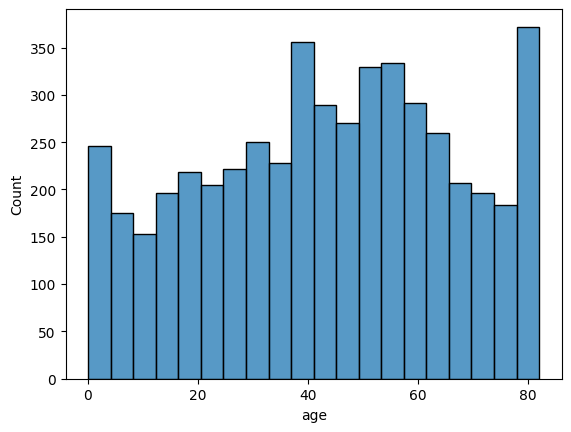

In [29]:
sns.histplot(data=df, x="age")

<Axes: xlabel='work_type', ylabel='Count'>

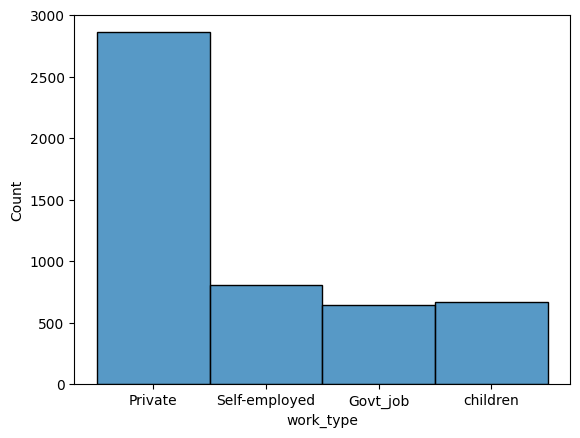

In [30]:
sns.histplot(data=df,x="work_type")

Histogram of the work type Private of 2800, self employed of 700, government of 600 and children of 650..all data is predicted

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

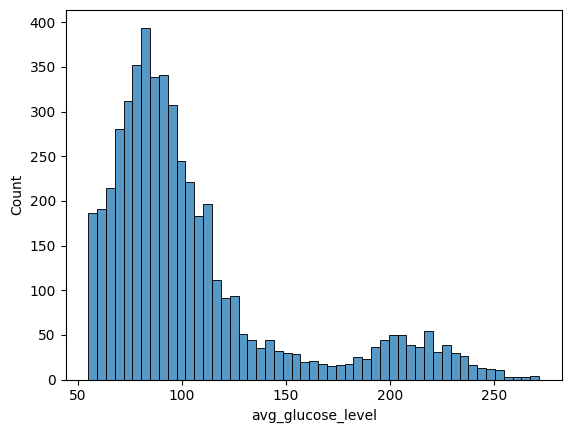

In [31]:
sns.histplot(data=df,x="avg_glucose_level")

histogram of the count vs avg_glucose_level

In [32]:
sns.set_style("white")

In [33]:
plt.figure(figsize=(8,6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

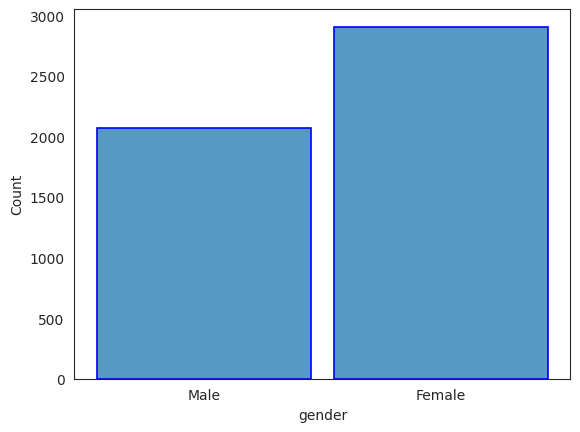

In [34]:
ax=sns.histplot(data=df,x="gender",
              shrink=0.9,
               linewidth=1.2,
             edgecolor="blue" )

sns.histplot=plots the histogram graph using seaborn
data=df takes he data frame
shrink is used to seperate the two bar of histogram
lenewidth is used to give the width of the boder line
edgecolor-gives the color of the edge line

From this we can find femlae is more then male

In [35]:
for patch in ax.patches:
    height=patch.get_height()
    ax.text (patch.get_x() + patch.get_width() /2,
          height+1,
          int(height),
          ha='center',
          va='bottom',
          fontsize=12,
          fontweight="bold"
          )

for patch in ax.patches  is used to iterate all the data in the bar
height=patch.get_height() gives the height of the bar
ax.text is used to write a text
patch.get_x() is gives the text in x axis and patch.get_width() of the text
height+1 gives the text in above the bar
font size 12
with bold text

Text(0, 0.5, 'Number')

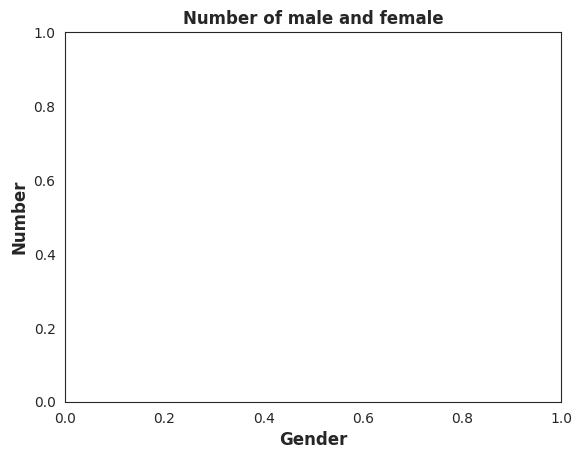

In [36]:
plt.title("Number of male and female", fontsize=12,fontweight="bold")
plt.xlabel("Gender",fontsize=12,fontweight="bold")
plt.ylabel("Number",fontsize=12,fontweight="bold")

plt calls the matplotlib.pyplot
plt.title is used to give the title of the graph
with fontsize and fontweight
plt.xlable gives the information in x axis
plt.ylabel give the informmation in y axis

In [37]:
ax.tick_params(axis="y", left=False, labelleft=False)
sns.despine(left=True)


<Figure size 640x480 with 0 Axes>

axis="y"----applies changes to the y-axis.

left=False .....removes the y-axis ticks ....those small lines on the side.

labelleft=False..... removes the y-axis labels.

In [38]:
sns.despine(left=True)


<Figure size 640x480 with 0 Axes>

sns.despine(left=True) remove the y axia line

In [39]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

Ultimate result of the code is shown belwo:

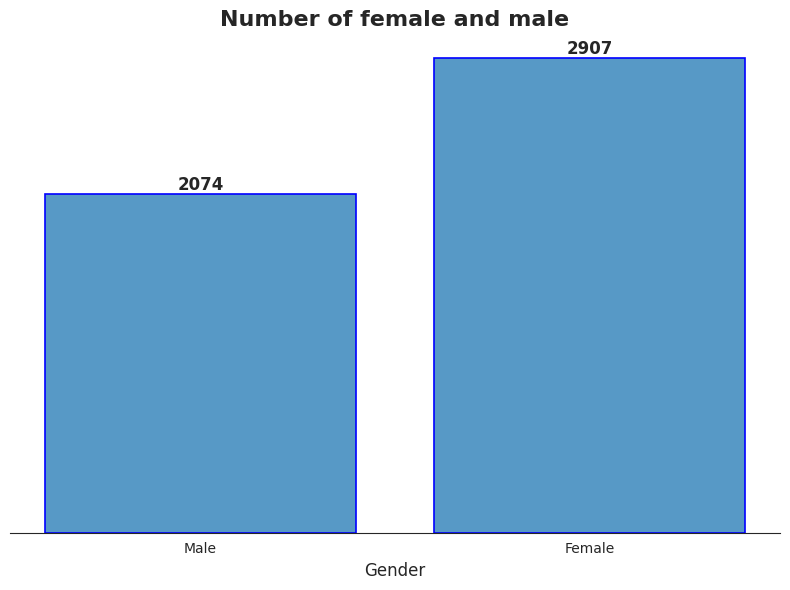

In [40]:
# Clean style with no grid
sns.set_style("white")

# Set figure size
plt.figure(figsize=(8, 6))

# Create the histogram
ax = sns.histplot(data=df, x="gender",
                  shrink=0.8,
                  edgecolor='blue',
                  linewidth=1.2)

# Add count labels on top of each bar
for patch in ax.patches:
    height = patch.get_height()
    ax.text(patch.get_x() + patch.get_width() / 2,
            height + 1,  # slightly above the bar
            int(height),
            ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add title and axis labels
plt.title("Number of female and male", fontsize=16, fontweight='bold')
plt.xlabel("Gender", fontsize=12)
plt.ylabel("")  # Remove y-axis label

# Remove y-axis ticks and lines
ax.tick_params(axis='y', left=False, labelleft=False)
sns.despine(left=True)  # Remove left spine

# Show the plot
plt.tight_layout()
plt.show()

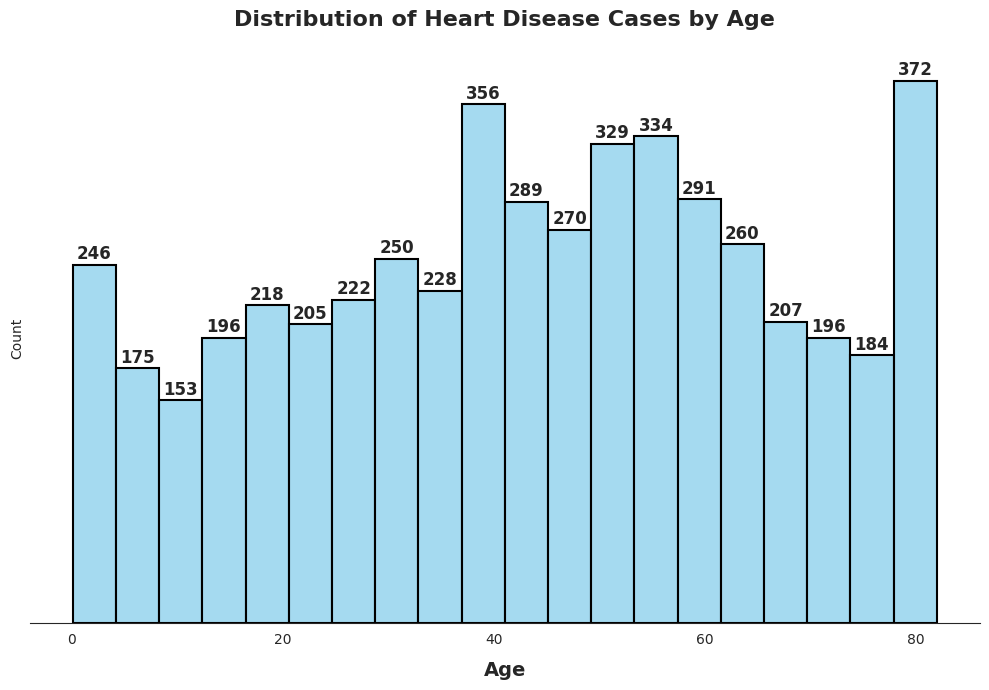

In [45]:

# Set the style for the plot to have no background
sns.set_style("white")

# Create the figure with a custom size
plt.figure(figsize=(10, 7))

# Create the histogram
ax=sns.histplot(
    data=df,
    x='age',
    #shrink=0.9,
    kde=False,
    color='skyblue',
    edgecolor='black',
    linewidth=1.5
)

# Add x-axis label and title with styling
plt.xlabel('Age', fontsize=14, fontweight='bold', labelpad=10)
plt.title('Distribution of Heart Disease Cases by Age', fontsize=16, fontweight='bold', pad=20)

# Hide the y-axis
ax.tick_params(axis="y", left=False, labelleft=False)
sns.despine(left=True)

# Add value labels on top of each bar
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        ax.text(
            patch.get_x() + patch.get_width() / 2,
            height + 1,
            int(height),
            ha='center',
            va='bottom',
            fontsize=12,
            fontweight='bold'
        )

# Adjust layout and show the plot
plt.tight_layout()
plt.show()



*   Adding kadge is true it shows the line(trend line) above the bars
*   For patch in patches is used to iterate all the histogram bars in the graph
*   ax.tick_params(axis="y", left=False, labelleft=False)
sns.despine(left=True) this code remmove the all lines in y-axis
*   if we use shrink=0.9 then the graph  become more visible




gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


<Figure size 1200x800 with 0 Axes>

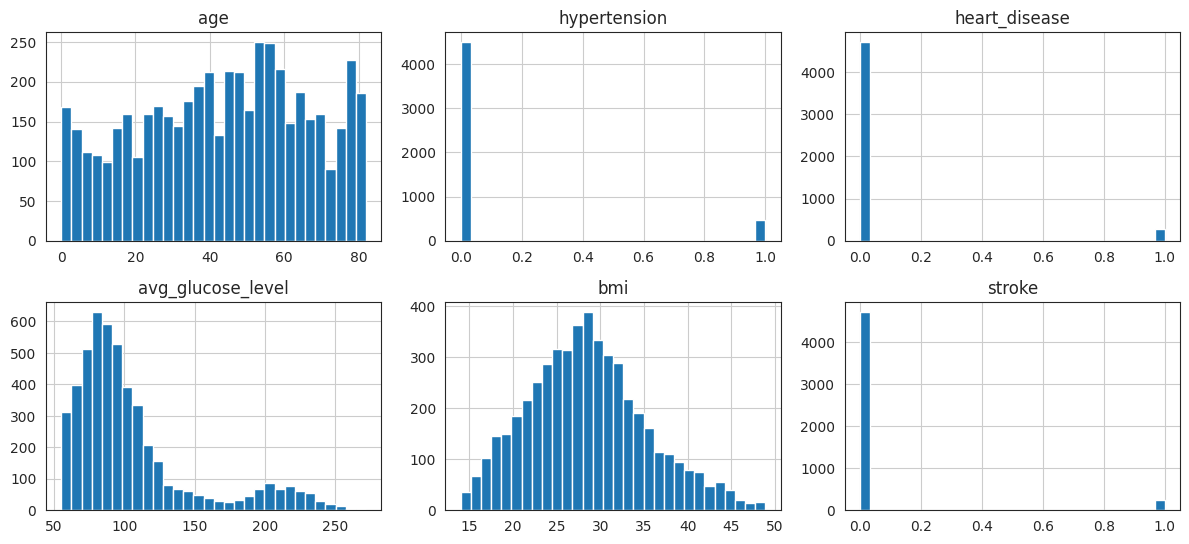

ValueError: could not convert string to float: 'Male'

<Figure size 1000x800 with 0 Axes>

In [49]:

print(df.isnull().sum())

# Plotting the distribution of numerical features
plt.figure(figsize=(12, 8))
df.hist(bins=30, figsize=(12, 8), layout=(3, 3))
plt.tight_layout()
plt.show()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



*  df.isnull().sum() — shows how many missing values exist per column.
*   df.hist() — plots histograms of all numeric columns.
*    Added edgecolor='black' for better visual clarity on histograms.
*   sns.heatmap(df.corr(...)) — shows the strength of linear relationships between numeric columns.
*  Used numeric_only=True in df.corr() here --we are sing some data as string so it doesnot shows correlaon ....error is shown
*  




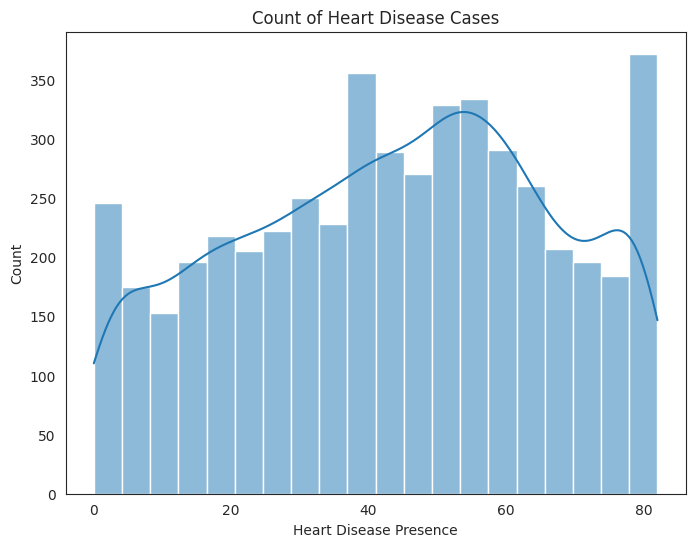

In [51]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='age', kde = True)
plt.xlabel('Heart Disease Presence')
plt.ylabel('Count')
plt.title('Count of Heart Disease Cases')
plt.show()


*   plt.figure(figuresize=8,6)---plots the 8*6 figure
*   plt.xlabel('Heart Disease Presence')---label the x-axis with the heart disease presence


*  plt.ylabel('Count')---give the y-axis as count
*   plt.title('Count of Heart Disease Cases')--give the title of the graph

*   sns.histplot(data=df, x='age', kde = True)---calls the seaborn which plots the histogram and kde=true shows the trend line







In [52]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

Gives all the index of column in data set

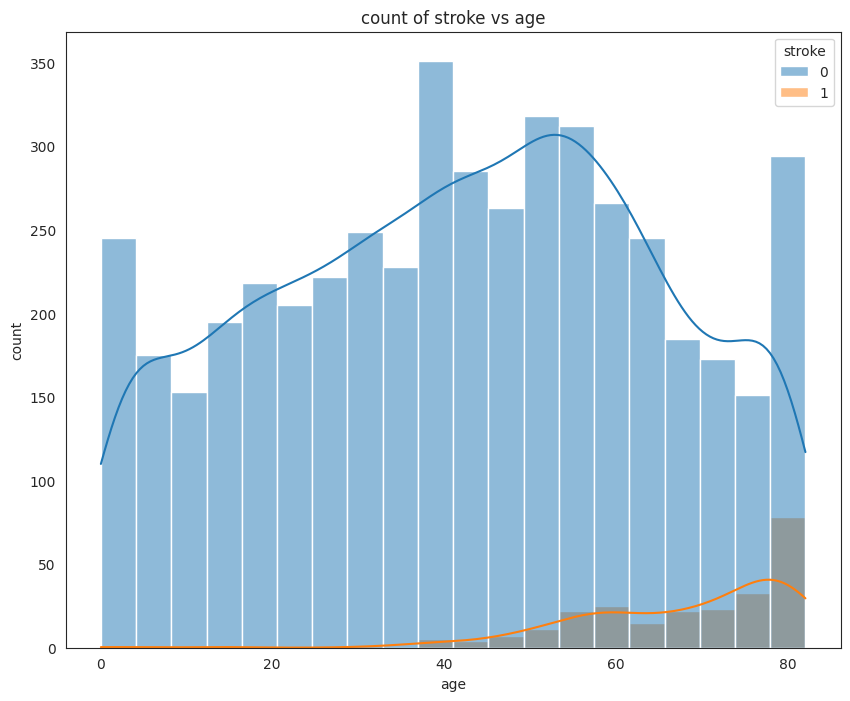

In [64]:
plt.figure(figsize=(10,8))
sns.histplot(data=df,x="age",hue="stroke",kde=True)
plt.xlabel("age")
plt.ylabel("count")
plt.title("count of stroke vs age")
plt.show()



1.  plt.figure(figsize=(10,8))----gives the 10*8 of the figure
2.   we label x-axia as age by plt.xlabel
3. y axis as count---by plt.ylabel
4.   hue="Stroke" relates it with stroke
5. kde=true shows the trend line

This is only for test

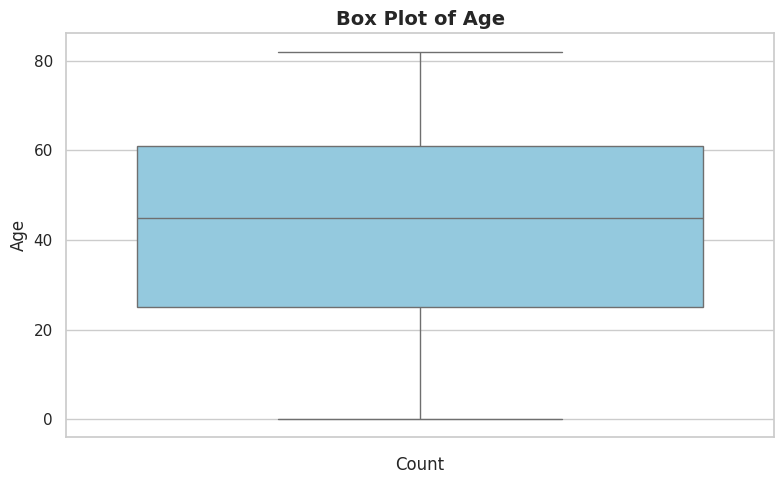

In [85]:
""" Plot Box Plot for Age"""
sns.set(style="whitegrid")

# Create the boxplot for age
plt.figure(figsize=(8, 5))
sns.boxplot(data=df,y="age", color='skyblue')

# Add labels and title
plt.ylabel("Age", fontsize=12)
plt.xlabel("Count", fontsize=12)
plt.title("Box Plot of Age", fontsize=14, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

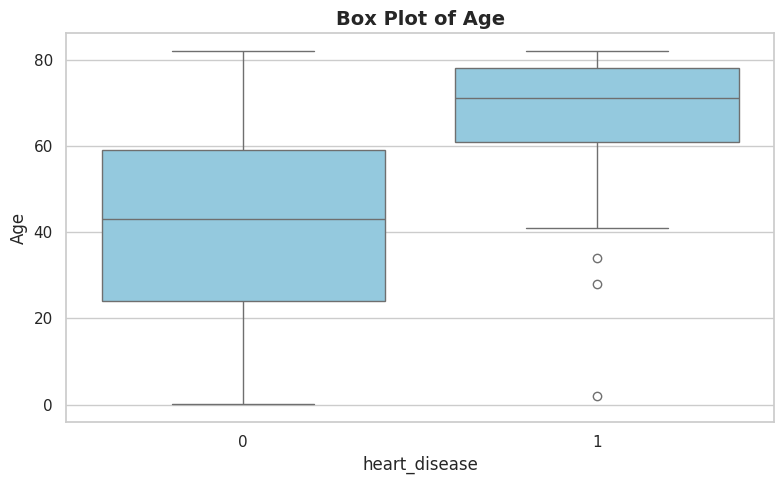

In [82]:
#box plot of hypertension vs age
sns.set(style="whitegrid")

# Create the boxplot for age
plt.figure(figsize=(8, 5))
sns.boxplot(data=df,y="age",x="heart_disease", color='skyblue')

# Add labels and title
plt.ylabel("Age", fontsize=12)
plt.xlabel("heart_disease", fontsize=12)
plt.title("Box Plot of Age", fontsize=14, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

In [74]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [86]:
f_table = df['gender'].value_counts().reset_index()
f_table.columns =['gender', 'count']
print(f_table)

   gender  count
0  Female   2907
1    Male   2074


helps to count the number of  male and female

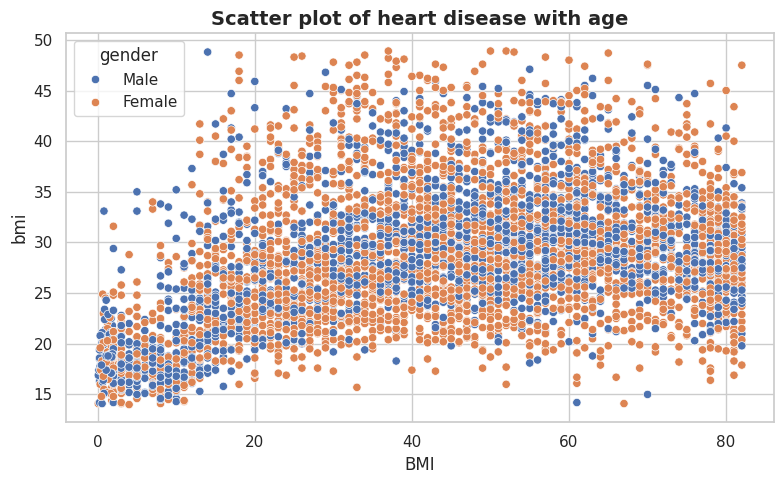

In [90]:
""" Plot SCATTER PLOT for heart_disease and add hue """
sns.set(style="whitegrid")

# Create the boxplot for age
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df,y="bmi",x="age", hue="gender")

# Add labels and title
plt.xlabel("Age", fontsize=12)
plt.xlabel("BMI", fontsize=12)
plt.title("Scatter plot of heart disease with age", fontsize=14, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

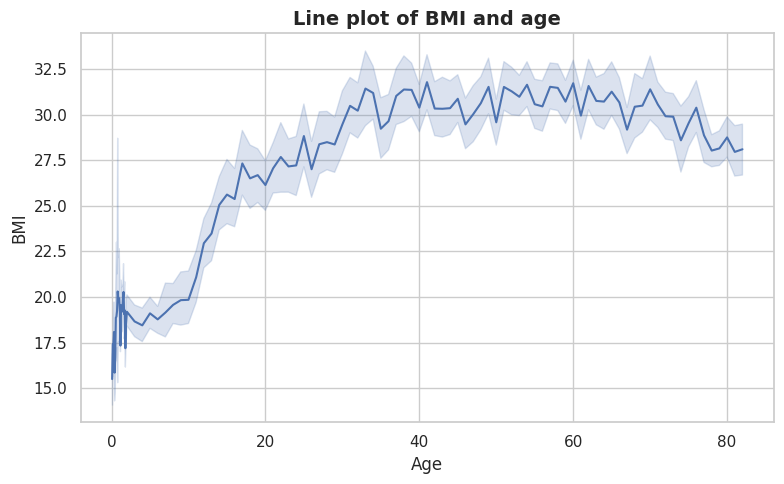

In [127]:
""" Line plot of BMI and age"""
sns.set(style="whitegrid")

# Create the boxplot for age
plt.figure(figsize=(8, 5))
sns.lineplot(data=df,x="age", y="bmi" )

# Add labels and title
plt.xlabel("Age", fontsize=12)
plt.ylabel("BMI", fontsize=12)
plt.title("Line plot of BMI and age", fontsize=14, fontweight='bold')

# Show the plot
plt.tight_layout()

plt.show()

code to save the image is
plt.savefig("bmi_vs_age_plot.png", dpi=300, bbox_inches='tight')  example is ahown below


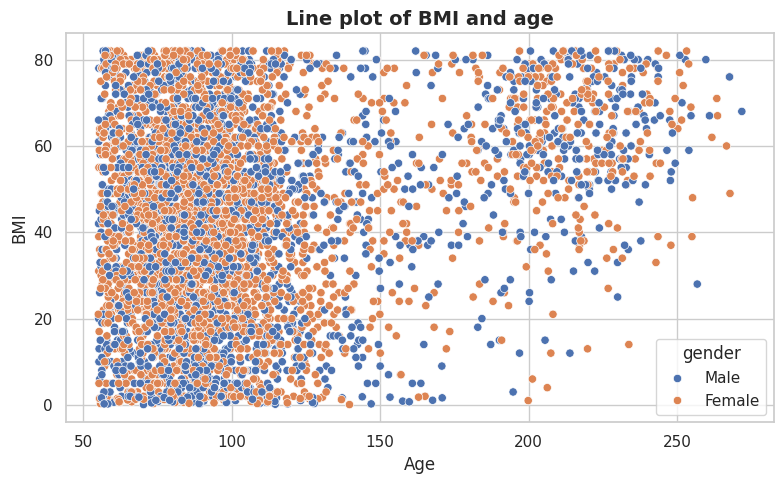

In [130]:
""" Scatter plot"""
sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="avg_glucose_level", y="age",hue="gender")

# Add labels and title
plt.ylabel("Age", fontsize=12)
plt.xlabel("avg_glucose_level", fontsize=12)
plt.title("Scatter plot", fontsize=14, fontweight='bold')

#save the image
plt.savefig("bmi_vs_age_plot.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.tight_layout()

plt.show()

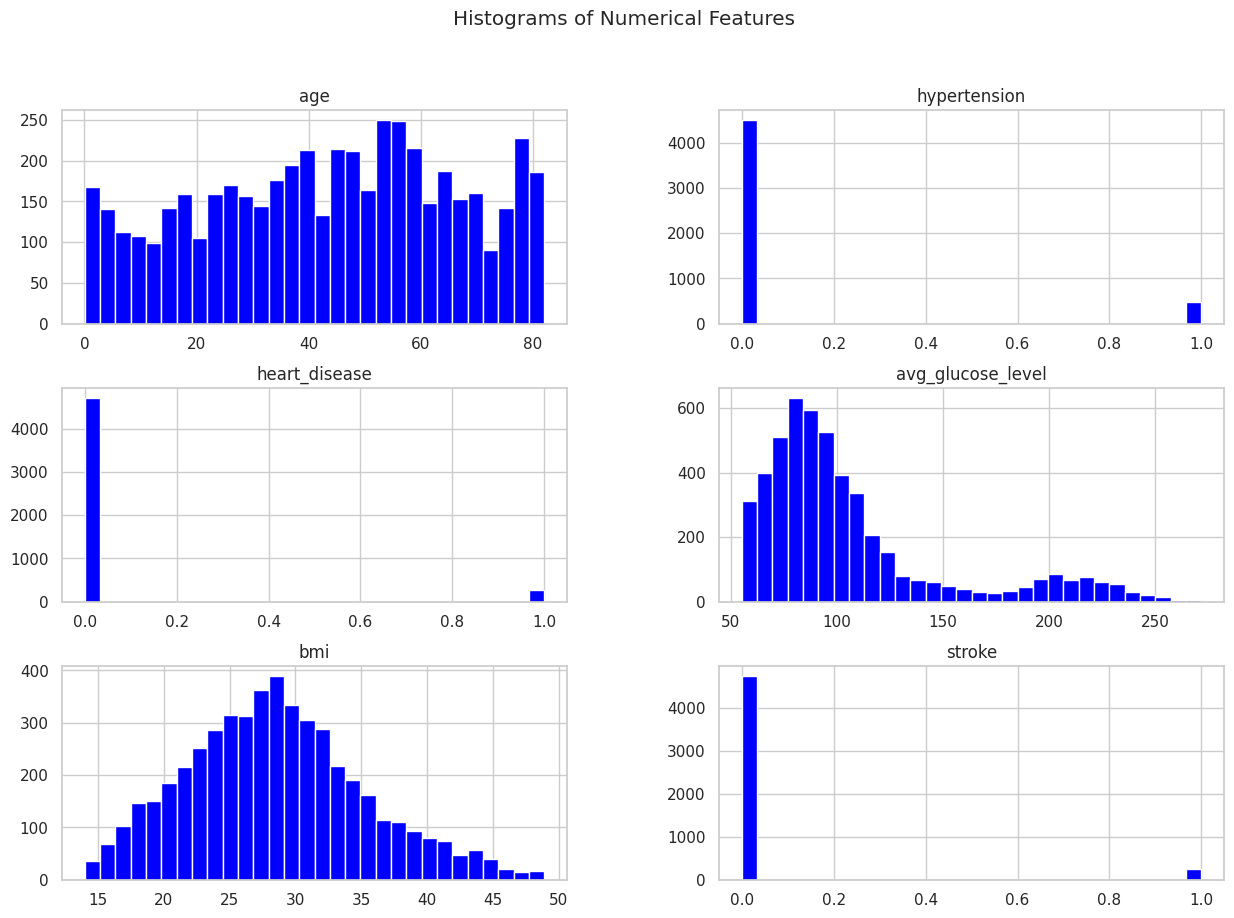

In [131]:
df.hist(bins=30, figsize=(15, 10), color='blue')
plt.suptitle('Histograms of Numerical Features')
plt.show()

the code as shows the histogram plot of different data seta....
BMI was found to some what symmetrical.

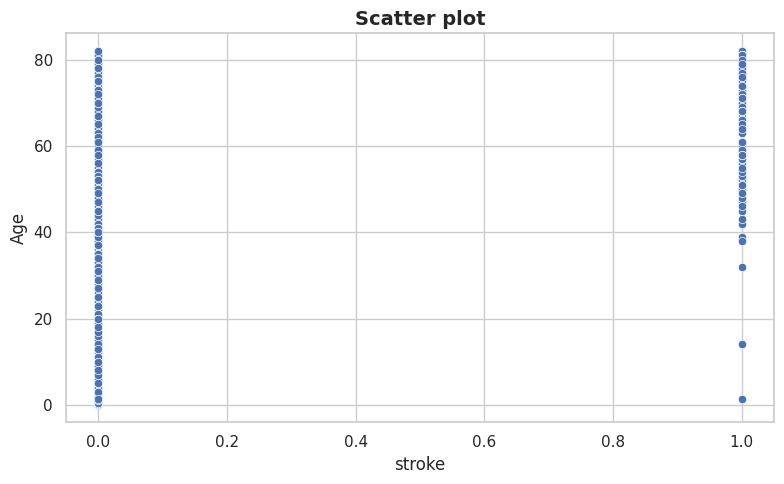

In [135]:
# Draw Scatterplot of stroke and age

sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="stroke", y="age")

# Add labels and title
plt.ylabel("Age", fontsize=12)
plt.xlabel("stroke", fontsize=12)
plt.title("Scatter plot", fontsize=14, fontweight='bold')



# Show the plot
plt.tight_layout()

plt.show()


no significant analysis canbe done


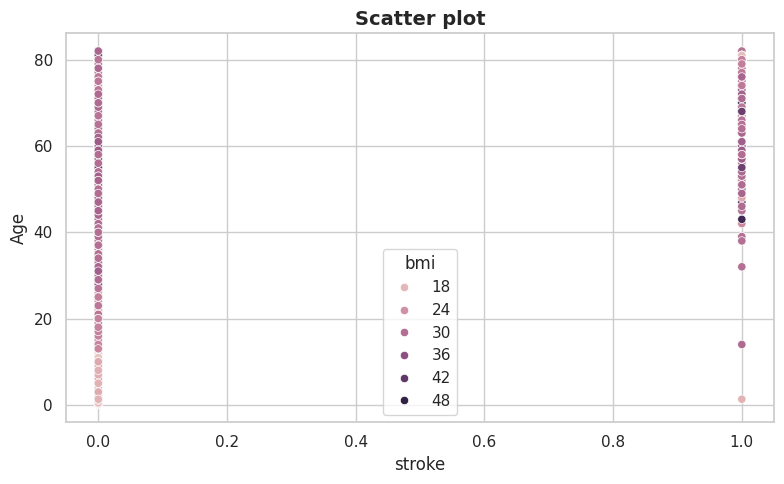

In [139]:
# Draw Scatterplot of stroke and age and hue


sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="stroke", y="age", hue="bmi")

# Add labels and title
plt.ylabel("Age", fontsize=12)
plt.xlabel("stroke", fontsize=12)
plt.title("Scatter plot", fontsize=14, fontweight='bold')



# Show the plot
plt.tight_layout()

plt.show()

hue BMI was taken...but still difficlut to analysis

In [138]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

box plot

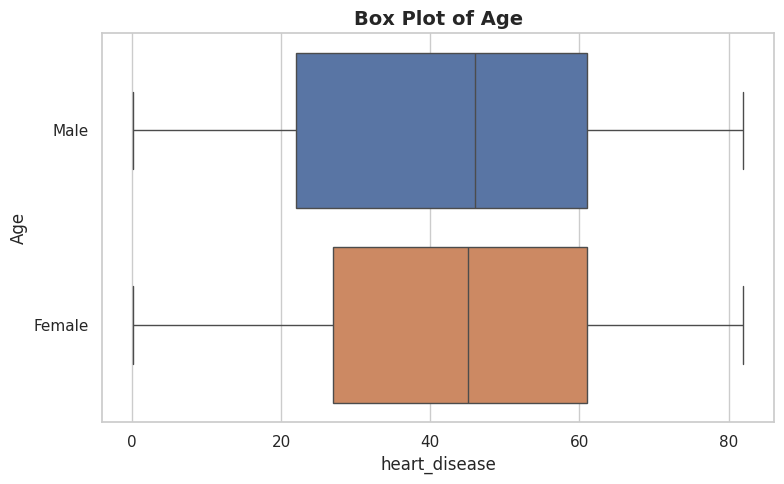

In [141]:
sns.set(style="whitegrid")

# Create the boxplot for age
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="age", y="gender",hue="gender")

# Add labels and title
plt.ylabel("Age", fontsize=12)
plt.xlabel("heart_disease", fontsize=12)
plt.title("Box Plot of Age", fontsize=14, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

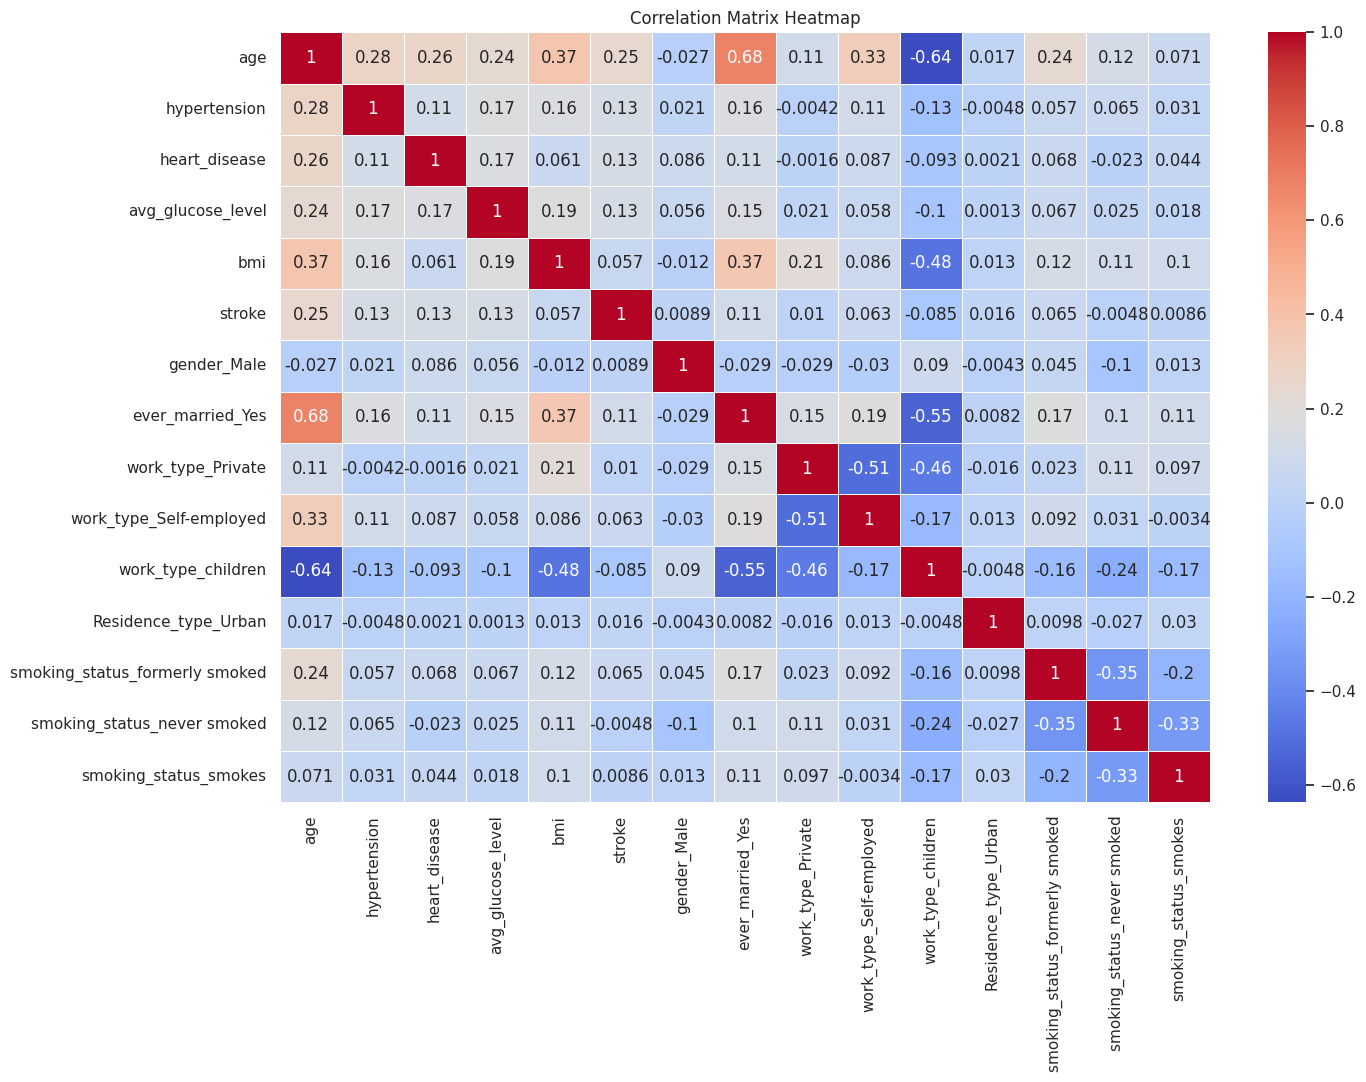

In [142]:
# # One-Hot Encoding for Correlation Matrix
data_encoded = pd.get_dummies(df, drop_first=True)
correlation_matrix = data_encoded.corr()

# Heatmap of correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Task: Create a Correlation Heatmap
Instructions:

Import the required libraries: seaborn and matplotlib.pyplot.

Use .corr() on your DataFrame to generate the correlation matrix.

Create a figure using plt.figure() and set a suitable size (e.g., figsize=(10, 8)).

Use sns.heatmap() to plot the correlation matrix.

Set annot=True to show the correlation values.

Choose a colormap using the cmap parameter (e.g., 'coolwarm', 'YlGnBu').

Add a title using plt.title().

Display the plot using plt.show().

Optional:

Try different colormaps.

Focus on identifying which features are most positively or negatively correlated with the target variable.




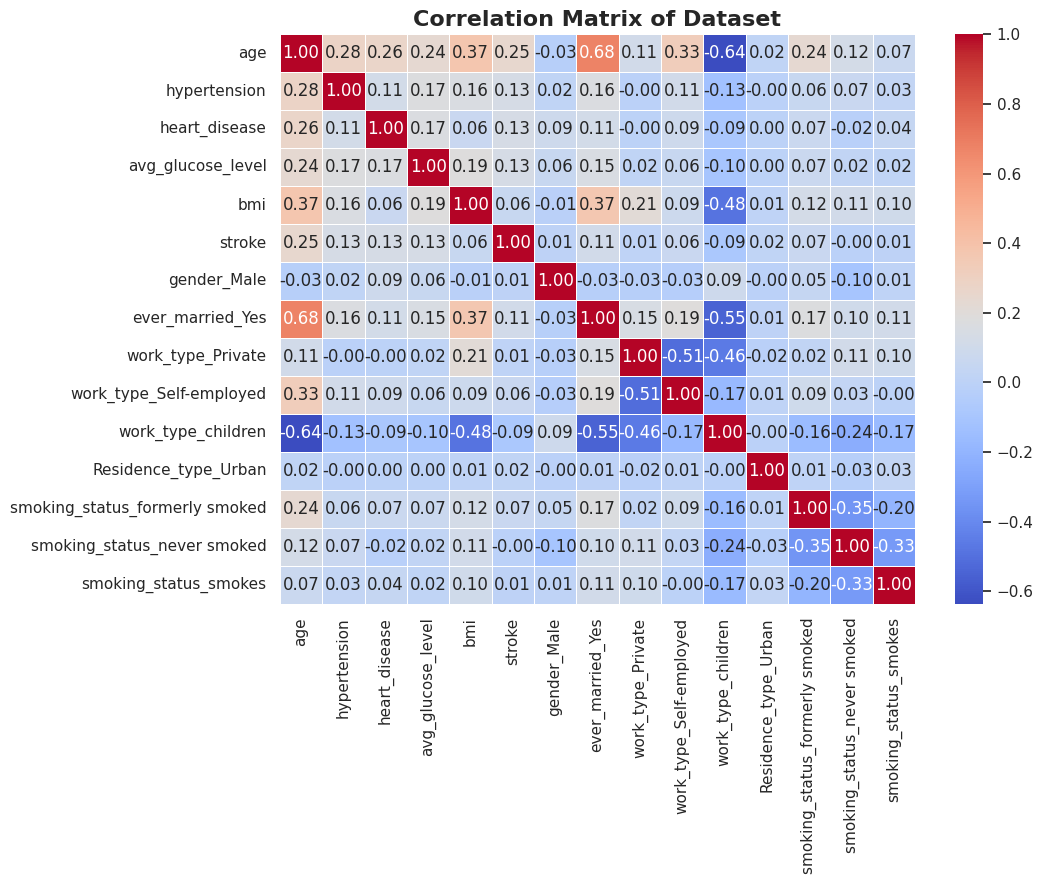

In [148]:
# Calculate correlation matrix
correlation_matrix = data_encoded.corr()

# Create the figure
plt.figure(figsize=(11, 9))

# Plot the heatmap
sns.heatmap(correlation_matrix,
            annot=True,        # show correlation coefficients
            cmap='coolwarm',   # color map (you can try 'YlGnBu', 'viridis', etc.)
            fmt='.2f',         # format for numbers
            linewidths=0.5)    # lines between boxes

# Add title
plt.title('Correlation Matrix of Dataset', fontsize=16, fontweight='bold')

# Improve layout and display the plot
plt.tight_layout()
plt.show()

Nature of the Data
The dataset consists of X rows and Y columns (fill based on actual shape).

Numerical features include: age, avg_glucose_level, bmi, etc.

Categorical features include: gender, smoking_status, work_type, etc.

Steps Taken to Prepare Data
Handled missing values by:

Replacing blanks with NaN: df.replace(" ", np.NaN)

Imputing with mean: df.fillna(df.mean()) (Central Tendency Imputation)

Converted categorical columns using:

Label Encoding for gender and ever_married (binary categories).

One-Hot Encoding for work_type, smoking_status (non-ordinal multi-class variables).

Encoding was used to enable numerical correlation analysis and machine learning.
Correlated Variables
Highly positively correlated pairs:

age and hypertension → Older age is often linked to higher hypertension risk.

age and heart_disease → Expected pattern, especially in cardiovascular datasets.

Strongly negatively correlated:

age and children (if present) → Often inverse due to dataset demographics.

Multicollinearity:

Some predictors (e.g., bmi and avg_glucose_level) show moderate correlation, but not critical.

 Target Variable Insight (e.g., Stroke or Heart Disease)
Most positively correlated features with target (stroke or heart_disease):

age, hypertension, avg_glucose_level

Interpretation:

Increasing age and glucose levels appear to contribute significantly to stroke or heart disease.

Hypertension also increases risk.

Unexpected or Weak Correlations
smoking_status showed weak correlation with target variable.

Might be due to underreporting or categorization issues.

work_type had low influence, possibly due to its diverse, non-ordinal nature.

Age is the most critical variable across both stroke and heart disease prediction.

Hypertension and glucose levels indicate key risk factors worth focusing on for early screening.

Gender shows little correlation with stroke, possibly due to balanced data or confounding factors.

Hypothesis: Better encoding of lifestyle variables (e.g., physical activity, diet) could yield deeper insights if added.

In [151]:
# Create two groups: those with stroke and those without
stroke_yes = df[df['stroke'] == 1]
stroke_no = df[df['stroke'] == 0]

# Perform T-test for Age
t_stat_age, p_value_age = ttest_ind(stroke_yes['age'], stroke_no['age'], nan_policy='omit')

# Perform T-test for BMI
t_stat_bmi, p_value_bmi = ttest_ind(stroke_yes['bmi'], stroke_no['bmi'], nan_policy='omit')

# Perform T-test for Glucose Level
t_stat_glucose, p_value_glucose = ttest_ind(stroke_yes['avg_glucose_level'], stroke_no['avg_glucose_level'], nan_policy='omit')

# Print results
print("T-Test Results:")
print(f"Age       → t-statistic: {t_stat_age:.4f}, p-value: {p_value_age:.4f}")
print(f"BMI       → t-statistic: {t_stat_bmi:.4f}, p-value: {p_value_bmi:.4f}")
print(f"Glucose   → t-statistic: {t_stat_glucose:.4f}, p-value: {p_value_glucose:.4f}")


T-Test Results:
Age       → t-statistic: 17.9456, p-value: 0.0000
BMI       → t-statistic: 4.0233, p-value: 0.0001
Glucose   → t-statistic: 9.4853, p-value: 0.0000
